# CREDIT EDA CASESTUDY

### Importing the libraries


In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [397]:
import warnings
warnings.filterwarnings("ignore")

### Loading the csv files.

In [398]:
app_data = pd.read_csv('application_data.csv')
prev_data = pd.read_csv('previous_application.csv')

### Structure of Datasets

In [399]:
app_data.shape

(307511, 122)

In [400]:
prev_data.shape

(1670214, 37)

In [401]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [402]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [403]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [404]:
prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [405]:
pd.set_option("display.max_columns",122)
pd.set_option("display.max_rows",122)

In [406]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

### Identifying the missing values

Percentage of missing values in each column

In [407]:
(app_data.isnull().mean()*100).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

Columns with more than 50% missing values

In [408]:

missing_values50 = []
for column in list(app_data.columns):
    if (app_data[column].isnull().mean() * 100) > 50:
        missing_values50.append(column)
print(len(missing_values50))       
print(missing_values50)

41
['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


### Handling the missing values:

There are three main types of missing data: 

1.  Missing Completely at Random (MCAR) - if all the variables and observations have the same probability of being missing

2.  Missing at Random (MAR) - the probability of the value being missing is related to the value of the variable or other variables in the dataset.

3.  Missing Not at Random (MNAR) - the probability of being missing is completely different for different values of the same variable, and these reasons can be unknown to us.



Depending on the type of missing values, we proceed to 

1. Drop the missing values.

2. Impute them with appropriate values : 
        
        If it belongs to Type 1, we impute with mean, median or mode.

        If it belongs to Type 2, we impute with values which are function of values they're related to.


### Dropping the columns 

There are 41 columns with more than 50% of missing values. Since that is a high percentage of missing value, it is best that we drop these columns for our analysis.

In [409]:
app_data1 = app_data.drop(missing_values50,axis=1)

In [410]:
app_data1.shape

(307511, 81)

In [411]:
#Checking the remaining columns with missing values
(app_data1.isnull().mean()*100).sort_values(ascending = False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MODE                  49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

Since it is not necessary to remove or impute specific values, we identify some set of columns with missing values and suggest the best course of action.

In [412]:
#There are 5 columns with 13.501631% of missing values. 
missing_values13 = []
for column in list(app_data1.columns):
    if (app_data1[column].isnull().mean() * 100) > 13 and (app_data1[column].isnull().mean() * 100) < 14:
        missing_values13.append(column)
print(missing_values13)


['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


In [413]:
#Examining columns with 13% missing values
for column in missing_values13:
    print(app_data1[column].value_counts(normalize=True)*100)
    print(app_data1[column].describe())
    print("-------------------------------------")
    

0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64
-------------------------------------
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64
-------------------------------------
0.0    96.790881
1.0     3.085807
2.0     0.074814
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0  

### Type 1 Missing Values - Completely at Random

### Approach for Imputing missing values
The values for these columns are whole numbers such as 0,1,2 etc. Therefore they cannot be imputed with mean. They can be imputed with mode, if maximum occurence of value is extremely high. 

        For example : AMT_REQ_CREDIT_BUREAU_HOUR column has more than 99% of value counts to be 0.0. Therefore Impute with 0.0.

If maximum occurence of value is not so high and then median value can be used for imputing.

        For example : AMT_REQ_CREDIT_BUREAU_YEAR column has 26% values to be 0.0 and 23% values to be 1.0. Median for this column is 1.0. Therefore Impute with 1.0

### Changing the datatypes

In [414]:
app_data1.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64


In [415]:
object_dtypes = []
for column in list(app_data1.columns):
    if app_data1[column].dtype == 'object':
        object_dtypes.append(column)
        #print(column)
print(object_dtypes)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


In [416]:
for column in object_dtypes:
    print(column)
    print(app_data1[column].unique())
    
    print("-----------------")

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']
-----------------
CODE_GENDER


['M' 'F' 'XNA']
-----------------
FLAG_OWN_CAR
['N' 'Y']
-----------------
FLAG_OWN_REALTY
['Y' 'N']
-----------------
NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
-----------------
NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
-----------------
NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
-----------------
NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
-----------------
NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
-----------------
OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Sec

In [417]:
#Following columns have Y, N as values, it would be easier if they're converted to 1, 0 for the ease in analysis.
app_data1['FLAG_OWN_CAR'] = np.where(app_data1['FLAG_OWN_CAR']=='Y', 1 , 0)  
app_data1['FLAG_OWN_REALTY'] = np.where(app_data1['FLAG_OWN_REALTY']=='Y', 1 , 0)

In [418]:
app_data1['FLAG_OWN_CAR'].value_counts()

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64

In [419]:
#By examining the values of these columns, we find out that all columns except 'FLAG_OWN_CAR','FLAG_OWN_REALTY' and 'EMERGENCYSTATE_MODE' are categorical type.
Categorical_columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']
for column in Categorical_columns:
    app_data1[column] = app_data1[column].astype('category')
    

In [420]:
app_data1.dtypes

SK_ID_CURR                         int64
TARGET                             int64
NAME_CONTRACT_TYPE              category
CODE_GENDER                     category
FLAG_OWN_CAR                       int32
FLAG_OWN_REALTY                    int32
CNT_CHILDREN                       int64
AMT_INCOME_TOTAL                 float64
AMT_CREDIT                       float64
AMT_ANNUITY                      float64
AMT_GOODS_PRICE                  float64
NAME_TYPE_SUITE                 category
NAME_INCOME_TYPE                category
NAME_EDUCATION_TYPE             category
NAME_FAMILY_STATUS              category
NAME_HOUSING_TYPE               category
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                         int64
FLAG_EMP_PHONE                     int64
FLAG_WORK_PHONE                    int64
FLAG_CONT_MOBILE

### Null values in Categorical columns
Sometimes the null values would not be in the standardized form of 'NaN'. We need to ook at it closely to identify and address it.

In [421]:
for column in Categorical_columns:
    print(app_data1[column].value_counts())
    print("-----------------")

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
-----------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-----------------
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
-----------------
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
-----------------
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
-----------------
Ma

In [422]:
# 'CODE GENDER' has XNA values denoting the null values. Imputing them with the mode value which is F
app_data1.loc[app_data1.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F' 
app_data1.CODE_GENDER.value_counts()

F      202452
M      105059
XNA         0
Name: CODE_GENDER, dtype: int64

In [423]:
#In the column, ORGANIZATION_TYPE there are 55374 XNA values. ORGANIZATION_TYPE values are dependent on OCCUPATION_TYPE and NAME_INCOME_TYPE, therefore we need to check if missing values are completely at random or random.
app_data1[['ORGANIZATION_TYPE','NAME_INCOME_TYPE']].head(30)

ORGANIZATION_TYPE      NAME_INCOME_TYPE
0   Business Entity Type 3               Working
1                   School         State servant
2               Government               Working
3   Business Entity Type 3               Working
4                 Religion               Working
5                    Other         State servant
6   Business Entity Type 3  Commercial associate
7                    Other         State servant
8                      XNA             Pensioner
9              Electricity               Working
10                Medicine               Working
11                     XNA             Pensioner
12  Business Entity Type 2               Working
13           Self-employed               Working
14       Transport: type 2               Working
15  Business Entity Type 2               Working
16              Government               Working
17            Construction               Working
18                 Housing               Working
19            Kindergarten         State servant
20           Self-employed               Working
21           Trade: type 7  Commercial associate
22           Self-employed               Working
23                     XNA             Pensioner
24  Business Entity Type 3               Working
25  Business Entity Type 3               Working
26  Business Entity Type 3               Working
27       Industry: type 11               Working
28                Military         State servant
29  Business Entity Type 3               Working

### Type 2 missing values - At Random

In [424]:
# We can clearly observe that XNA values are present when 'NAME_INCOME_TYPE' is Pensioner.
app_data1[app_data1['NAME_INCOME_TYPE']=='Pensioner']['ORGANIZATION_TYPE']

8         XNA
11        XNA
23        XNA
38        XNA
43        XNA
         ... 
307469    XNA
307483    XNA
307487    XNA
307505    XNA
307507    XNA
Name: ORGANIZATION_TYPE, Length: 55362, dtype: category
Categories (58, object): ['Advertising', 'Agriculture', 'Bank', 'Business Entity Type 1', ..., 'Transport: type 3', 'Transport: type 4', 'University', 'XNA']

In [425]:
app_data1['ORGANIZATION_TYPE'] = app_data1['ORGANIZATION_TYPE'].replace('XNA', 'Pensioner')

In [426]:
app_data1['OCCUPATION_TYPE'].isnull().sum()

96391

In [427]:
app_data1['ORGANIZATION_TYPE'].value_counts(normalize=True)

Business Entity Type 3    0.221104
Pensioner                 0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [428]:
app_data1.describe()

SK_ID_CURR         TARGET   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  307511.000000  307511.000000  307511.000000    307511.000000   
mean   278180.518577       0.080729       0.340108         0.693673   
std    102790.175348       0.272419       0.473746         0.460968   
min    100002.000000       0.000000       0.000000         0.000000   
25%    189145.500000       0.000000       0.000000         0.000000   
50%    278202.000000       0.000000       0.000000         1.000000   
75%    367142.500000       0.000000       1.000000         1.000000   
max    456255.000000       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.072330e+05               307511.000000  307511.000000   
mean      5.383962e+05                    0.020868  -16036.995067   
std       3.694465e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290  -25229.000000   
25%       2.385000e+05                    0.010006  -19682.000000   
50%       4.500000e+05                    0.018850  -15750.000000   
75%       6.795000e+05                    0.028663  -12413.000000   
max       4.050000e+06                    0.072508   -7489.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  307511.000000      307511.000000    307511.000000  307511.000000   
mean    63815.045904       -4986.120328     -2994.202373       0.999997   
std    141275.766519        3522.886321      1509.450419       0.001803   
min    -17912.000000      -24672.000000     -7197.000000       0.000000   
25%     -2760.000000       -7479.500000     -4299.000000       1.000000   
50%     -1213.000000       -4504.000000     -3254.000000       1.000000   
75%      -289.000000       -2010.000000     -1720.000000       1.000000   
max    365243.000000           0.000000         0.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   

In [429]:
#The following columns have negative values instead of positive
Negative_columns = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'] 

In [430]:
for column in Negative_columns:
    app_data1[column] = abs(app_data1[column])

In [431]:
app_data1.describe()

SK_ID_CURR         TARGET   FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count  307511.000000  307511.000000  307511.000000    307511.000000   
mean   278180.518577       0.080729       0.340108         0.693673   
std    102790.175348       0.272419       0.473746         0.460968   
min    100002.000000       0.000000       0.000000         0.000000   
25%    189145.500000       0.000000       0.000000         0.000000   
50%    278202.000000       0.000000       0.000000         1.000000   
75%    367142.500000       0.000000       1.000000         1.000000   
max    456255.000000       1.000000       1.000000         1.000000   

        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.072330e+05               307511.000000  307511.000000   
mean      5.383962e+05                    0.020868   16036.995067   
std       3.694465e+05                    0.013831    4363.988632   
min       4.050000e+04                    0.000290    7489.000000   
25%       2.385000e+05                    0.010006   12413.000000   
50%       4.500000e+05                    0.018850   15750.000000   
75%       6.795000e+05                    0.028663   19682.000000   
max       4.050000e+06                    0.072508   25229.000000   

       DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH     FLAG_MOBIL  \
count  307511.000000      307511.000000    307511.000000  307511.000000   
mean    67724.742149        4986.120328      2994.202373       0.999997   
std    139443.751806        3522.886321      1509.450419       0.001803   
min         0.000000           0.000000         0.000000       0.000000   
25%       933.000000        2010.000000      1720.000000       1.000000   
50%      2219.000000        4504.000000      3254.000000       1.000000   
75%      5707.000000        7479.500000      4299.000000       1.000000   
max    365243.000000       24672.000000      7197.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   

### Identifying the outliers
1. We identify and segregate the columns where outliers has to be identified. Numerical columns excluding IDs and flags will be our Dataset to identify the outlier.

2. IQR and Boxplots will be used to identify outliers.

In [432]:
Numerical_columns = []
for column in list(app_data1.columns):
    if column not in Categorical_columns:
        Numerical_columns.append(column)

len(Numerical_columns)

70

In [433]:
# From this, we can identify which columns should be analysed to find out the outlier values.
for column in Numerical_columns:
    print(column, len(app_data1[column].unique()) )
    print("----------")

SK_ID_CURR 307511
----------
TARGET 2
----------
FLAG_OWN_CAR 2
----------
FLAG_OWN_REALTY 2
----------
CNT_CHILDREN 15
----------
AMT_INCOME_TOTAL 2548
----------
AMT_CREDIT 5603
----------


AMT_ANNUITY 13673
----------
AMT_GOODS_PRICE 1003
----------
REGION_POPULATION_RELATIVE 81
----------
DAYS_BIRTH 17460
----------
DAYS_EMPLOYED 12574
----------
DAYS_REGISTRATION 15688
----------
DAYS_ID_PUBLISH 6168
----------
FLAG_MOBIL 2
----------
FLAG_EMP_PHONE 2
----------
FLAG_WORK_PHONE 2
----------
FLAG_CONT_MOBILE 2
----------
FLAG_PHONE 2
----------
FLAG_EMAIL 2
----------
CNT_FAM_MEMBERS 18
----------
REGION_RATING_CLIENT 3
----------
REGION_RATING_CLIENT_W_CITY 3
----------
HOUR_APPR_PROCESS_START 24
----------
REG_REGION_NOT_LIVE_REGION 2
----------
REG_REGION_NOT_WORK_REGION 2
----------
LIVE_REGION_NOT_WORK_REGION 2
----------
REG_CITY_NOT_LIVE_CITY 2
----------
REG_CITY_NOT_WORK_CITY 2
----------
LIVE_CITY_NOT_WORK_CITY 2
----------
EXT_SOURCE_2 119832
----------
EXT_SOURCE_3 815
----------
YEARS_BEGINEXPLUATATION_AVG 286
----------
FLOORSMAX_AVG 404
----------
YEARS_BEGINEXPLUATATION_MODE 222
----------
FLOORSMAX_MODE 26
----------
YEARS_BEGINEXPLUATATION_MEDI 246
---

In [434]:
#These columns contain numerical values, where outliers can be identified.
Numerical_for_outliers = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3'  ]
app_data2 = app_data1[Numerical_for_outliers]

In [435]:
#Calculating the max and min permissible value in IQR method
Q1 = app_data2.quantile(0.25)
Q3 = app_data2.quantile(0.75)
IQR = Q3 - Q1
max = Q3 + 1.5 * IQR
min = Q1 - 1.5 * IQR

In [436]:
app_data2[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].describe(percentiles=[.05,.25,.5,.75,.8,.85,.9,.95,.99])

CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
5%          0.000000      6.750000e+04  1.350000e+05    9000.000000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
80%         1.000000      2.250000e+05  9.000000e+05   37516.500000   
85%         1.000000      2.340000e+05  1.024740e+06   40806.000000   
90%         2.000000      2.700000e+05  1.133748e+06   45954.000000   
95%         2.000000      3.375000e+05  1.350000e+06   53325.000000   
99%         3.000000      4.725000e+05  1.854000e+06   70006.500000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  
count     3.072330e+05  
mean      5.383962e+05  
std       3.694465e+05  
min       4.050000e+04  
5%        1.350000e+05  
25%       2.385000e+05  
50%       4.500000e+05  
75%       6.795000e+05  
80%       8.145000e+05  
85%       9.000000e+05  
90%       1.093500e+06  
95%       1.305000e+06  
99%       1.800000e+06  
max       4.050000e+06

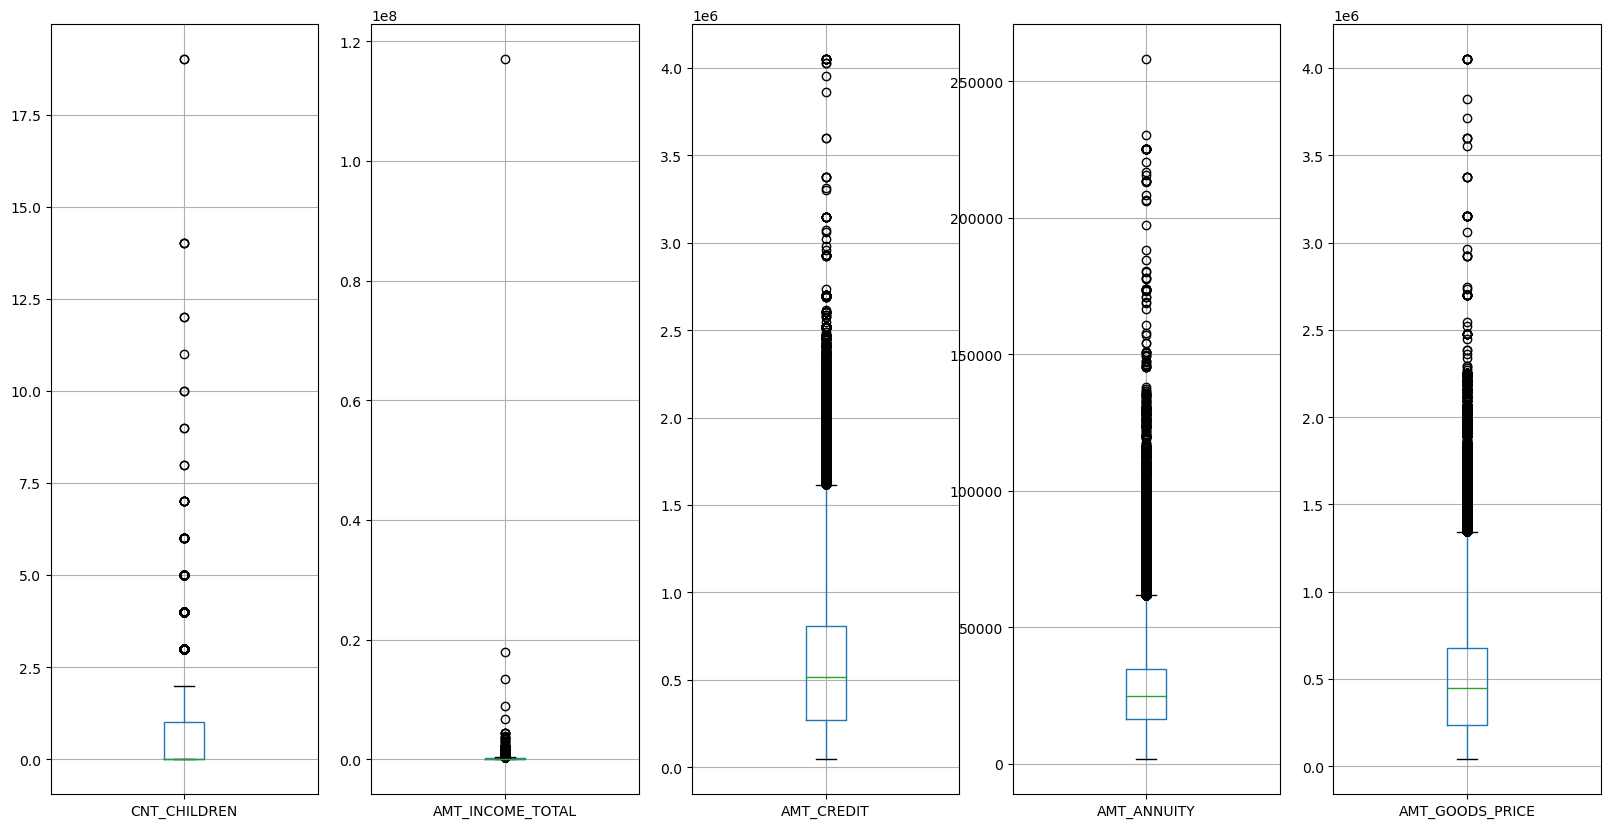

In [437]:
cols = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    app_data1.boxplot(column = col)

### Identifying outliers - Part 1
1. We observe that AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE variables have huge outliers as we can see the spike at 100 percentile. 
2. CNT_CHILDREN has 99% values under 3 according to description. Plots show that values outside 2.5 are outliers. 

In [438]:
app_data1[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(percentiles=[.05,.25,.5,.75,.80,.85,.9,.95,.99])

DAYS_BIRTH  DAYS_EMPLOYED  EXT_SOURCE_2   EXT_SOURCE_3
count  307511.000000  307511.000000  3.068510e+05  246546.000000
mean    16036.995067   67724.742149  5.143927e-01       0.510853
std      4363.988632  139443.751806  1.910602e-01       0.194844
min      7489.000000       0.000000  8.173617e-08       0.000527
5%       9407.000000     229.000000  1.332991e-01       0.154744
25%     12413.000000     933.000000  3.924574e-01       0.370650
50%     15750.000000    2219.000000  5.659614e-01       0.535276
75%     19682.000000    5707.000000  6.636171e-01       0.669057
80%     20474.000000    9188.000000  6.820641e-01       0.694093
85%     21316.000000  365243.000000  7.007278e-01       0.719491
90%     22181.000000  365243.000000  7.220467e-01       0.749022
95%     23204.000000  365243.000000  7.477341e-01       0.786267
99%     24419.000000  365243.000000  7.827928e-01       0.832785
max     25229.000000  365243.000000  8.549997e-01       0.896010

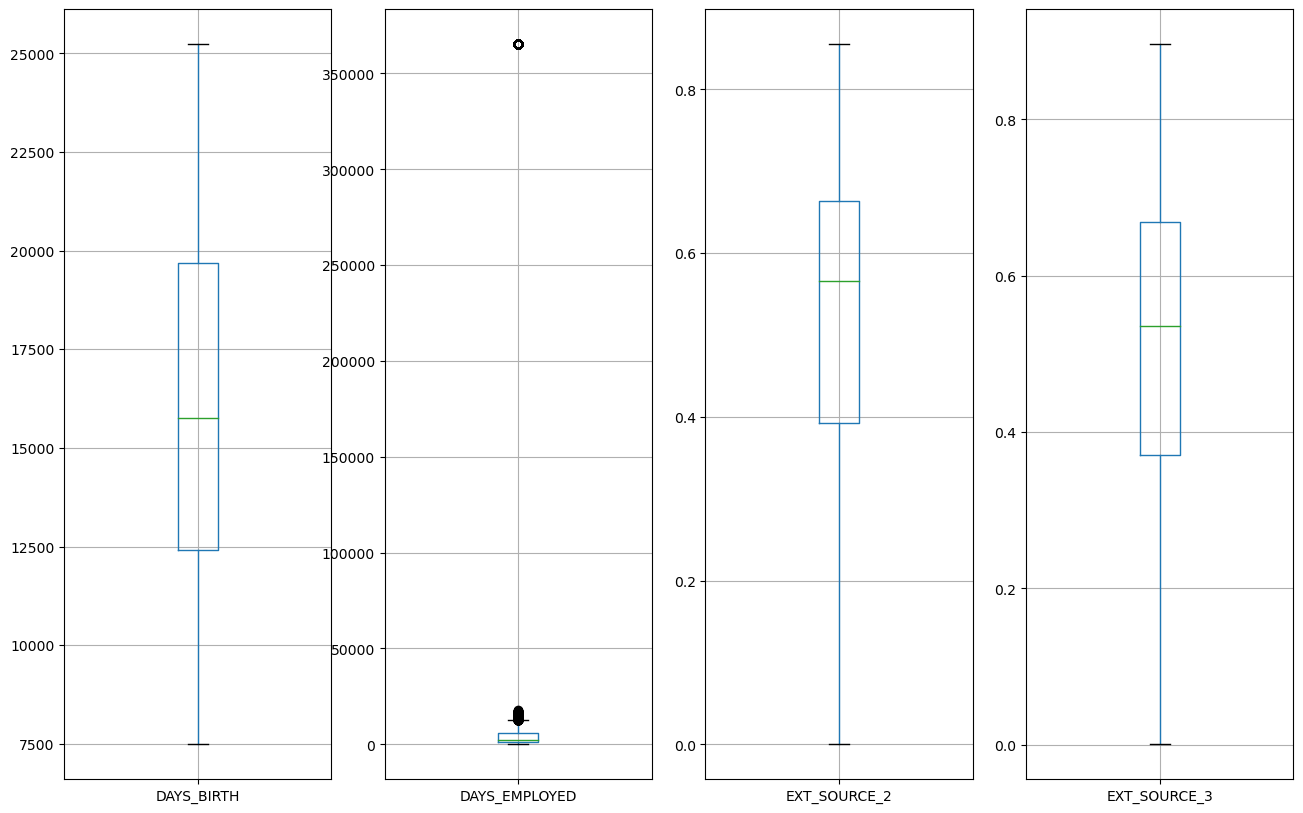

In [439]:
cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    app_data1.boxplot(column = col)


### Identifying Outliers - Part 2

1. There are no outliers present in 'DAYS_BIRTH','EXT_SOURCE_2' and 'EXT_SOURCE_3' columns.
2. IQR for 'DAYS_EMPLOYED' is very slim. 80% of values are below 9188 and number of outliers with value of 365243.

## Handling outliers 

### Method 1 - Using IQR
    Calculating the max and min permissible value in IQR method

    Q1 = app_data1[col].quantile(0.25)

    Q3 = app_data1[col].quantile(0.75)

    IQR = Q3 - Q1

    max = Q3 + 1.5 * IQR

    min = Q1 - 1.5 * IQR

**Using this, we can impute the values of outliers in columns AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE with max value which is Q3 + 1.5 * IQR.**

```python
Code for imputing the values:
cols = [AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE]
for col in cols:
    if app_data1[col] > max:
        app_data1.loc[app_data1[col] > max, col ] = max
```


**For columns such as DAYS_EMPLOYED ,  we have to address the specific value of outlier which is skewing the data by dropping those values and considering them to be null.**

```python
app_data1.loc[app_data1[DAYS_EMPLOYED] == 365243, DAYS_EMPLOYED ] = np.NaN
```







In [440]:
app_data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

Suggestions

1. Binning several columns for clear analysis

2. Dropping irrelevnat columns :

    Example: There are 5 different columns AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR' which have similar type of values but over different periods. It is recommended that we drop 4 among these except AMT_REQ_CREDIT_BUREAU_QRT.

## Binning - AMT_INCOME_TOTAL , DAYS_BIRTH, AMT_CREDIT


In [441]:
print(app_data1['AMT_INCOME_TOTAL'].describe())
q25 = app_data1['AMT_INCOME_TOTAL'].quantile(0.25)
q60 = app_data1['AMT_INCOME_TOTAL'].quantile(0.60)

q25,q60

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


(112500.0, 162000.0)

In [442]:
app_data1['AMT_INCOME_TYPE'] = pd.qcut(app_data1.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data1['AMT_INCOME_TYPE'].value_counts()

MEDIUM       106633
LOW           90089
VERY_LOW      63671
HIGH          33083
VERY_HIGH     14035
Name: AMT_INCOME_TYPE, dtype: int64

In [443]:
app_data1['AMT_CREDIT_TYPE'] = pd.qcut(app_data1.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_data1['AMT_CREDIT_TYPE'].value_counts()

MEDIUM       94750
LOW          88924
VERY_LOW     64925
HIGH         44878
VERY_HIGH    14034
Name: AMT_CREDIT_TYPE, dtype: int64

In [444]:
app_data1['DAYS_BIRTH']= (app_data1['DAYS_BIRTH']/365).astype(int)    
app_data1['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [445]:
app_data1['AGE_GROUP']=pd.cut(app_data1['DAYS_BIRTH'],                 
                         bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen']) 
app_data1['AGE_GROUP'].value_counts()

Middle_Age        185900
Young              75925
Senior_Citizen     29368
Very_Young         16318
Name: AGE_GROUP, dtype: int64

# Univariate Analysis

In [446]:

T0 = app_data1.loc[app_data1["TARGET"]==0] 
T1 = app_data1.loc[app_data1["TARGET"]==1]
T0_percentage = round(len(T0)*100/app_data1.shape[0],2)
T1_percentage = round(len(T1)*100/app_data1.shape[0],2)
print("Percentage of Target values equal to 1:  ",T1_percentage)
print("Percentage of Target values equal to 0:  ",T0_percentage)

Percentage of Target values equal to 1:   8.07
Percentage of Target values equal to 0:   91.93


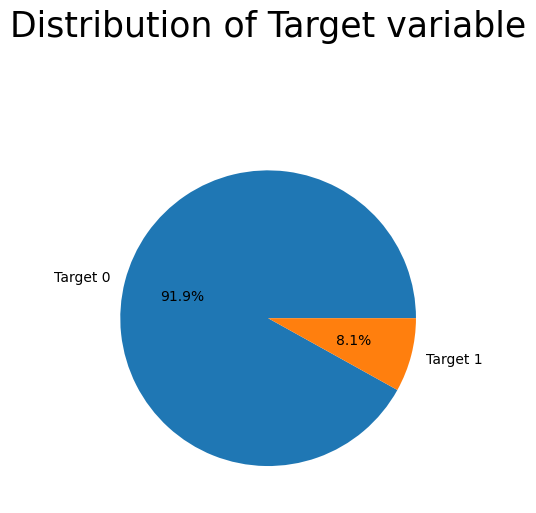

In [447]:
plt.pie([T0_percentage,T1_percentage],labels=["Target 0","Target 1"], autopct='%1.1f%%')
plt.title("Distribution of Target variable",fontsize=25)
plt.show()

## DATA IMBALANCE
 Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations

Dataframe Target variable has highly imbalanced data. We will separately analyse the data based on the target variable for better understanding. 

In [448]:
#creating dataframe with TARGET = 1 
app_target_1 = app_data1.loc[app_data1['TARGET'] == 1]
print('Dimension of the target 1 dataset',app_target_1.shape)


print("------------------------" )
#creating dataframe with TARGET = 0 
app_target_0 = app_data1.loc[app_data1['TARGET'] == 0]
print('Dimension of the target 0 dataset',app_target_0.shape)


Dimension of the target 1 dataset (24825, 84)
------------------------
Dimension of the target 0 dataset (282686, 84)


In [449]:
numerical_col = app_data1.select_dtypes(include='category').columns
numerical_col

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'AMT_INCOME_TYPE',
       'AMT_CREDIT_TYPE', 'AGE_GROUP'],
      dtype='object')

### Analysis of Categorical columns

 **1. Contract type**

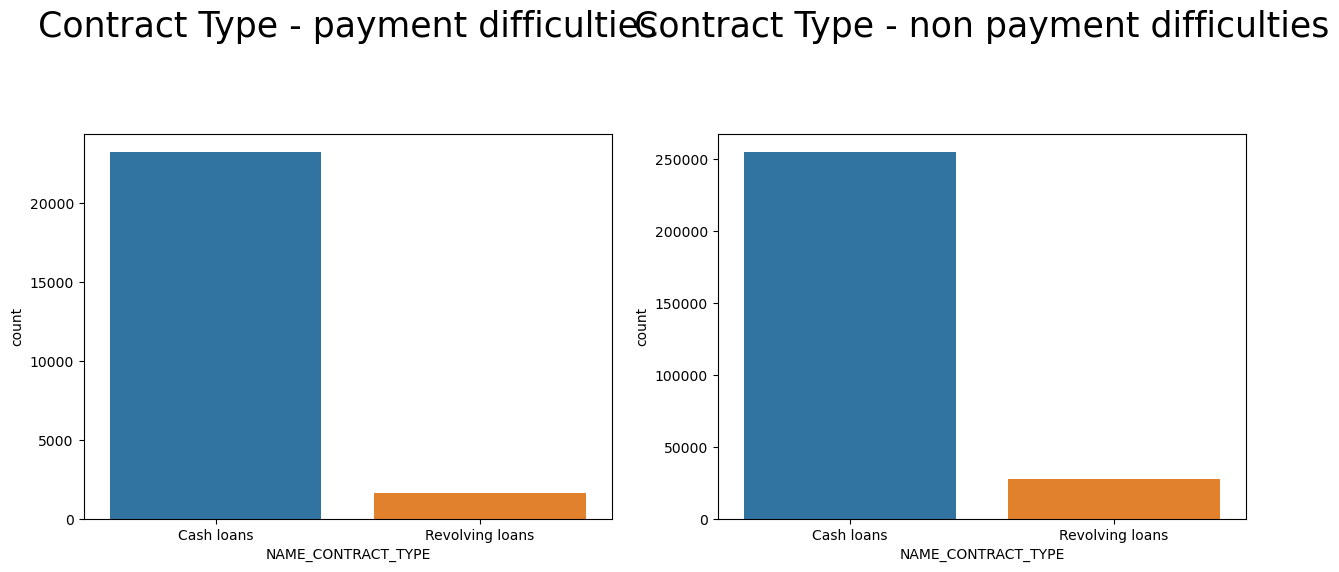

In [450]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_1)
plt.title('Contract Type - payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_CONTRACT_TYPE', data = app_target_0)
plt.title('Contract Type - non payment difficulties')

plt.show()

**Insights**:

Most of the applicants have applied for Cash Loan while very small proportion have applied for Revolving loan for both Defaulters as well as Non-defaulters.

**2. Gender distribution**

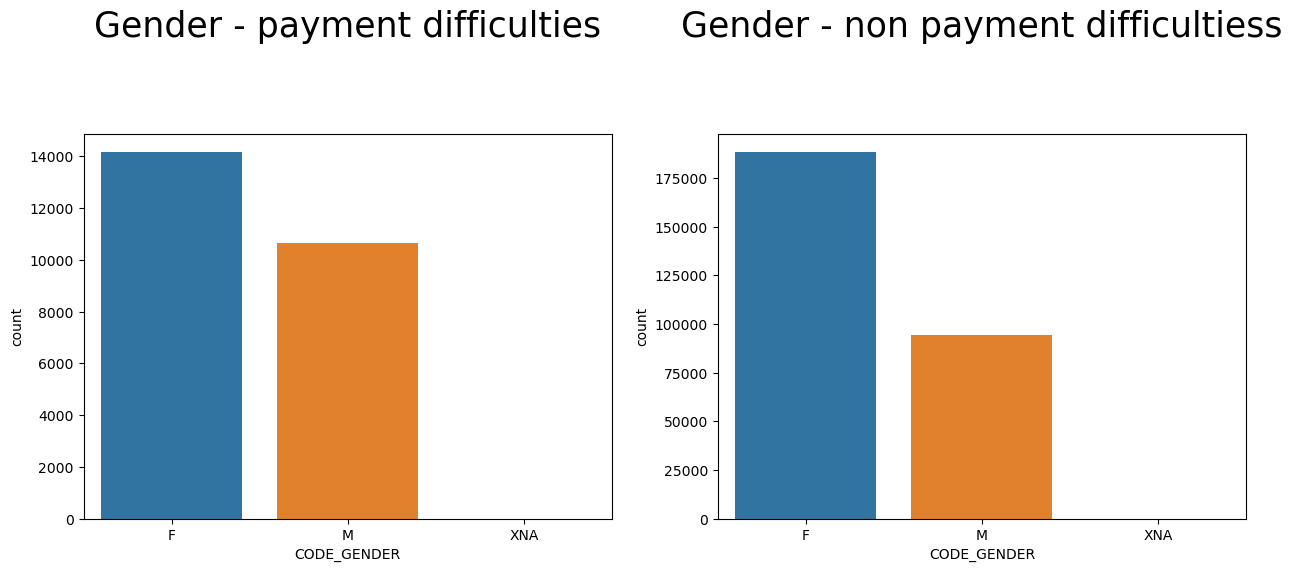

In [451]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data = app_target_1)
plt.title('Gender - payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = app_target_0)
plt.title('Gender - non payment difficultiess')

plt.show()

**Insights**:

It is clearly visible that Female(F) applicants are more in both Targets. But the proportion of Male(M) is higher in first chart – indicating that there are more Male defaulters out of total mail applicants.  



**3. Ownership**

**a. Car**

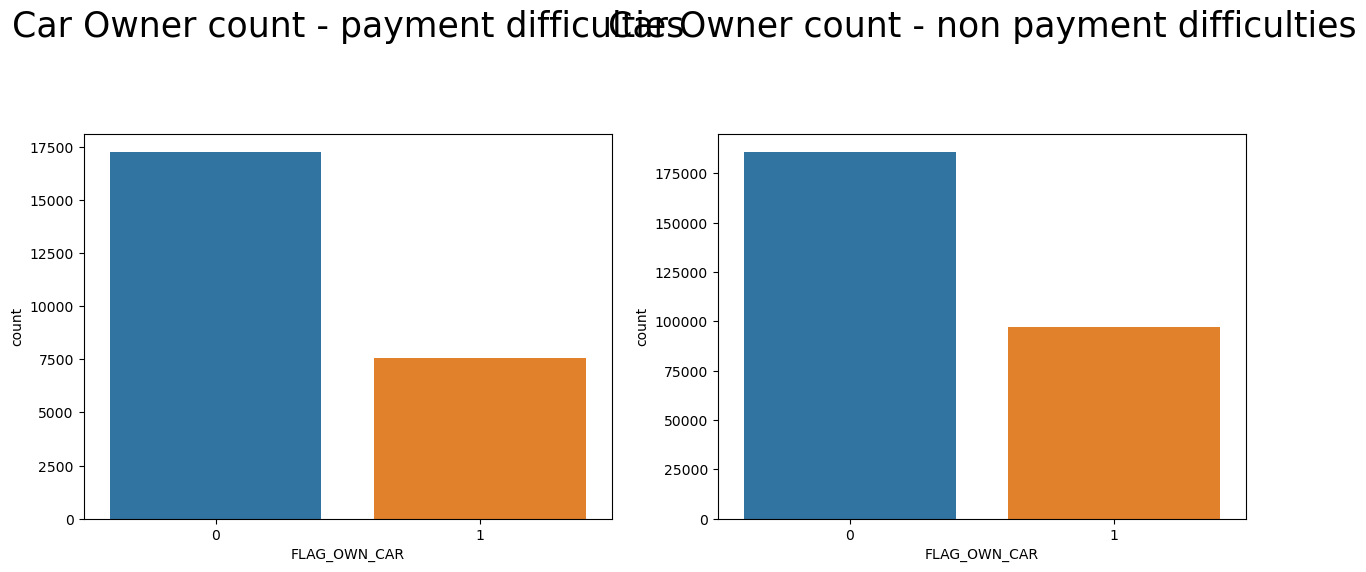

In [452]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_1)
plt.title('Car Owner count - payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_CAR', data = app_target_0)
plt.title('Car Owner count - non payment difficulties')

plt.show()

**b. Realty**

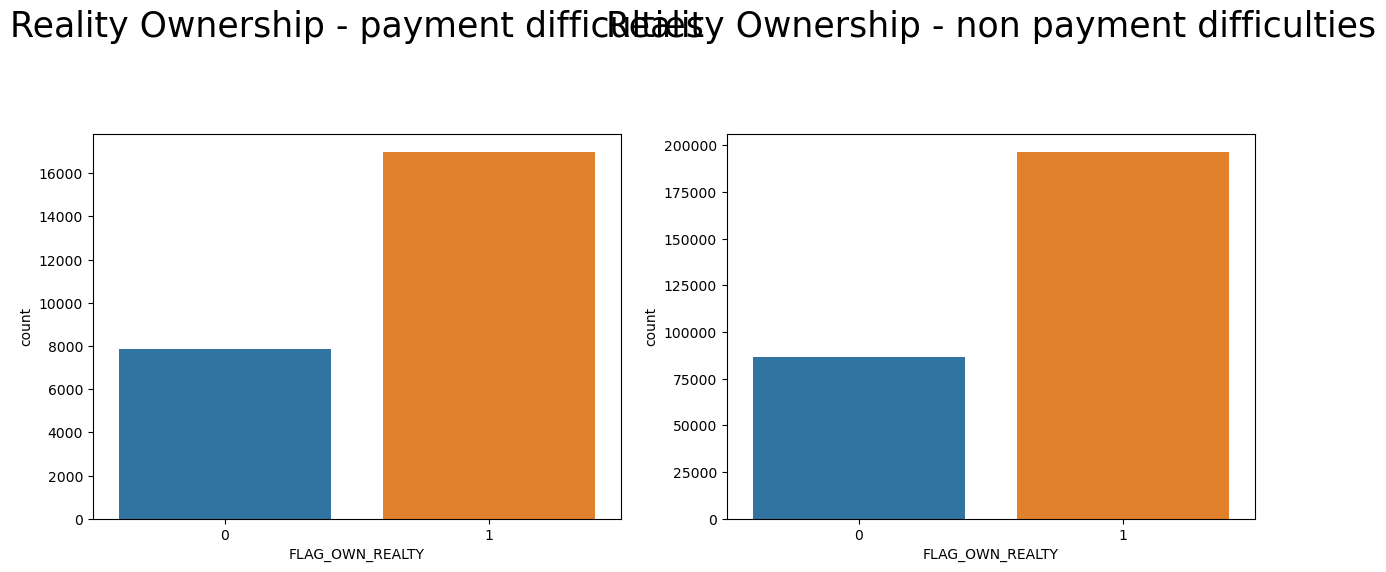

In [453]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_1)
plt.title('Reality Ownership - payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', data = app_target_0)
plt.title('Reality Ownership - non payment difficulties')

plt.show()

**3. Income Type**

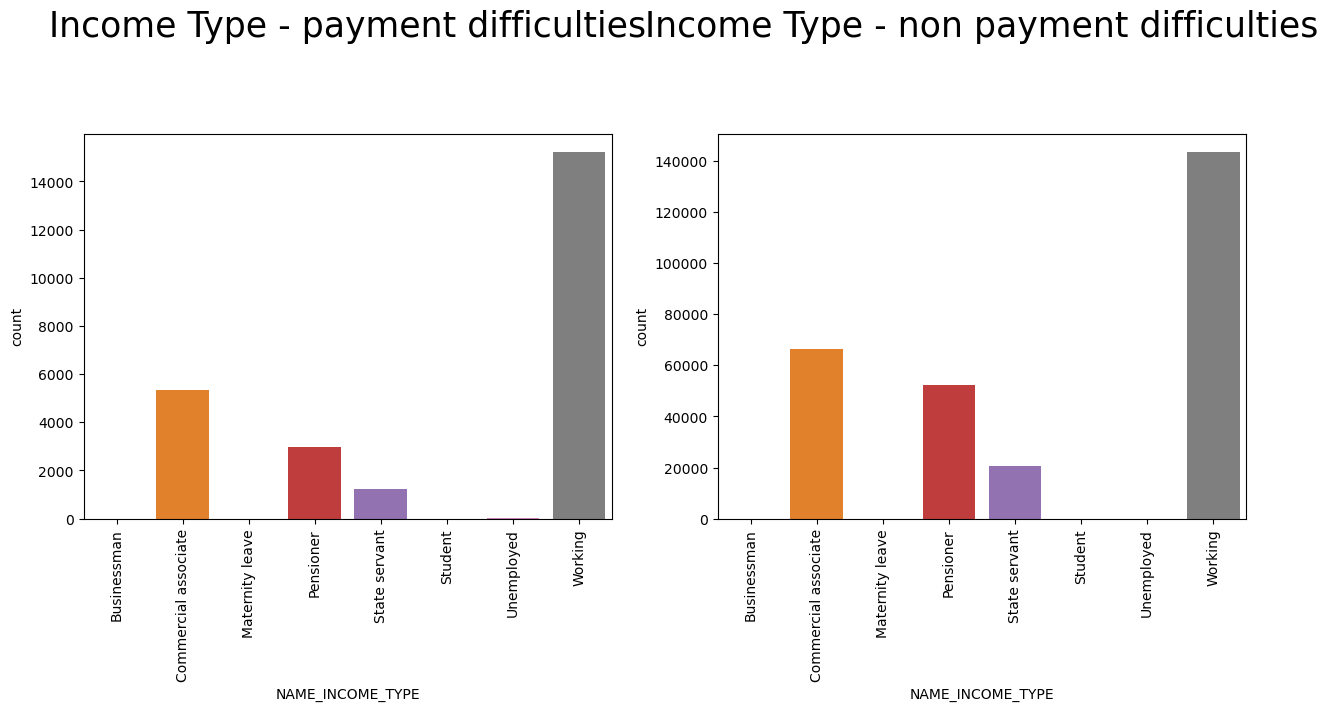

In [454]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_1)
plt.xticks(rotation = 90)
plt.title('Income Type - payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_INCOME_TYPE', data = app_target_0)
plt.xticks(rotation = 90)
plt.title('Income Type - non payment difficulties')

plt.show()

**Insights:**

Businessman, students and Unemployedless likely to apply for loan 

Working category have high risk to default.

State servant has less risk to default


**4. Education Type**

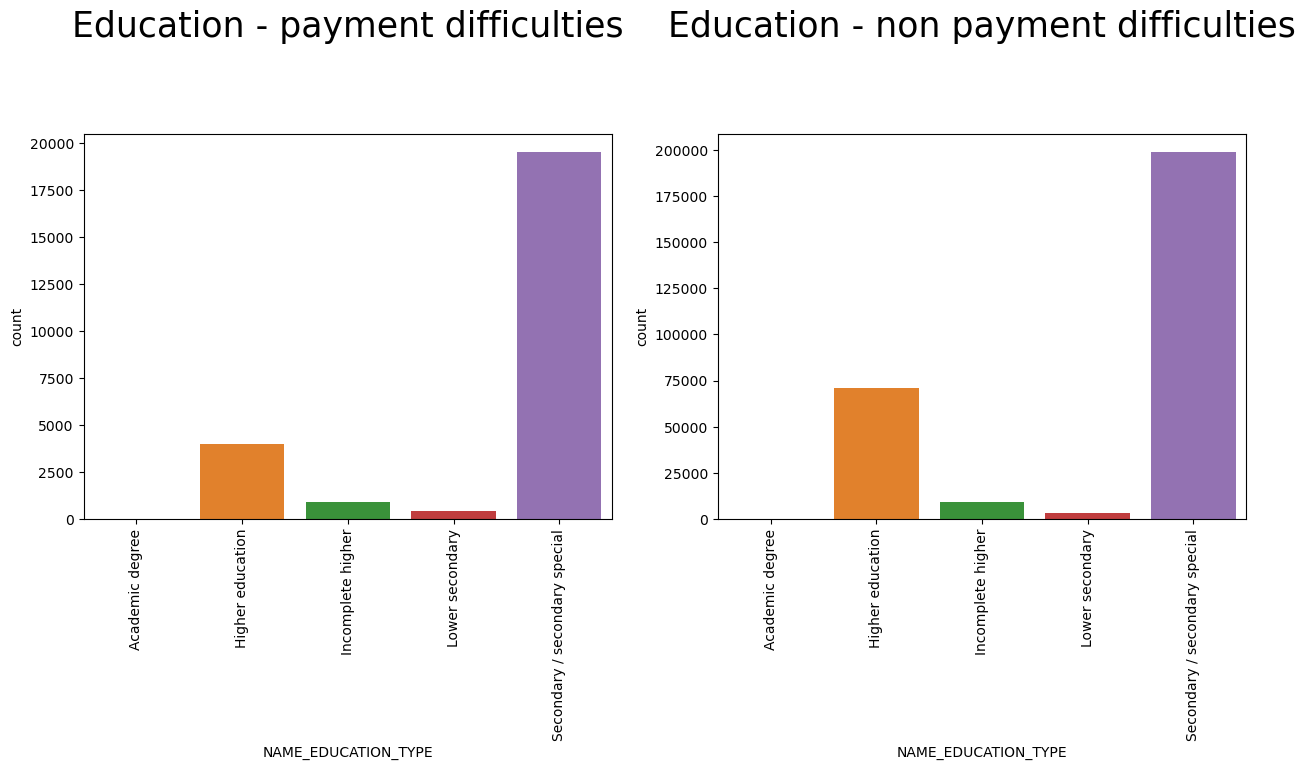

In [455]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_1)
plt.xticks(rotation = 90)
plt.title('Education - payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_EDUCATION_TYPE', data = app_target_0)
plt.xticks(rotation = 90)
plt.title('Education - non payment difficulties')

plt.show()

**Insights:**

Clients having education Secondary or Secondary Special are more likey to apply for the loan.

Higher education segment has higher proportion in Target 0 indicating that they are less likely to default

**5. Family Status**

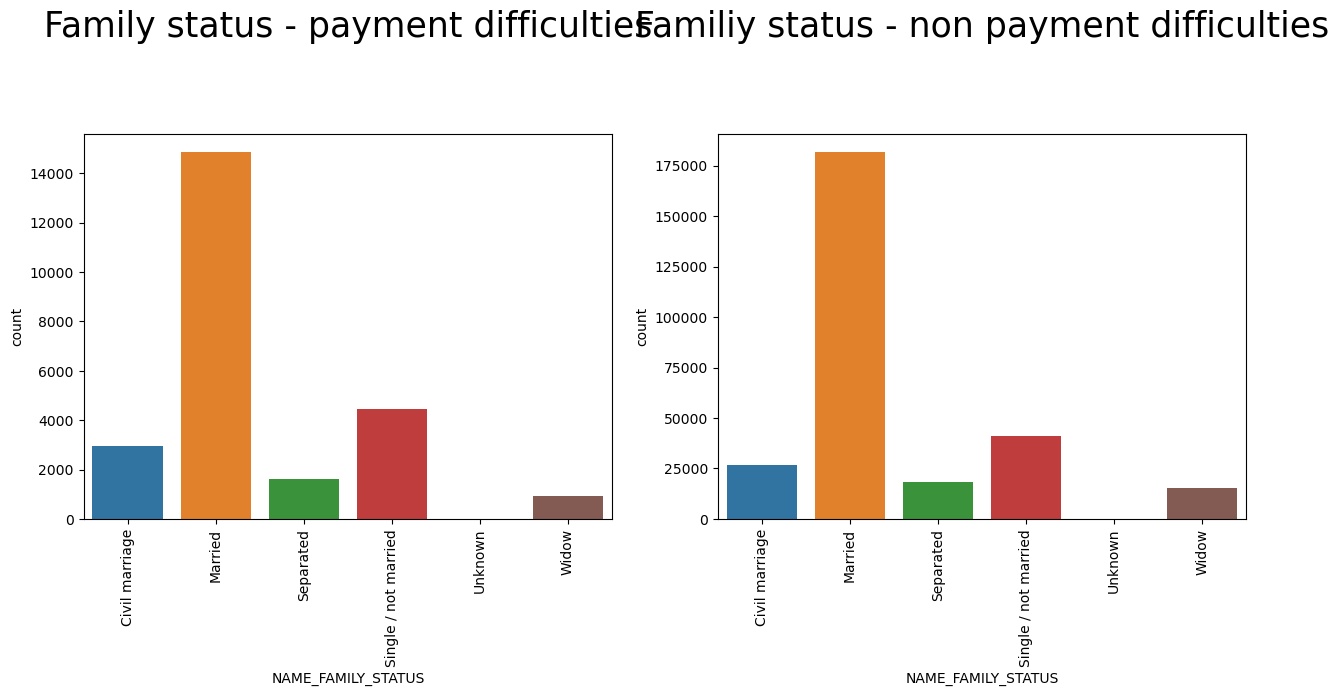

In [456]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_1)
plt.xticks(rotation = 90)
plt.title('Family status - payment difficulties')

plt.subplot(1,2,2)
sns.countplot(x = 'NAME_FAMILY_STATUS', data = app_target_0)
plt.xticks(rotation = 90)
plt.title('Familiy status - non payment difficulties')

plt.show()

**Insights:**

Married Clients seems to be applied most for the loan compared to others for both categories.

Single/ not married category has bigger proportion in Target 1 indicating default. Followed by Civil marriage. Widow are less likely to default. 


**6. Age**

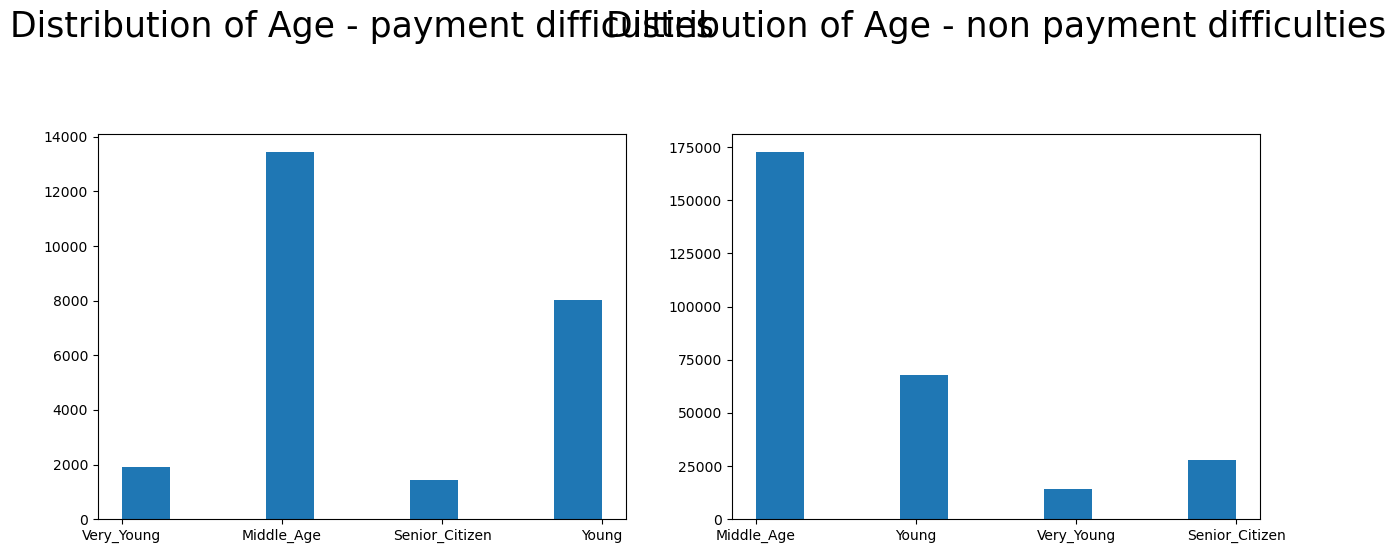

In [457]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(app_target_1['AGE_GROUP'])
plt.title('Distribution of Age - payment difficulties')
plt.subplot(1,2,2)
plt.hist(app_target_0['AGE_GROUP'])
plt.title('Distribution of Age - non payment difficulties')

plt.show()

**Insights:**

Middle Age(35-60) the group seems to applied higher than any other age group for loans in the case of Defaulters as well as Non-defaulters

Senior citizens and Very young are facing less payment dificulties compared to other.

**7. Income group**

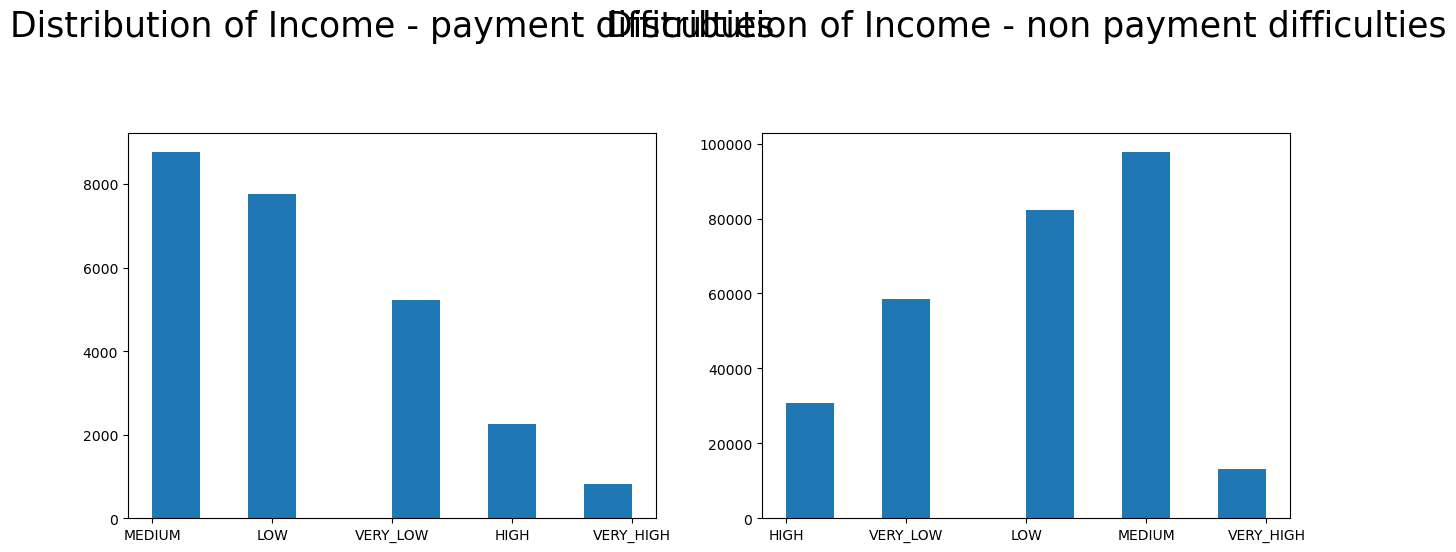

In [458]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(app_target_1['AMT_INCOME_TYPE'])
plt.title('Distribution of Income - payment difficulties')
plt.subplot(1,2,2)
plt.hist(app_target_0['AMT_INCOME_TYPE'])
plt.title('Distribution of Income - non payment difficulties')

plt.show()

**Insights:**

Clients having low and medium income are at high risk to default.

### Analysis on continuous variables


**1. Amount credit**

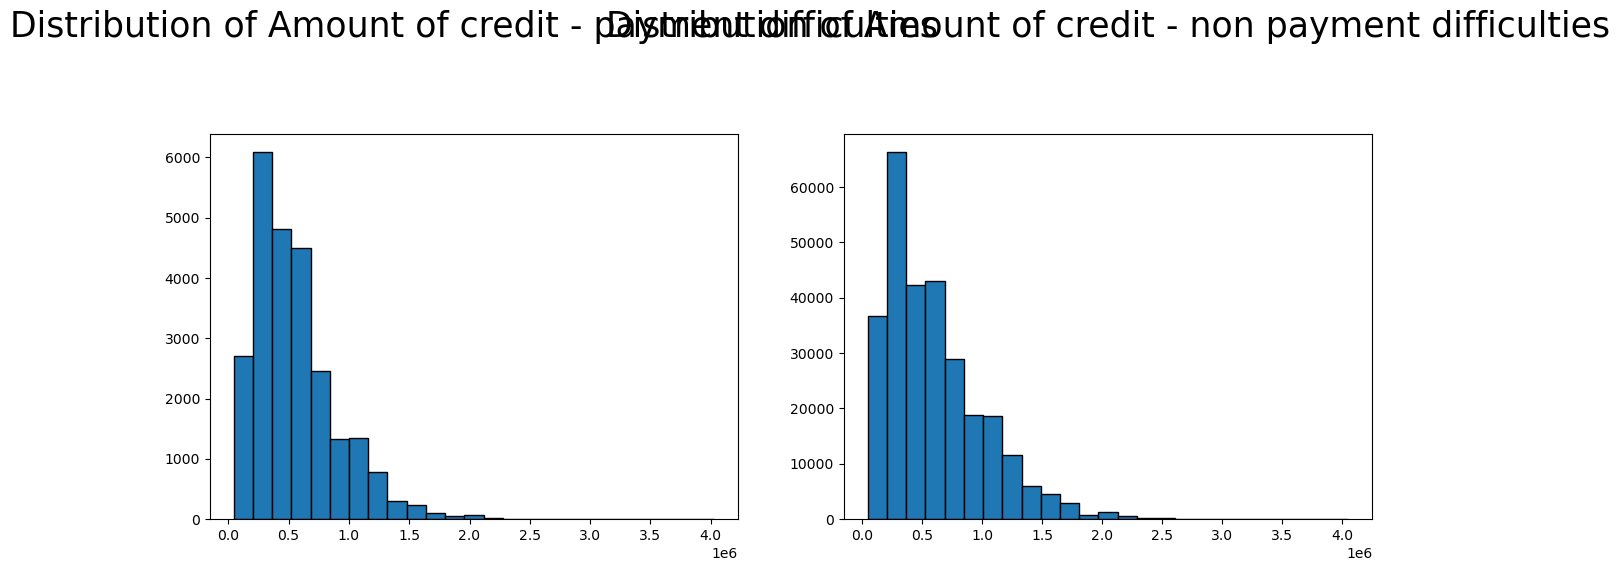

In [459]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(app_target_1['AMT_CREDIT'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Amount of credit - payment difficulties')
plt.subplot(1,2,2)
plt.hist(app_target_0['AMT_CREDIT'], edgecolor = 'k', bins = 25)
plt.title('Distribution of Amount of credit - non payment difficulties')

plt.show()

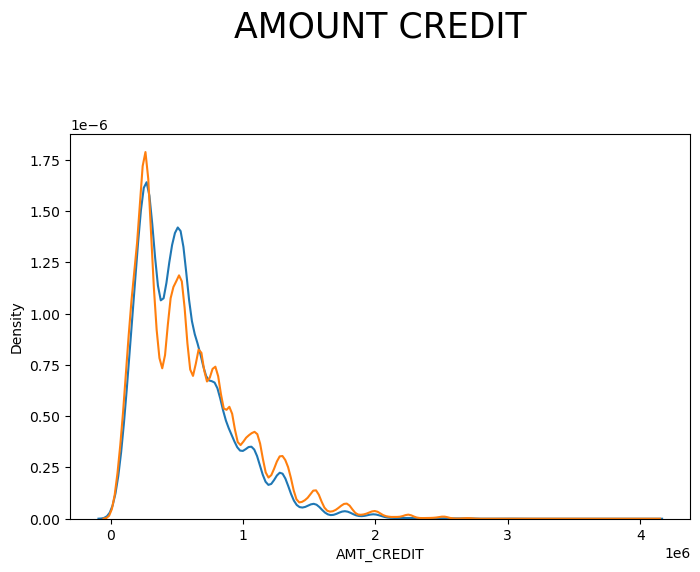

In [460]:
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_1['AMT_CREDIT'], label = 'default')
sns.kdeplot(app_target_0['AMT_CREDIT'], label = 'non-default')
plt.title('AMOUNT CREDIT')
plt.show()

**2. Amount Income Total**

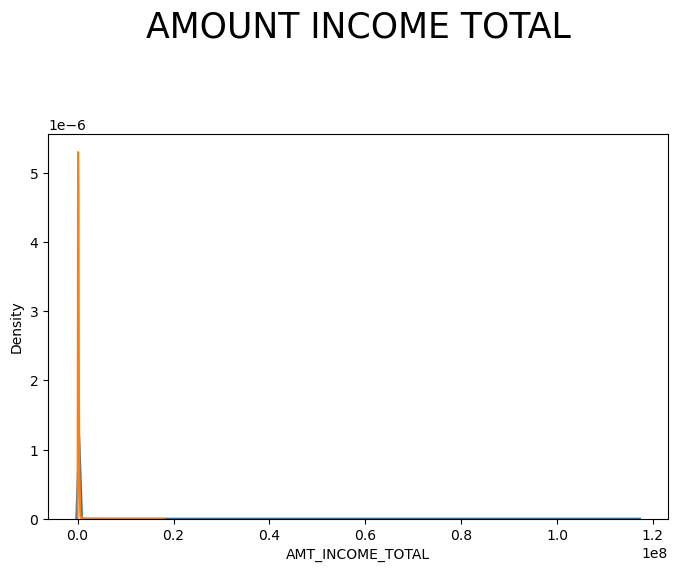

In [461]:
plt.figure(figsize = (8,5))
sns.kdeplot(app_target_1['AMT_INCOME_TOTAL'], label = 'default')
sns.kdeplot(app_target_0['AMT_INCOME_TOTAL'], label = 'non-default')
plt.title('AMOUNT INCOME TOTAL')
plt.show()

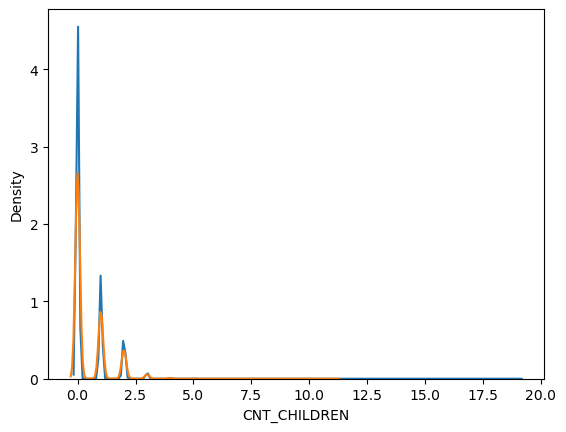

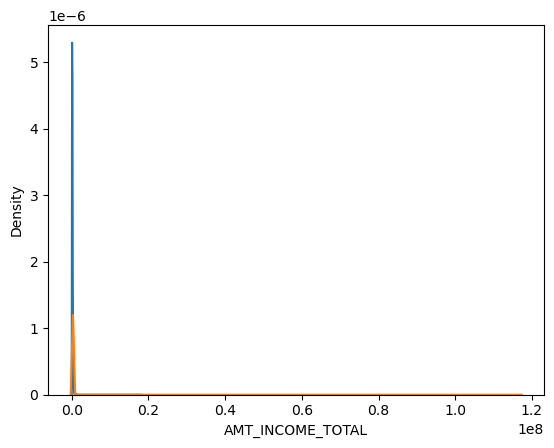

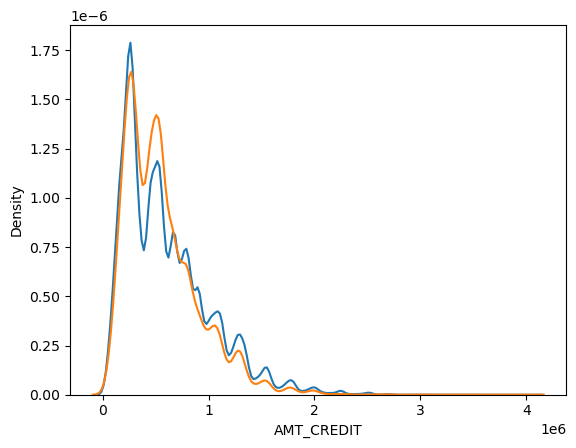

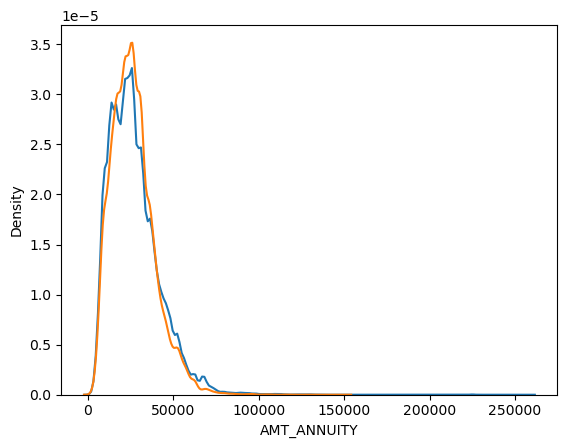

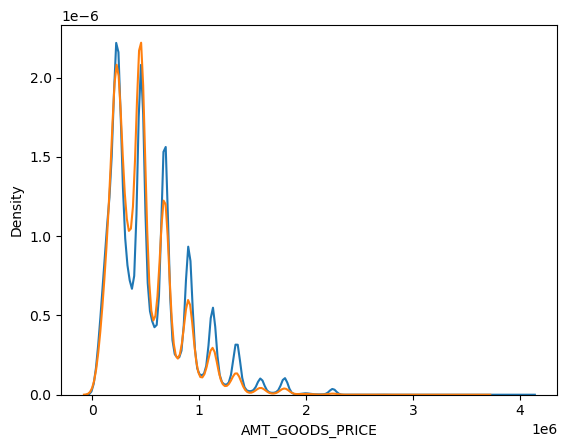

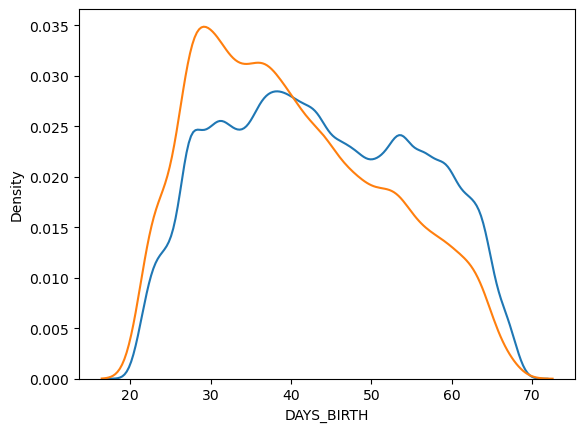

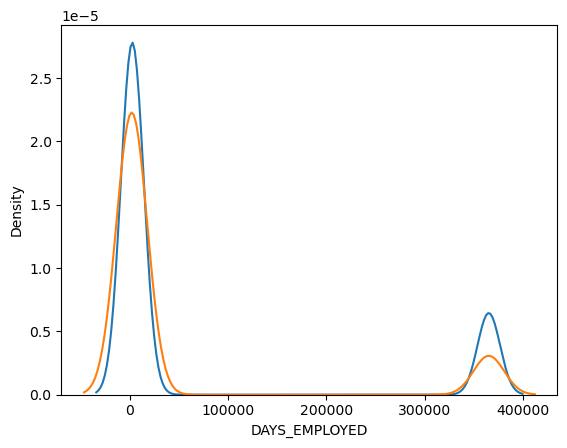

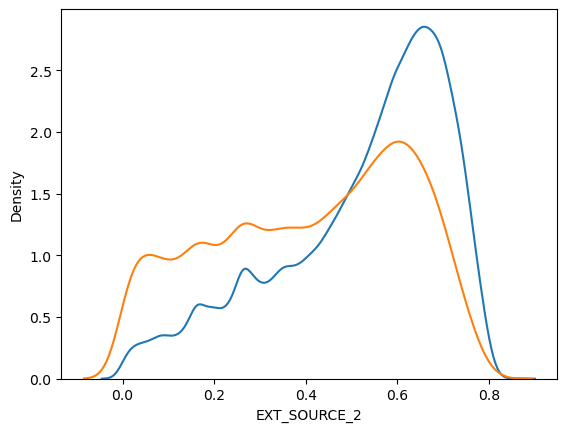

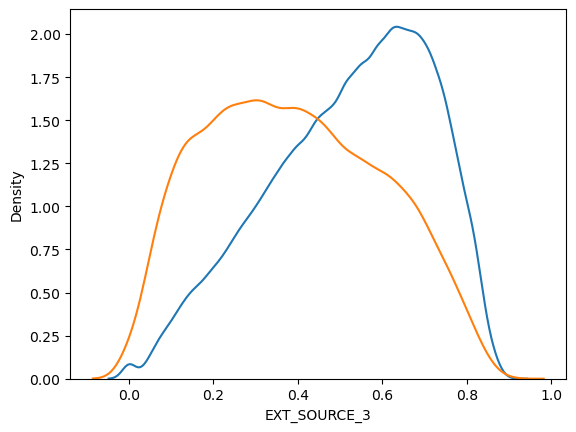

In [462]:
list_numerical = Numerical_for_outliers
for i in list_numerical:
    sns.distplot(app_target_0[i], hist = False, label = 'No Default')
    sns.distplot(app_target_1[i], hist = False, label = 'Payment difficulty')
    plt.show()

### Plotting them in seperate columns for clarity.

Graph for :  CNT_CHILDREN


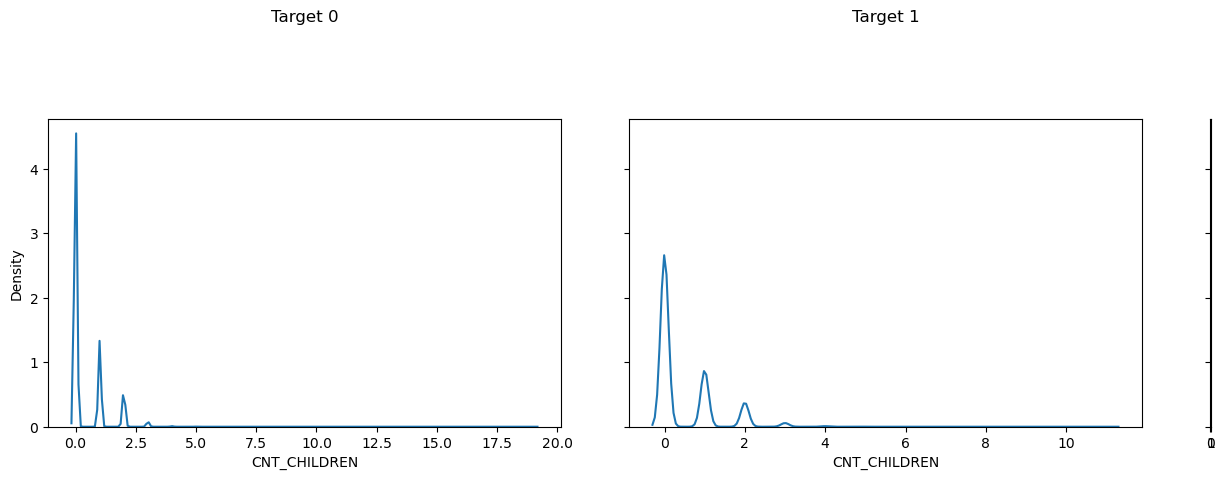

Graph for :  AMT_INCOME_TOTAL


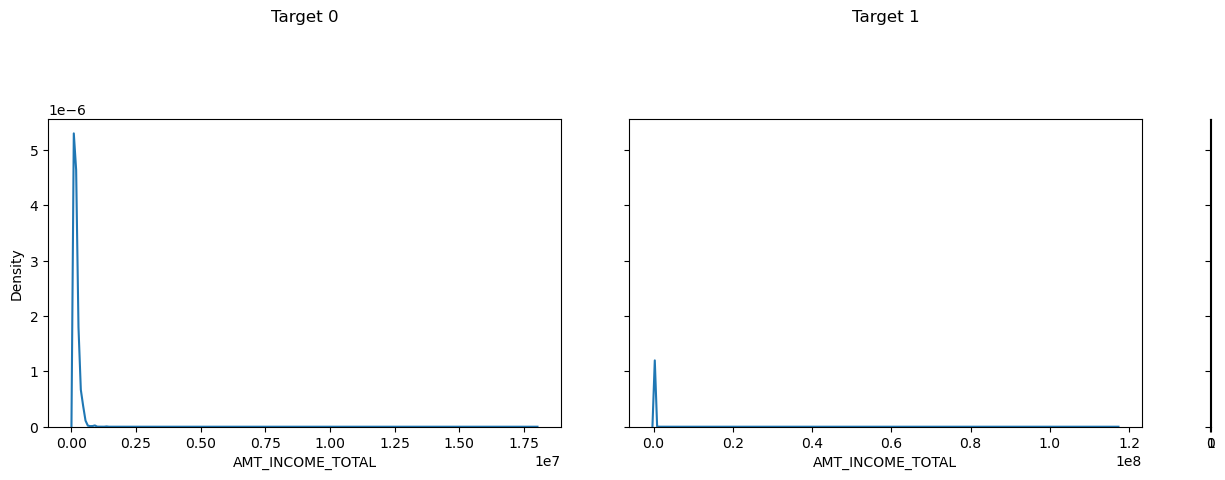

Graph for :  AMT_CREDIT


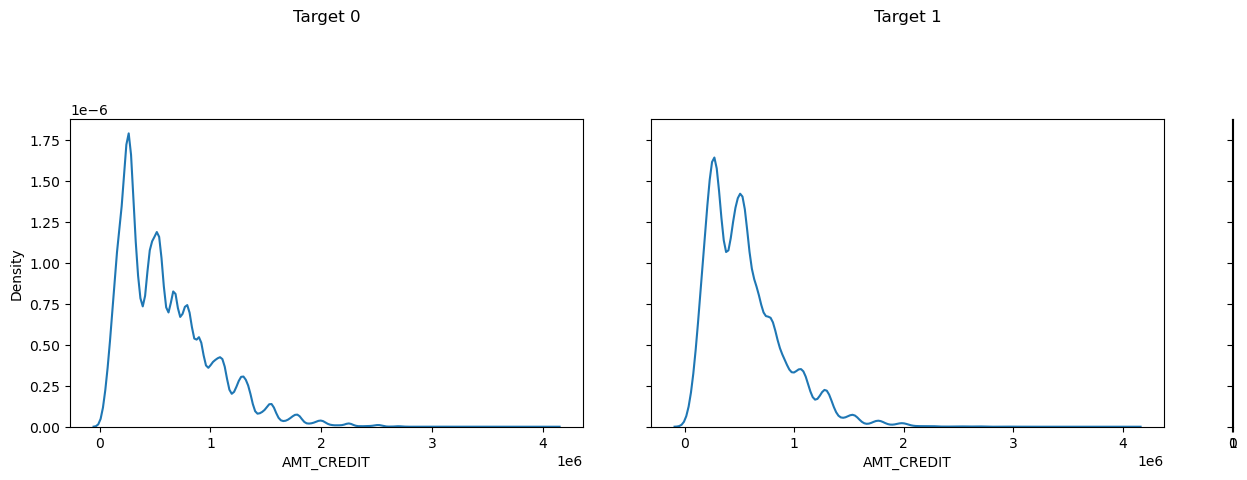

Graph for :  AMT_ANNUITY


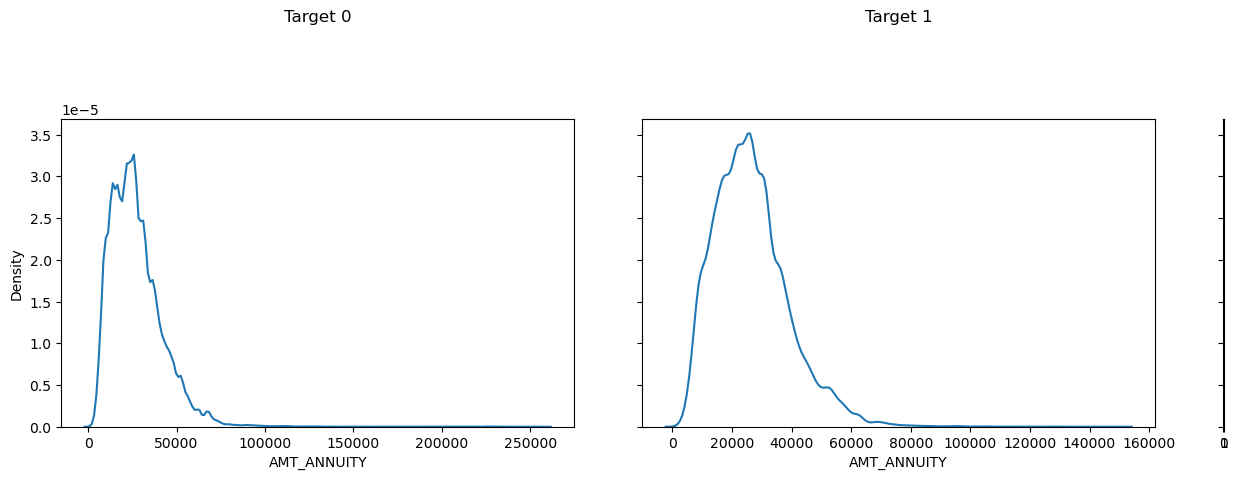

Graph for :  AMT_GOODS_PRICE


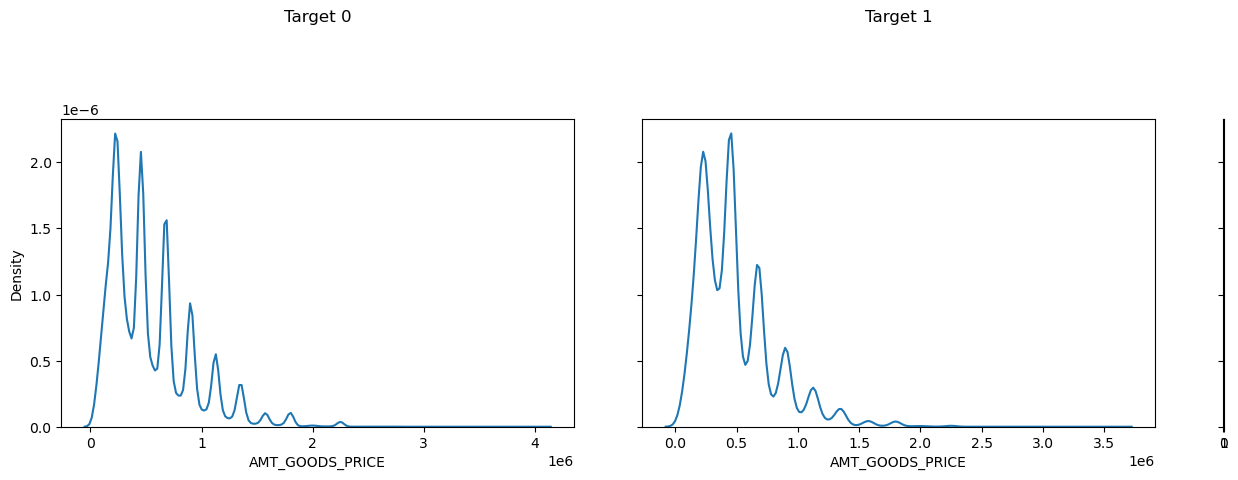

Graph for :  DAYS_BIRTH


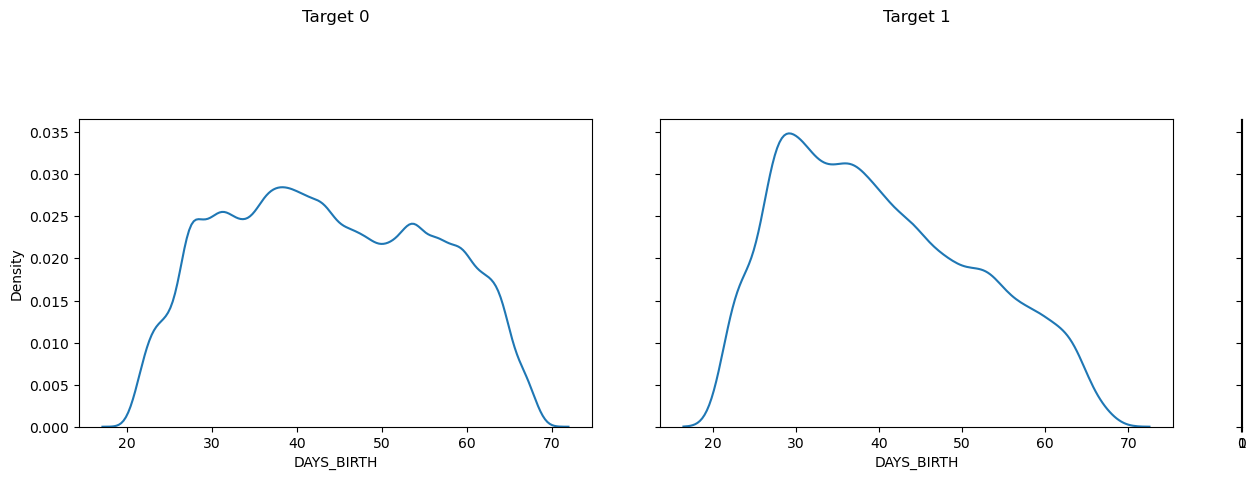

Graph for :  DAYS_EMPLOYED


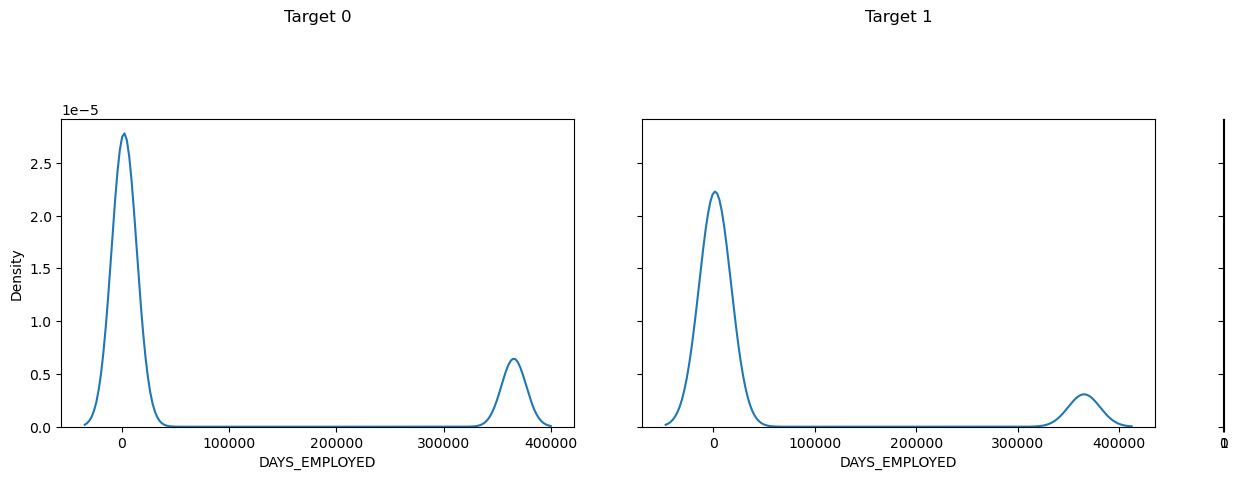

Graph for :  EXT_SOURCE_2


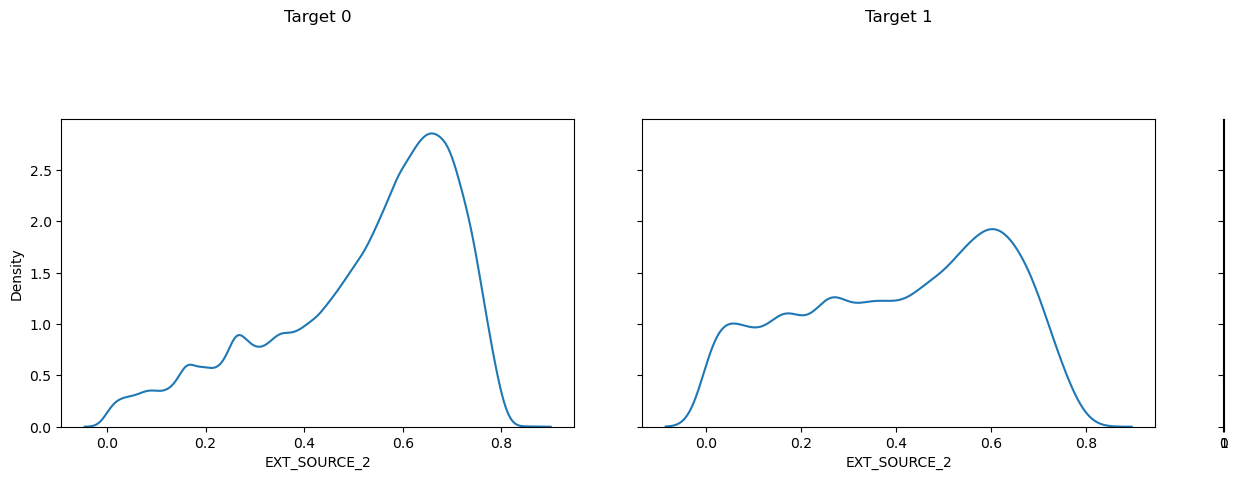

Graph for :  EXT_SOURCE_3


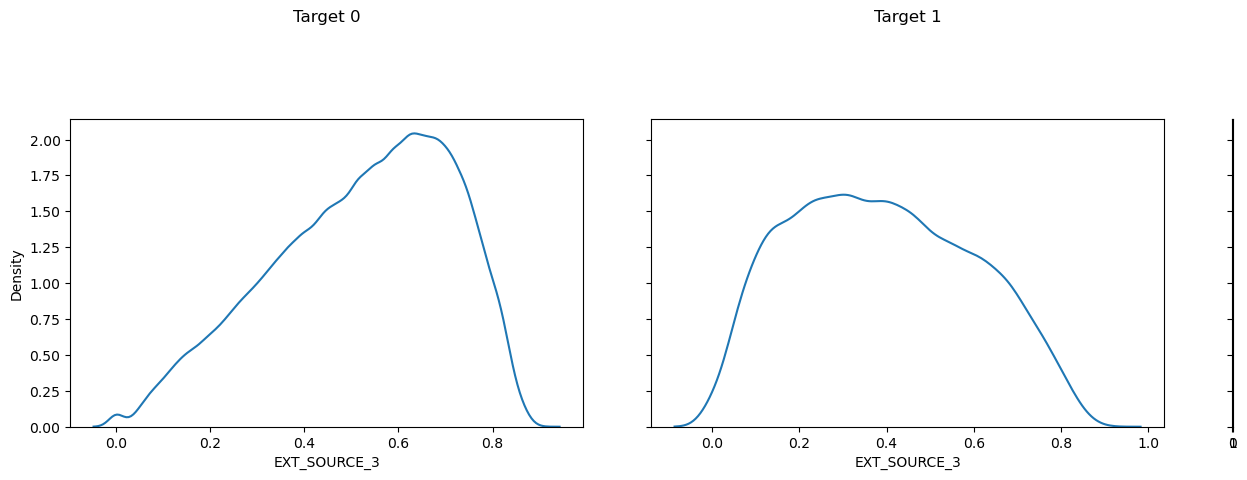

In [463]:
for col in list_numerical:
    cat_num_0=app_target_0[col].value_counts()
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,gridspec_kw={'width_ratios':[1,1, 0.001]},figsize=(15,4))
    print("Graph for : ",col)
    chart1=sns.distplot(app_target_0[col], ax=ax1,hist = False)
    
    
    chart1.axes.set_title('Target 0',fontsize= 12,fontweight= 7,color='Black')
    cat_num_1=app_target_1[col].value_counts()
    chart2=sns.distplot(a=app_target_1[col],ax=ax2,hist = False)
    
    chart2.axes.set_title('Target 1',fontsize= 12,fontweight= 7,color='Black')
    plt.show()

 **Insights:**

**Amount credit** - Here, we can see that the lesser loan credit amount, the higher the default chances. We can do bivariate analysis with Occupation Type to find out more insight.

**Amount annuity**- The loan annuty is mostly concentrated within 10000 to 40000 range in both the cases.

**Amount goods price** - Higher the goods price, people are becoming the less defaulted. We can infer that, rich people are buying costly product and thus they are becoming less defaulted.

**EXT_SOURCE_2** is clearing showing that TARGET 0 has higher densiy of higher scores

In other cases, because data is highly imbalanced, inferences cannot be derived.


### **Segmented univariate analysis**

#### a. Age and Income Category Segmented two variables

In [464]:
Age_Income_by_target = pd.pivot_table(data=app_data1, index="AMT_INCOME_TYPE", columns="AGE_GROUP", values="TARGET")
Age_Income_by_target

AGE_GROUP        Very_Young     Young  Middle_Age  Senior_Citizen
AMT_INCOME_TYPE                                                  
VERY_LOW           0.125486  0.120744    0.072768        0.049991
LOW                0.126992  0.114385    0.075388        0.048805
MEDIUM             0.109953  0.103911    0.074472        0.050919
HIGH               0.075437  0.080934    0.065040        0.042576
VERY_HIGH          0.108614  0.069005    0.053976        0.039519

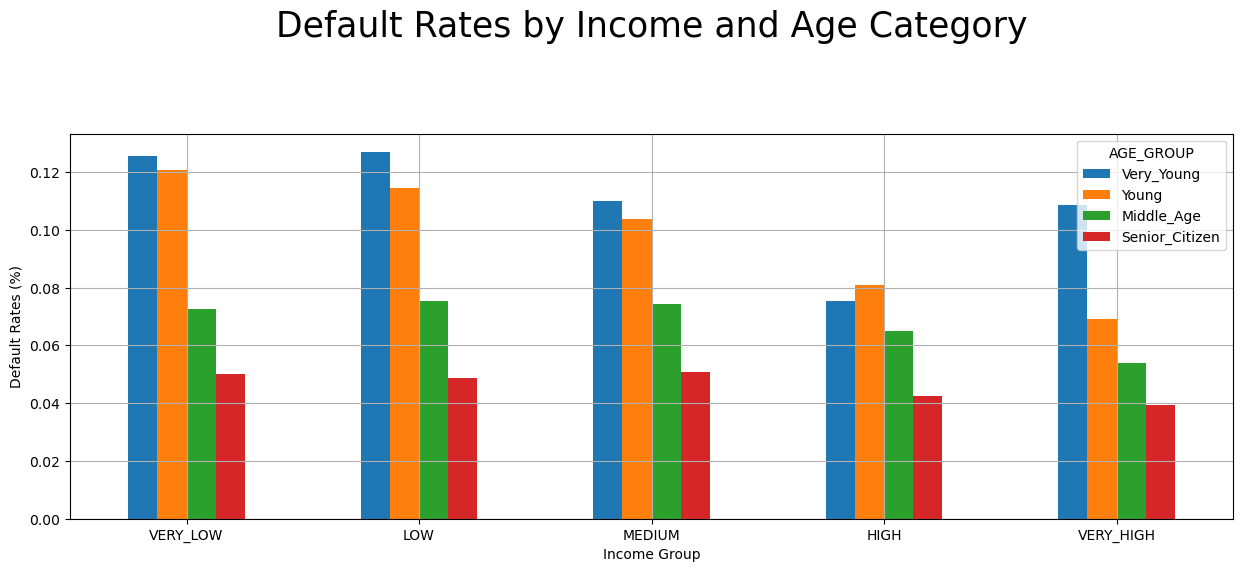

In [465]:
ax = Age_Income_by_target.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Age Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()

**Insights** :

As the income level increases, there is less default rates.

Very young and Very high income category is an exception, which has very high default rate.
 

### b. Age group vs Gender

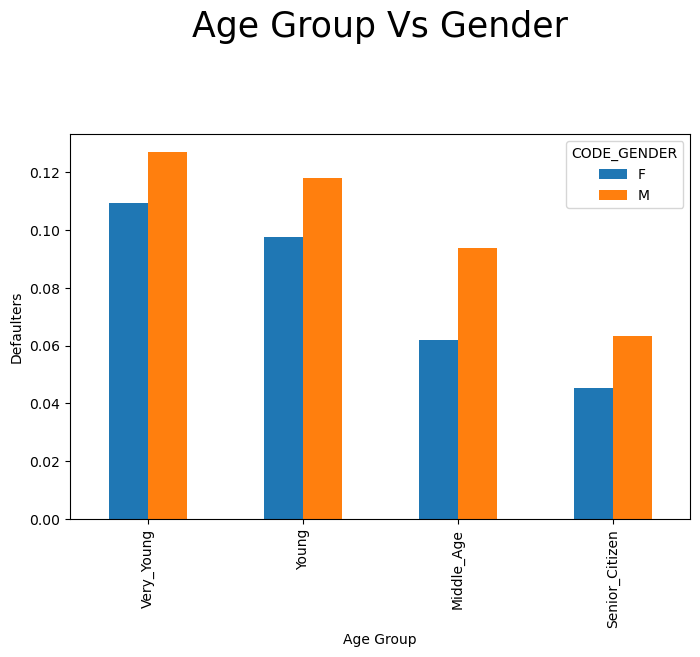

In [466]:
app_data1.pivot_table(values='TARGET',index='AGE_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5))
plt.xlabel('Age Group')
plt.ylabel('Defaulters')
plt.title('Age Group Vs Gender')
plt.show()

Men more probable to default across age groups.

Very young male has higher default rate.

# Bivariate Analysis 

### Amount credited across different categories

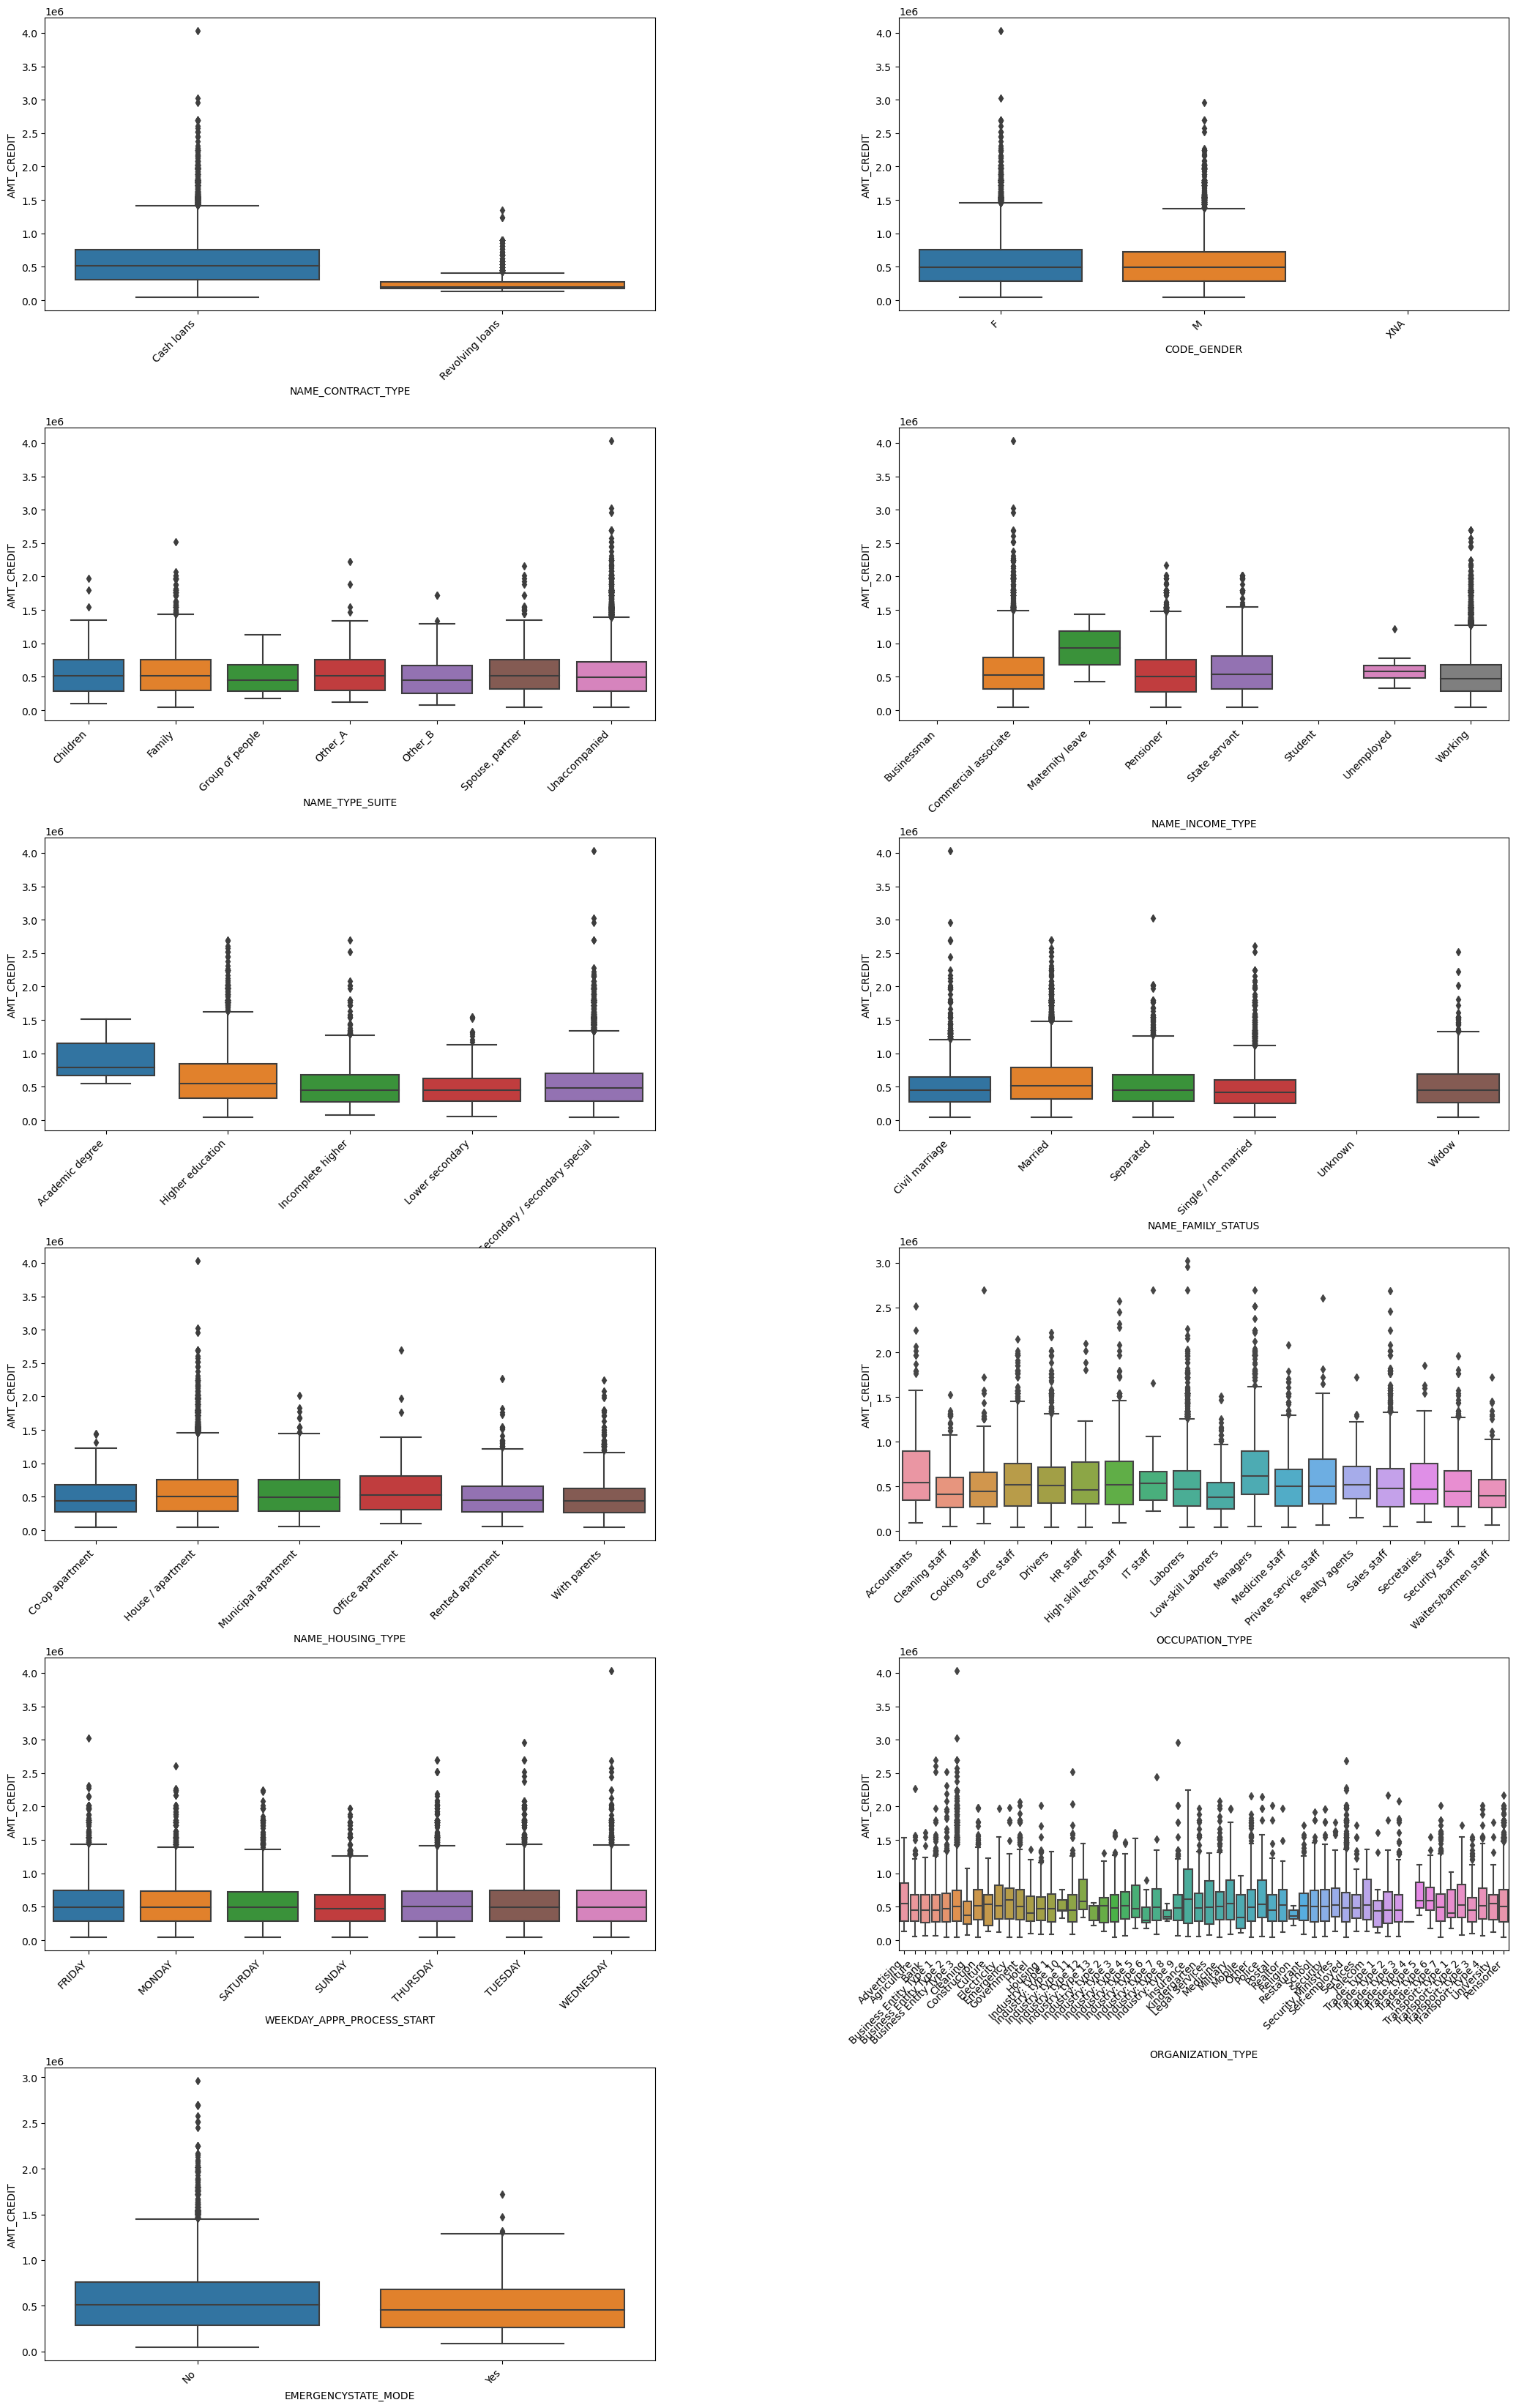

In [467]:

plt.figure(figsize=(25,40))
#figure.tight_layout(pad=5.0)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

for i,category in enumerate(Categorical_columns):
    ax = plt.subplot(6,2,i+1)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=app_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

#### Analysis
1. Amount credit is higher for Very High income groups.  
2. Median of Loan values defaulting for Applicants with Academic degree is higher
3. Though male applicants are lower, ratio of male applicants deafulting is higher.
4. Higher education got more loans
5. Married people got more number of loans
6. Clients who are living in municipal apartment, got more number of loans
7. High income group people got more loans.

### Income amount across NAME_INCOME_TYPE

In [468]:
IncomeType_Amt_by_target = pd.pivot_table(data=app_data1, index="AMT_INCOME_TYPE", columns="NAME_INCOME_TYPE", values="TARGET")
IncomeType_Amt_by_target

NAME_INCOME_TYPE  Businessman  Commercial associate  Maternity leave  \
AMT_INCOME_TYPE                                                        
VERY_LOW                  NaN              0.086502         0.666667   
LOW                       NaN              0.083086         0.000000   
MEDIUM                    0.0              0.075718              NaN   
HIGH                      NaN              0.063766              NaN   
VERY_HIGH                 0.0              0.054183         0.000000   

NAME_INCOME_TYPE  Pensioner  State servant  Student  Unemployed   Working  
AMT_INCOME_TYPE                                                            
VERY_LOW           0.051979       0.067449      0.0        0.50  0.101067  
LOW                0.055265       0.064443      0.0        0.25  0.099922  
MEDIUM             0.056244       0.057989      0.0        0.00  0.095710  
HIGH               0.048501       0.041241      NaN        0.00  0.081160  
VERY_HIGH          0.052775       0.032573      0.0         NaN  0.070280

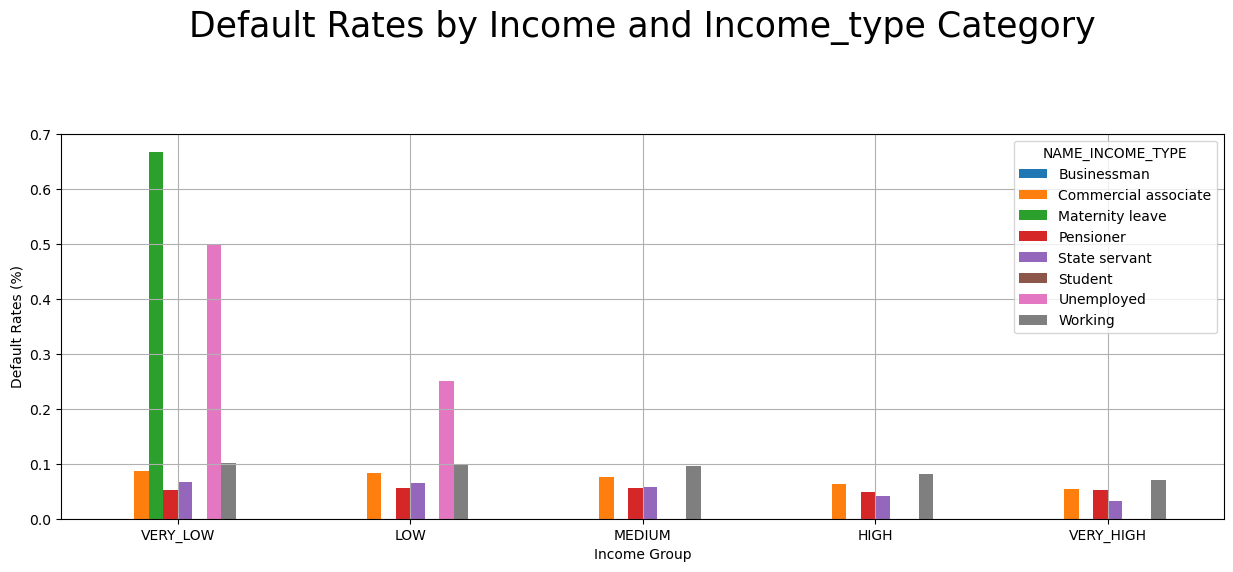

In [469]:
ax = IncomeType_Amt_by_target.plot(
    kind='bar',
    grid=True,
    figsize=(15, 5),
    title='Default Rates by Income and Income_type Category'
)

ax.set_xlabel("Income Group")
ax.set_ylabel('Default Rates (%)')
plt.xticks(rotation = 0)

plt.show()



Maternity leave with very low income has highest default rates

Unemployed also has high default rate for very low and low income groups.

# Correlations

In [470]:
Heatmap_corr = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

In [471]:
app_target_00 = app_target_0[Heatmap_corr]
corr_target0 = app_target_00.corr(method='spearman')

In [472]:
corr_target0

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.038308    0.002315   
AMT_INCOME_TOTAL                 0.038308          1.000000    0.416017   
AMT_CREDIT                       0.002315          0.416017    1.000000   
AMT_ANNUITY                      0.024767          0.485699    0.831900   
REGION_POPULATION_RELATIVE      -0.025551          0.097772    0.053570   
DAYS_BIRTH                      -0.375611         -0.093418    0.057140   
DAYS_EMPLOYED                   -0.205693         -0.095898    0.017986   
DAYS_REGISTRATION               -0.180517         -0.076387   -0.009416   
DAYS_ID_PUBLISH                  0.019986         -0.035931    0.001982   
HOUR_APPR_PROCESS_START          0.001725          0.102384    0.051370   
REG_REGION_NOT_LIVE_REGION      -0.010738          0.078372    0.019093   
REG_REGION_NOT_WORK_REGION       0.015455          0.161441    0.045430   
LIVE_REGION_NOT_WORK_REGION      0.021523          0.148976    0.047740   
REG_CITY_NOT_LIVE_CITY           0.027788          0.020368   -0.026649   
REG_CITY_NOT_WORK_CITY           0.076212          0.040087   -0.012662   
LIVE_CITY_NOT_WORK_CITY          0.071585          0.040321    0.006972   

                             AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
CNT_CHILDREN                    0.024767                   -0.025551   
AMT_INCOME_TOTAL                0.485699                    0.097772   
AMT_CREDIT                      0.831900                    0.053570   
AMT_ANNUITY                     1.000000                    0.058591   
REGION_POPULATION_RELATIVE      0.058591                    1.000000   
DAYS_BIRTH                     -0.011725                    0.030825   
DAYS_EMPLOYED                  -0.030195                   -0.003651   
DAYS_REGISTRATION              -0.037717                    0.036684   
DAYS_ID_PUBLISH                -0.016569                    0.010463   
HOUR_APPR_PROCESS_START         0.054189                    0.128237   
REG_REGION_NOT_LIVE_REGION      0.035823                   -0.019922   
REG_REGION_NOT_WORK_REGION      0.075783                    0.029206   
LIVE_REGION_NOT_WORK_REGION     0.073054                    0.051195   
REG_CITY_NOT_LIVE_CITY         -0.004963                   -0.045545   
REG_CITY_NOT_WORK_CITY          0.009717                   -0.029350   
LIVE_CITY_NOT_WORK_CITY         0.019451                   -0.005476   

                             DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
CNT_CHILDREN                  -0.375611      -0.205693          -0.180517   
AMT_INCOME_TOTAL              -0.093418      -0.095898          -0.076387   
AMT_CREDIT                     0.057140       0.017986          -0.009416   
AMT_ANNUITY                   -0.011725      -0.030195          -0.037717   
REGION_POPULATION_RELATIVE     0.030825      -0.003651           0.036684   
DAYS_BIRTH                     1.000000       0.583506           0.297997   
DAYS_EMPLOYED                  0.583506       1.000000           0.201306   
DAYS_REGISTRATION              0.297997       0.201306           1.000000   
DAYS_ID_PUBLISH                0.261471       0.259900           0.094153   
HOUR_APPR_PROCESS_START       -0.098326      -0.084417           0.008471   
REG_REGION_NOT_LIVE_REGION    -0.066393      -0.071272          -0.025938   
REG_REGION_NOT_WORK_REGION    -0.096358      -0.137882          -0.032723   
LIVE_REGION_NOT_WORK_REGION   -0.069986      -0.112790          -0.024163   
REG_CITY_NOT_LIVE_CITY        -0.180919      -0.145590          -0.055307   
REG_CITY_NOT_WORK_CITY        -0.239047      -0.262852          -0.085865   
LIVE_CITY_NOT_WORK_CITY       -0.156516      -0.198795          -0.062442   

                             DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
CNT_CHILDREN                        0.019986                 0.001725   
AMT_INCOME_TOTAL                   -0.035931                 0.102384   

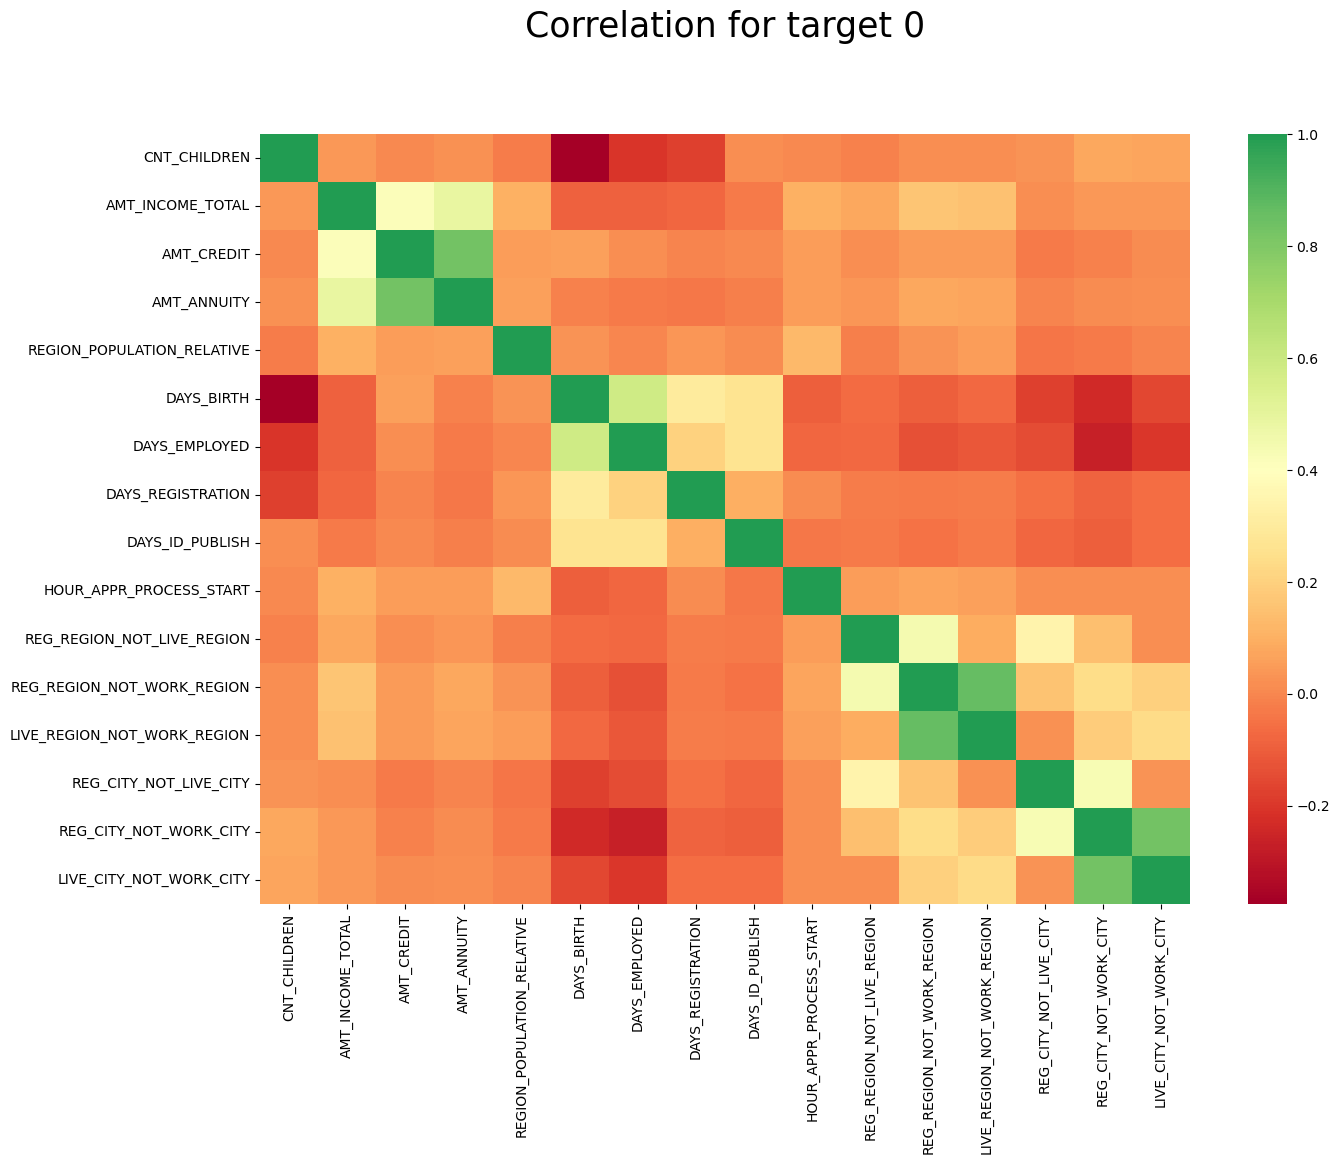

In [473]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70


sns.heatmap(corr_target0, cmap="RdYlGn",annot=False,center=0.4)

plt.title("Correlation for target 0")
plt.yticks(rotation=0)
plt.show()

In [474]:
app_target_11 = app_target_1[Heatmap_corr]
corr_target1 = app_target_11.corr(method='spearman')


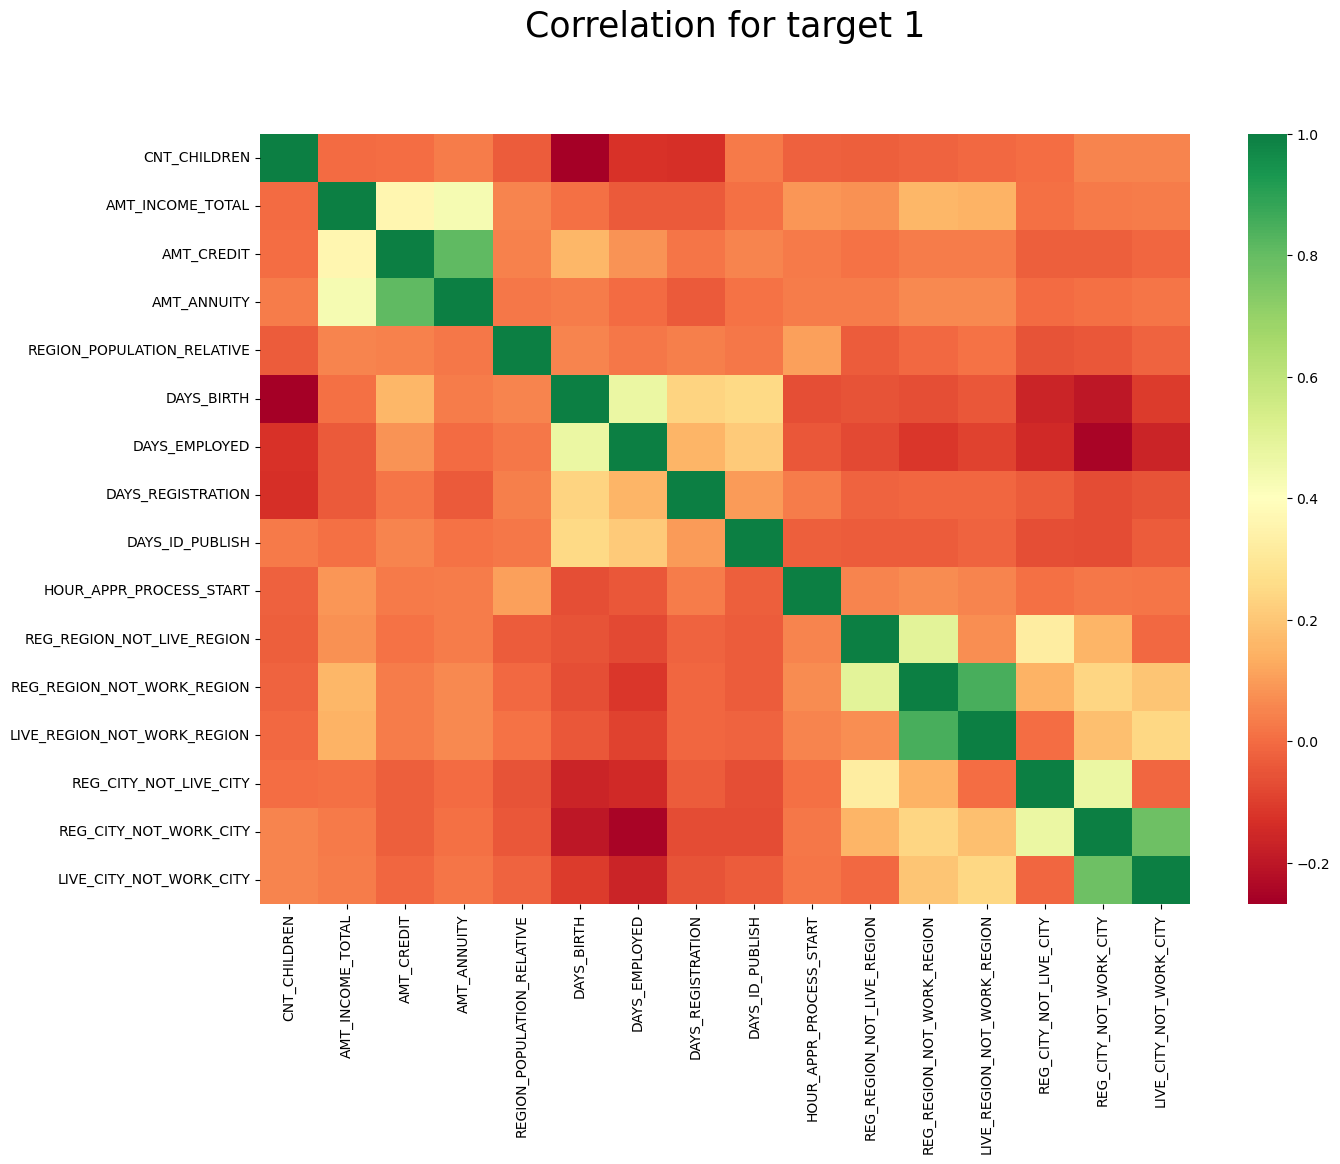

In [475]:
plt.figure(figsize=(15, 10))
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titlepad'] = 70


sns.heatmap(corr_target1, cmap="RdYlGn",annot=False,center=0.4)

plt.title("Correlation for target 1")
plt.yticks(rotation=0)
plt.show()

In [476]:
app_target_000 = app_target_0[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT','CNT_FAM_MEMBERS']]

In [477]:

corr_target00 = app_target_000.corr().abs()

corr_df = corr_target00.where(np.triu(np.ones(corr_target00.shape),k=1).astype(bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)


corr_df.head(50)

Column1           Column2  Correlation
12   CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
9         AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
14   CNT_FAM_MEMBERS        AMT_CREDIT     0.064536
13   CNT_FAM_MEMBERS  AMT_INCOME_TOTAL     0.034256
4   AMT_INCOME_TOTAL      CNT_CHILDREN     0.027397
8         AMT_CREDIT      CNT_CHILDREN     0.003081

In [478]:
V1 = corr_df.head(15)['Column1'].tolist()
V2 = corr_df.head(15)['Column2'].tolist()

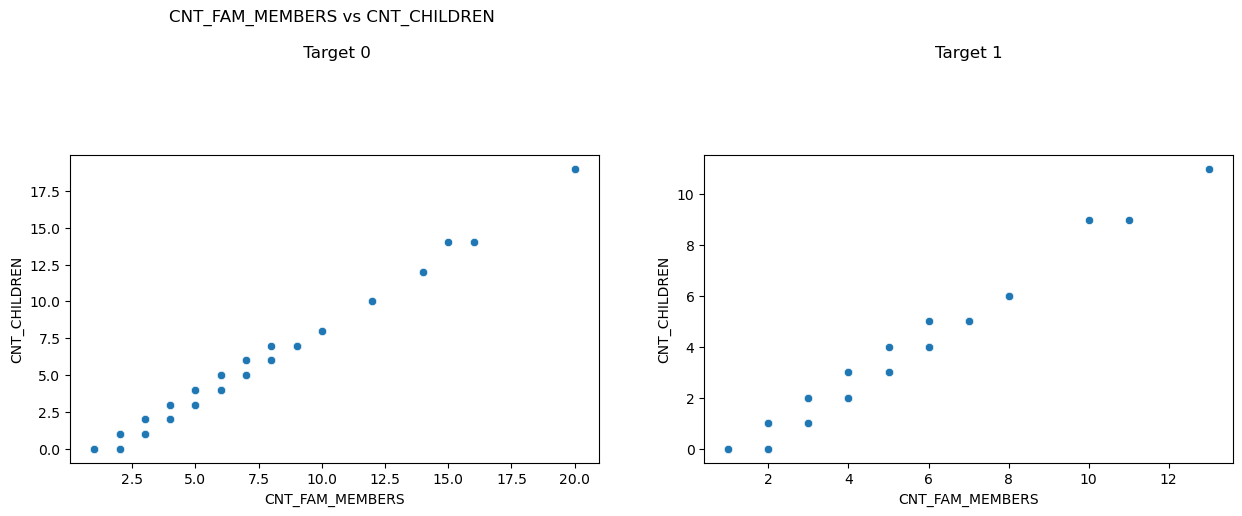

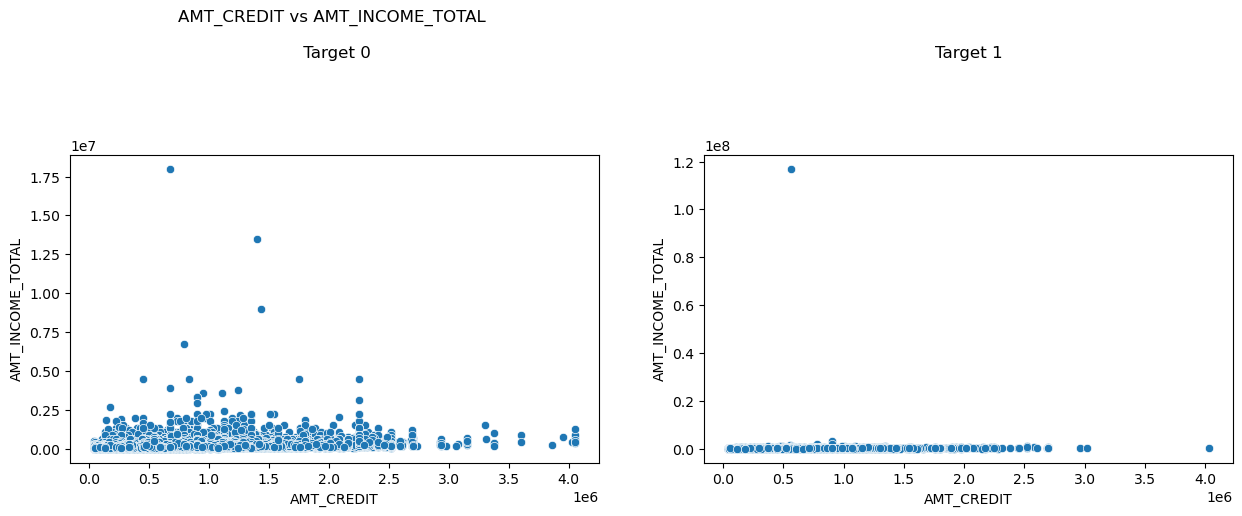

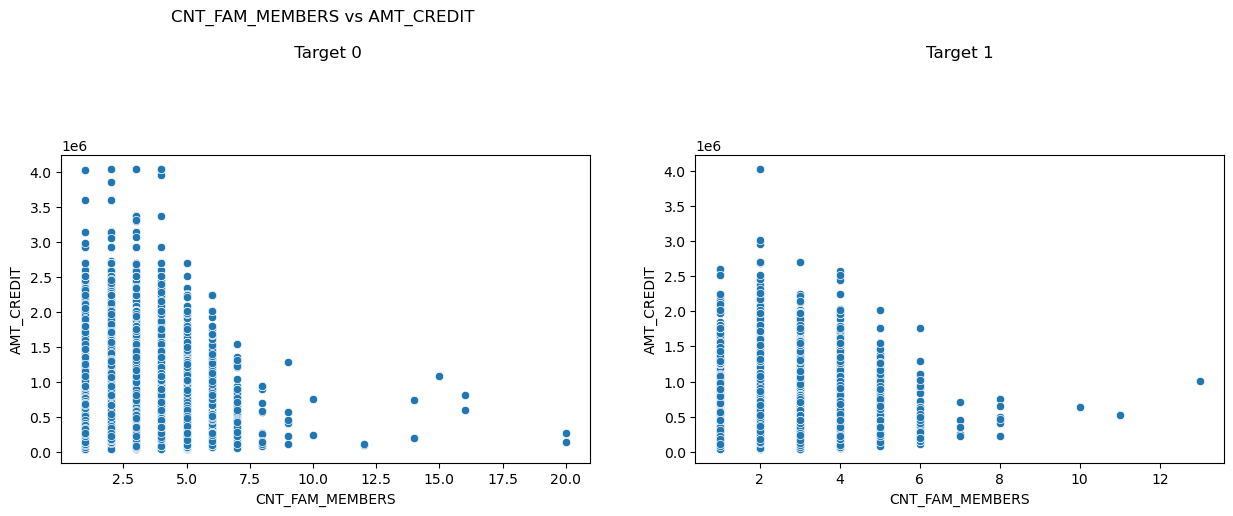

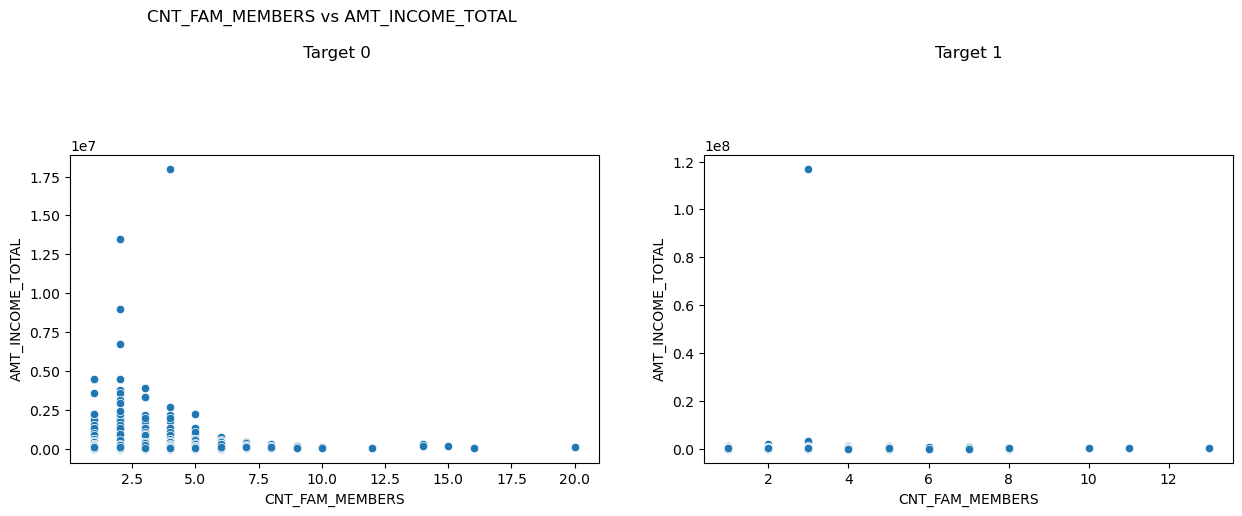

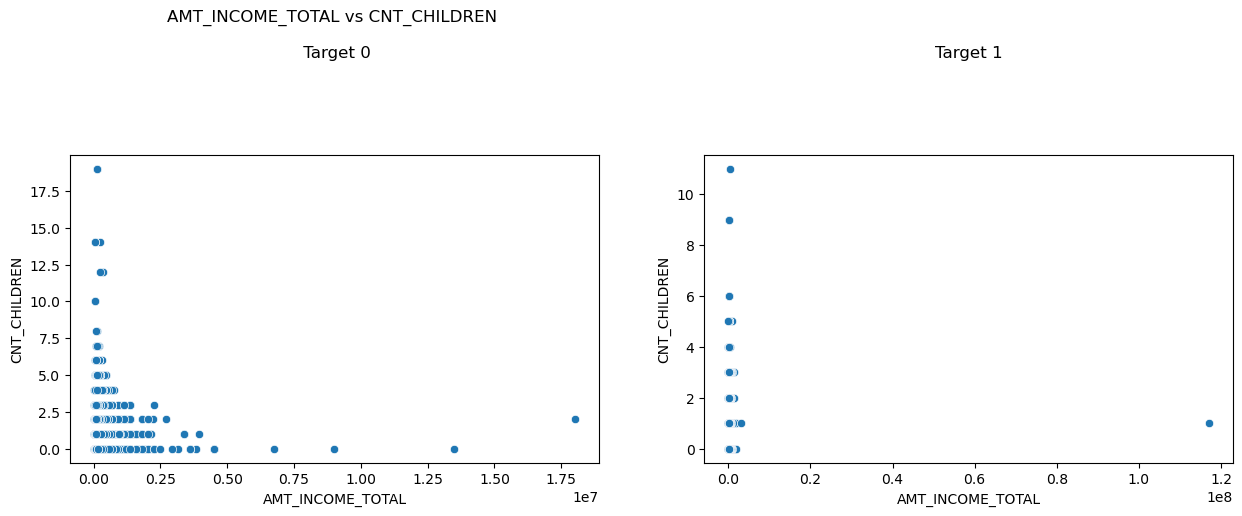

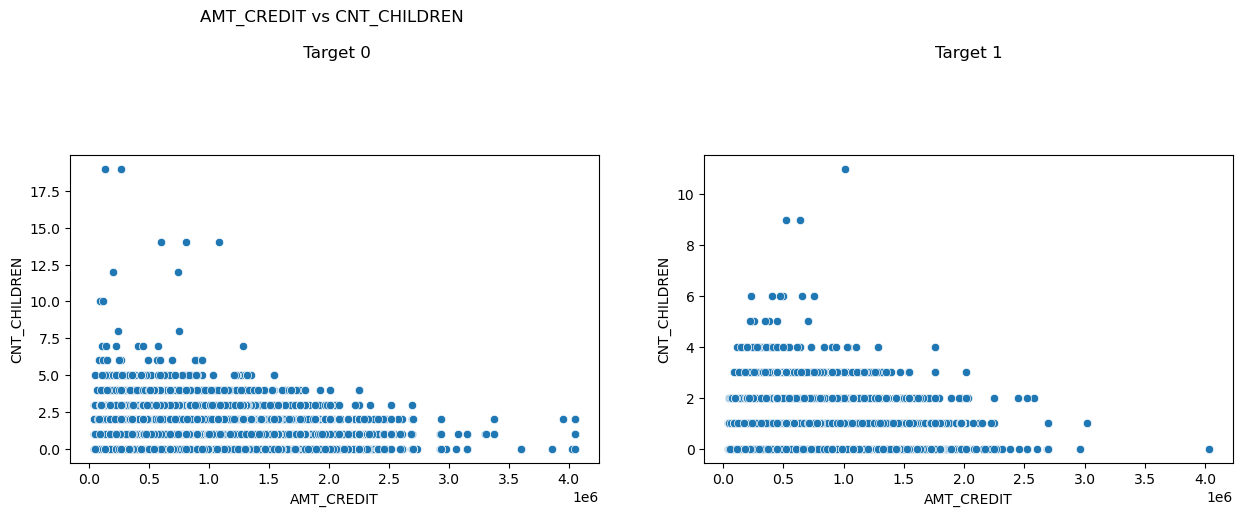

In [479]:
i=0
for i in range(6):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
    sns.scatterplot(x=V1[i], y=V2[i],data=app_target_0,ax=ax1)
    ax1.set_xlabel(V1[i])    
    ax1.set_ylabel(V2[i])
    ax1.set_title(f'{V1[i]} vs {V2[i]} \n\n Target 0',fontsize=12)
    
    sns.scatterplot(x=V1[i], y=V2[i],data=app_target_1,ax=ax2)
    ax2.set_xlabel(V1[i])    
    ax2.set_ylabel(V2[i])
    ax2.set_title(f'Target 1',fontsize=12)
            
    plt.show()    
    i=i+1

In [480]:
#Creating Correlation matrix after excluding all categorical columns
app_target_00 = app_target_0.drop(Categorical_columns,axis=1)
corr_target00 = app_target_00.corr().abs()

corr_df = corr_target00.where(np.triu(np.ones(corr_target00.shape),k=1).astype(bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df.head(10)


Column1                       Column2  Correlation
1061                FLAG_EMP_PHONE                 DAYS_EMPLOYED     0.999756
2909      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998508
2623                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997018
2552  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.993582
2625                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.988153
566                AMT_GOODS_PRICE                    AMT_CREDIT     0.987250
2483                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.985603
2412  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.971032
2554  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.962064
1561   REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT     0.950149

In [481]:
#correlation for target 1
app_target_11 = app_target_1.drop(Categorical_columns,axis=1)
corr_target11 = app_target_11.corr().abs()


corr_df = corr_target11.where(np.triu(np.ones(corr_target11.shape),k=1).astype(bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset = ['Correlation'], inplace = True)
corr_df = corr_df.sort_values(by=['Correlation'], ascending=False)

corr_df.head(10)

Column1                       Column2  Correlation
1061                FLAG_EMP_PHONE                 DAYS_EMPLOYED     0.999705
2909      OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE     0.998269
2623                FLOORSMAX_MEDI                 FLOORSMAX_AVG     0.997187
2552  YEARS_BEGINEXPLUATATION_MEDI   YEARS_BEGINEXPLUATATION_AVG     0.996124
2625                FLOORSMAX_MEDI                FLOORSMAX_MODE     0.989195
2483                FLOORSMAX_MODE                 FLOORSMAX_AVG     0.986594
566                AMT_GOODS_PRICE                    AMT_CREDIT     0.983103
2412  YEARS_BEGINEXPLUATATION_MODE   YEARS_BEGINEXPLUATATION_AVG     0.980466
2554  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_MODE     0.978073
1561   REGION_RATING_CLIENT_W_CITY          REGION_RATING_CLIENT     0.956637

In [482]:
V1 = corr_df.head(15)['Column1'].tolist()
V2 = corr_df.head(15)['Column2'].tolist()

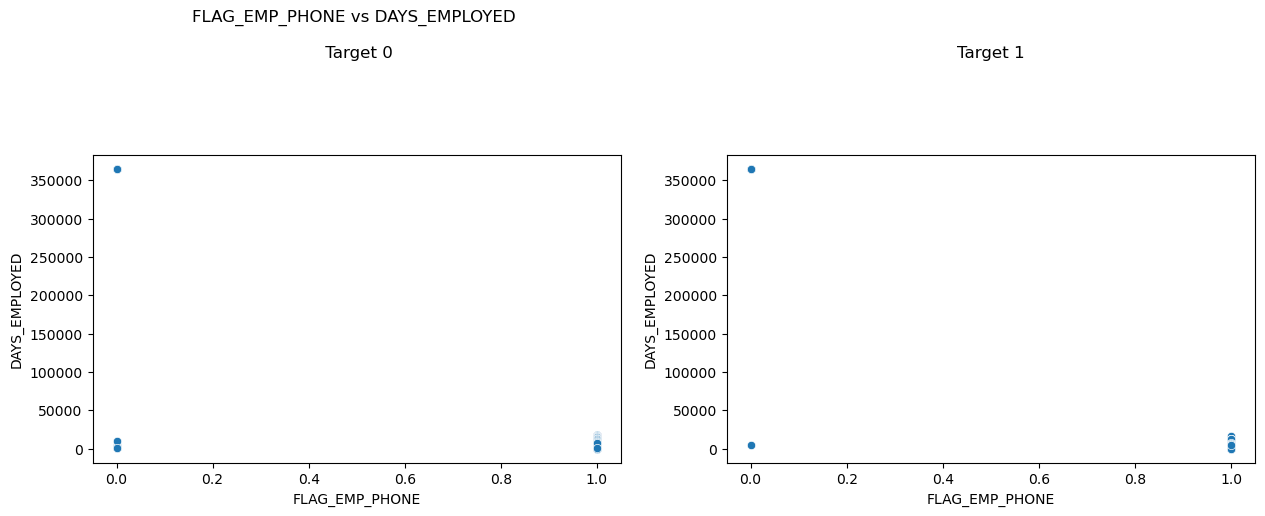

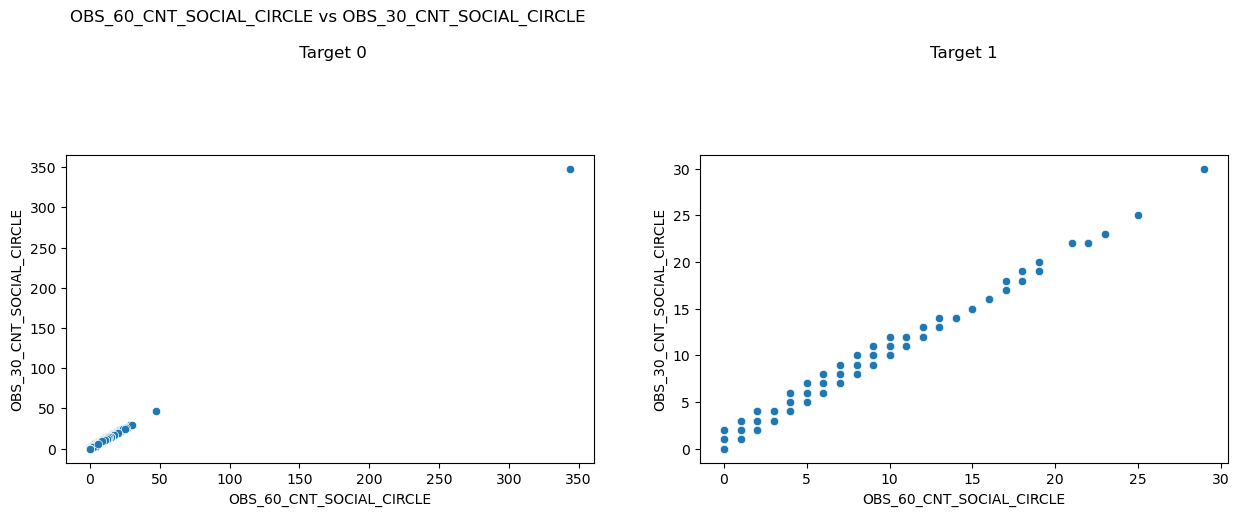

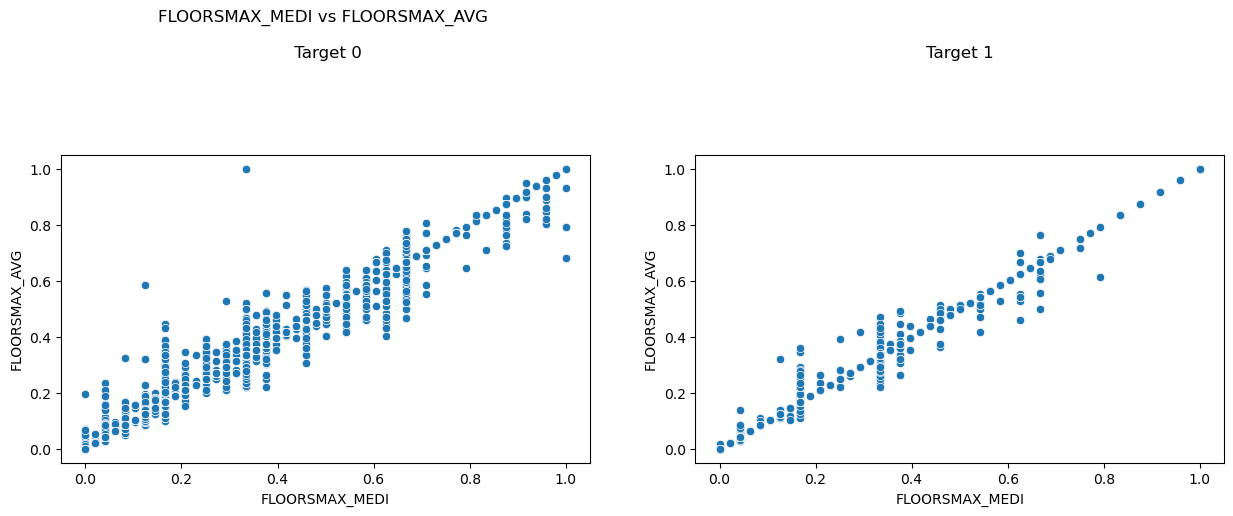

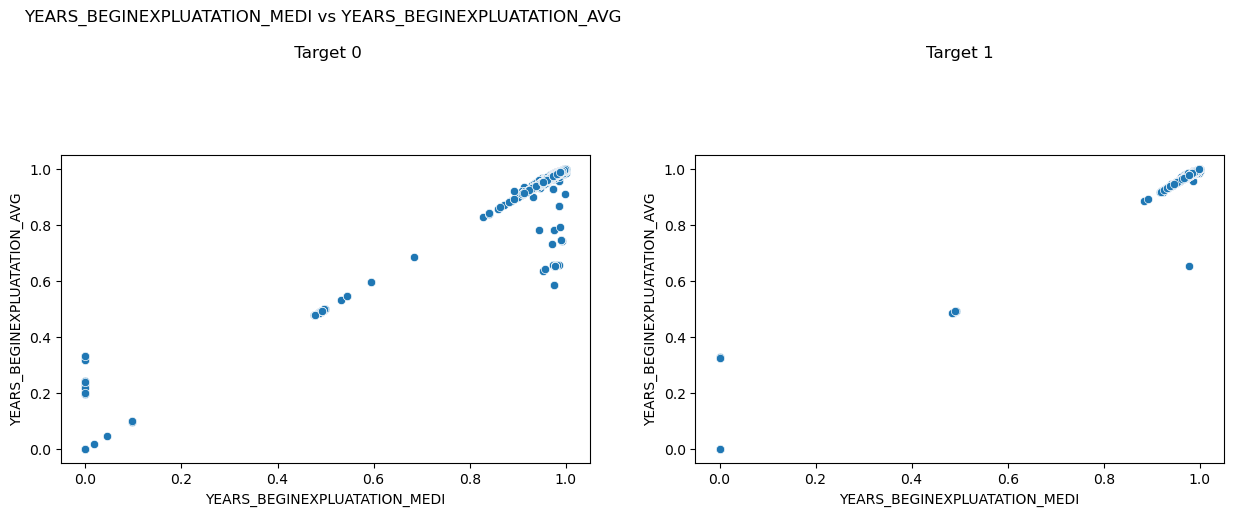

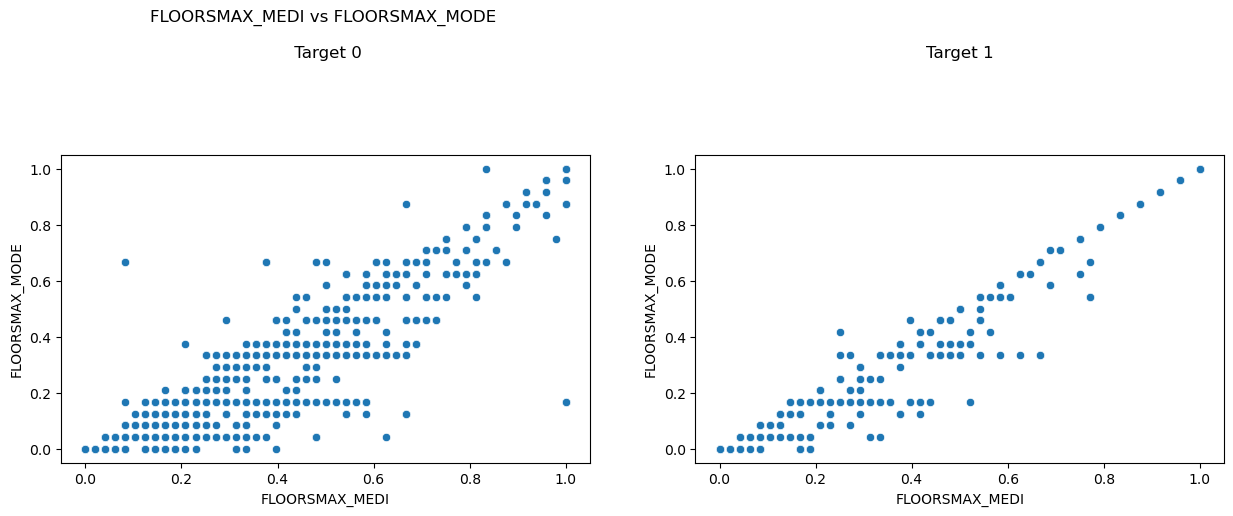

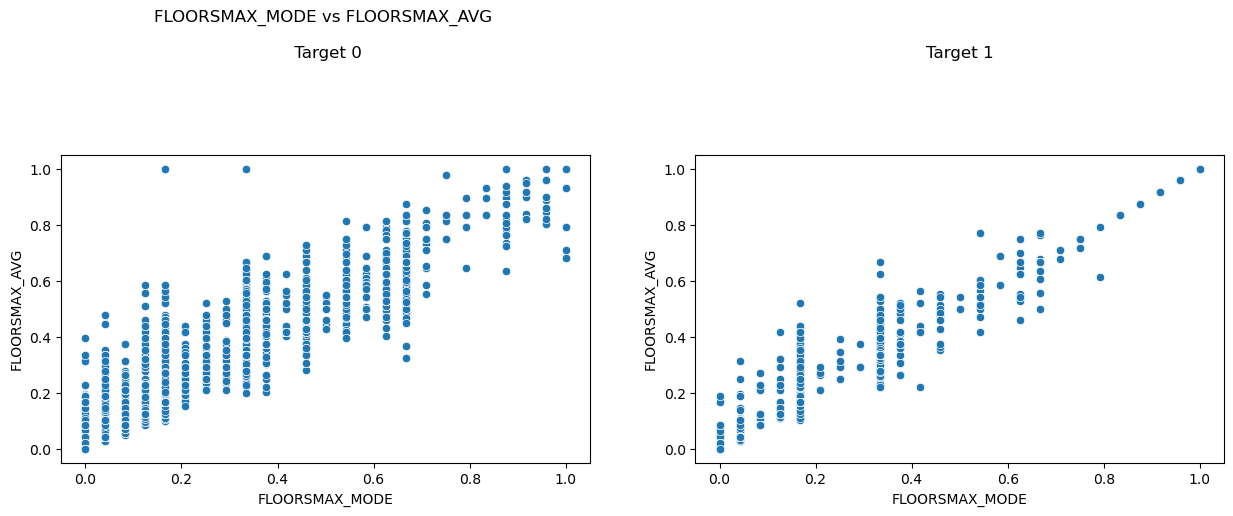

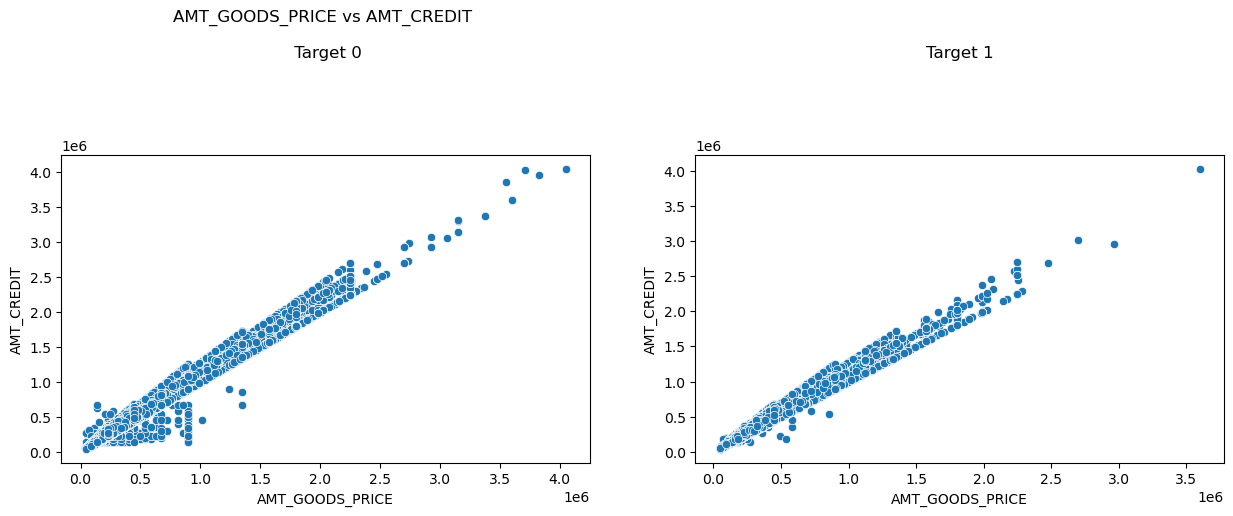

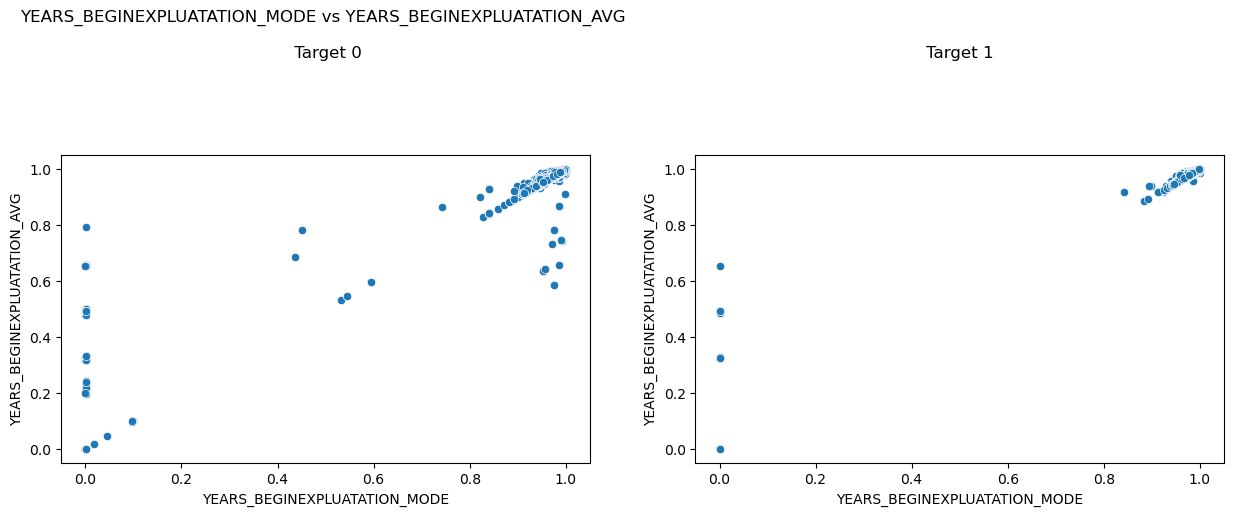

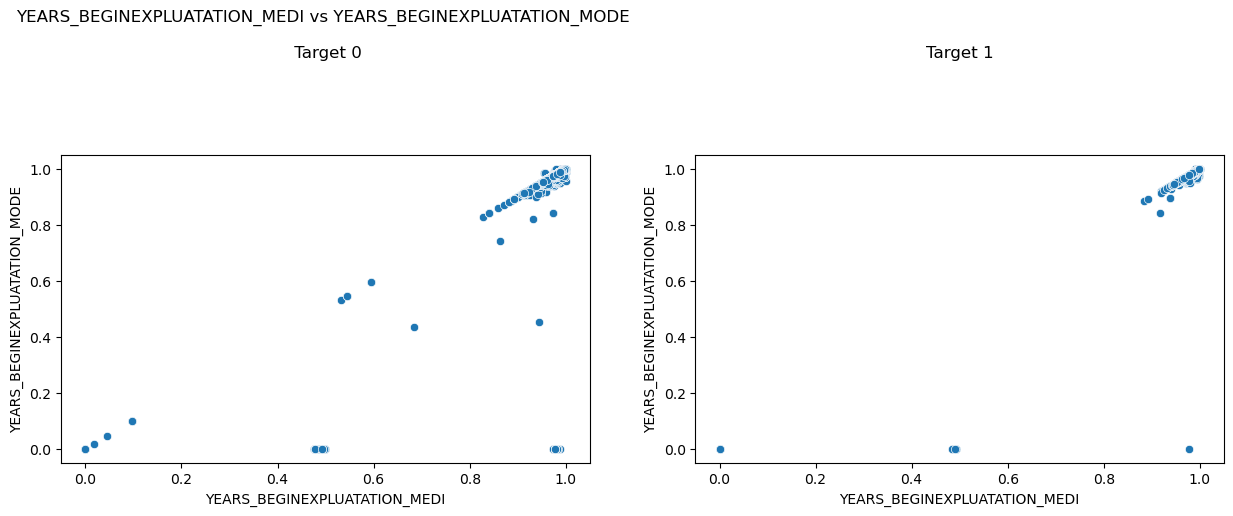

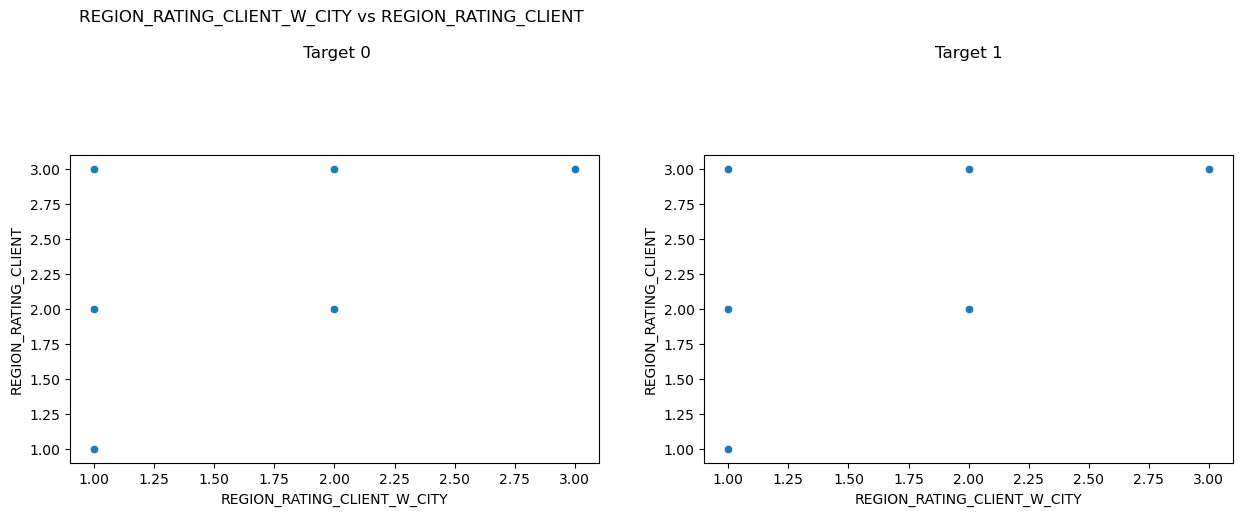

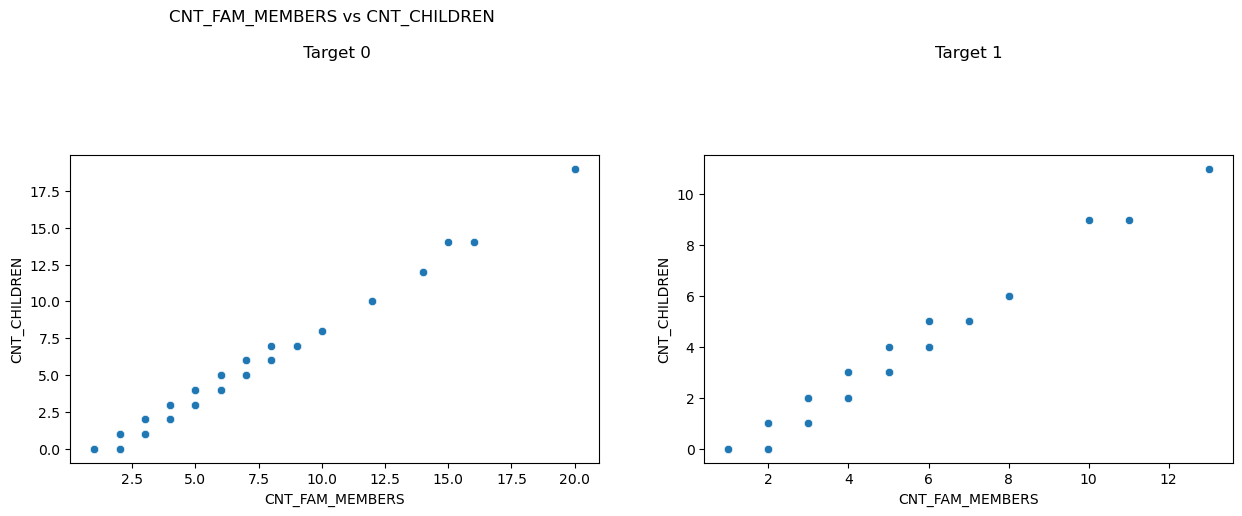

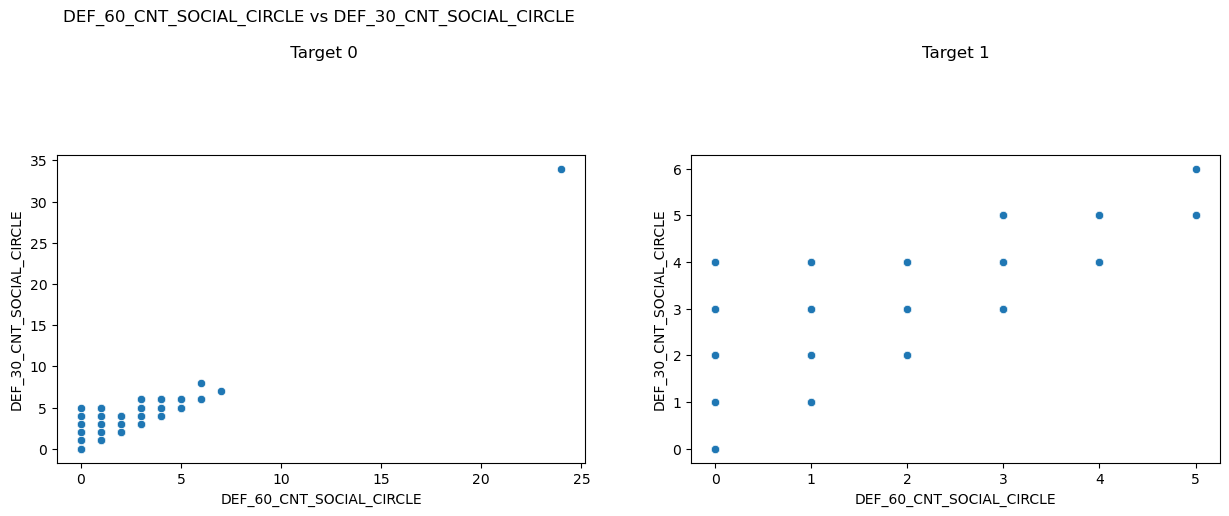

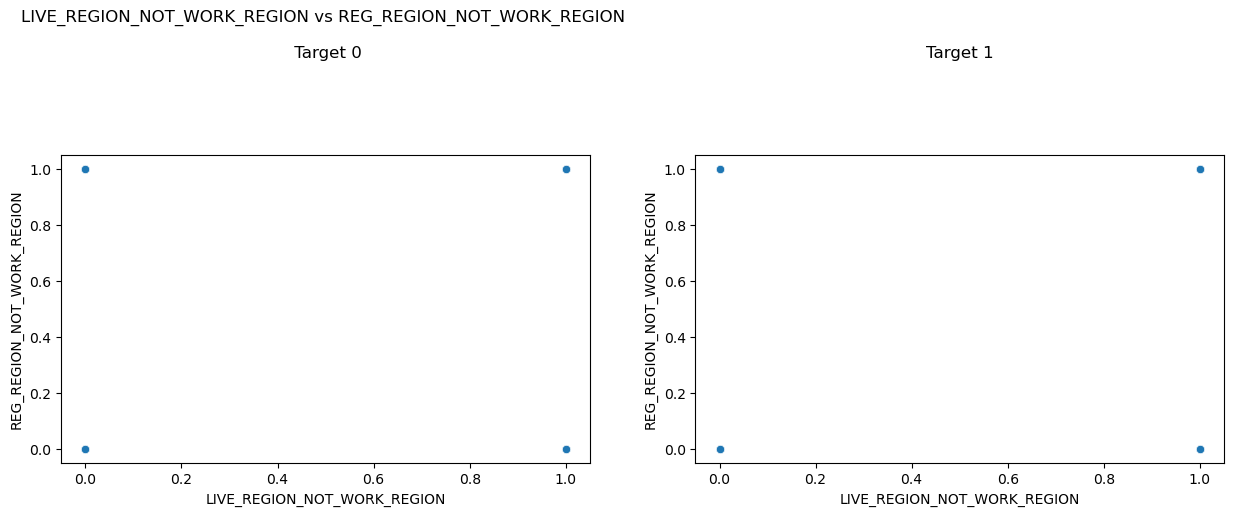

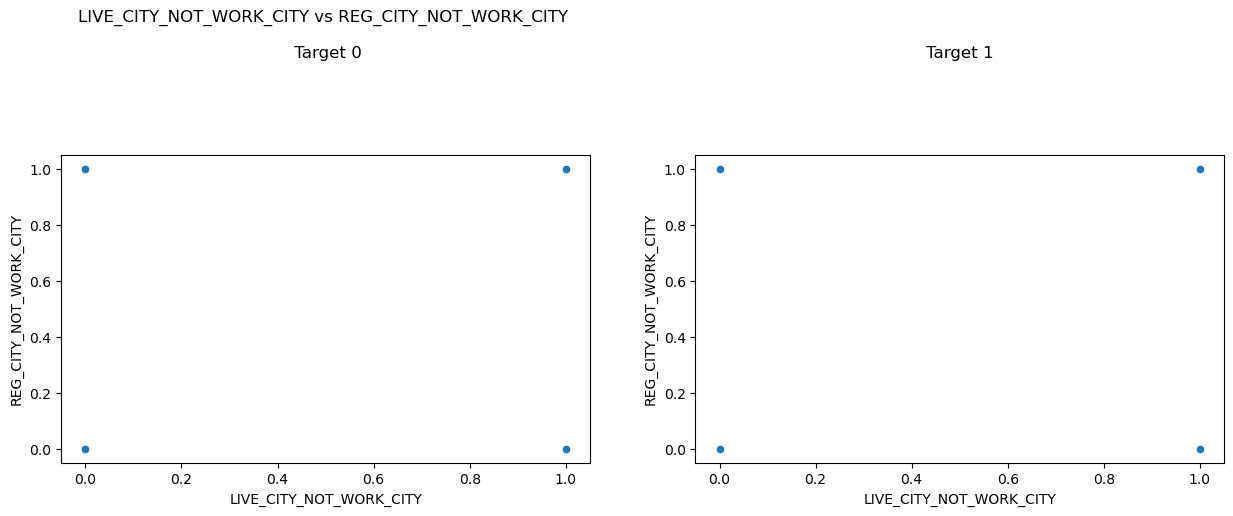

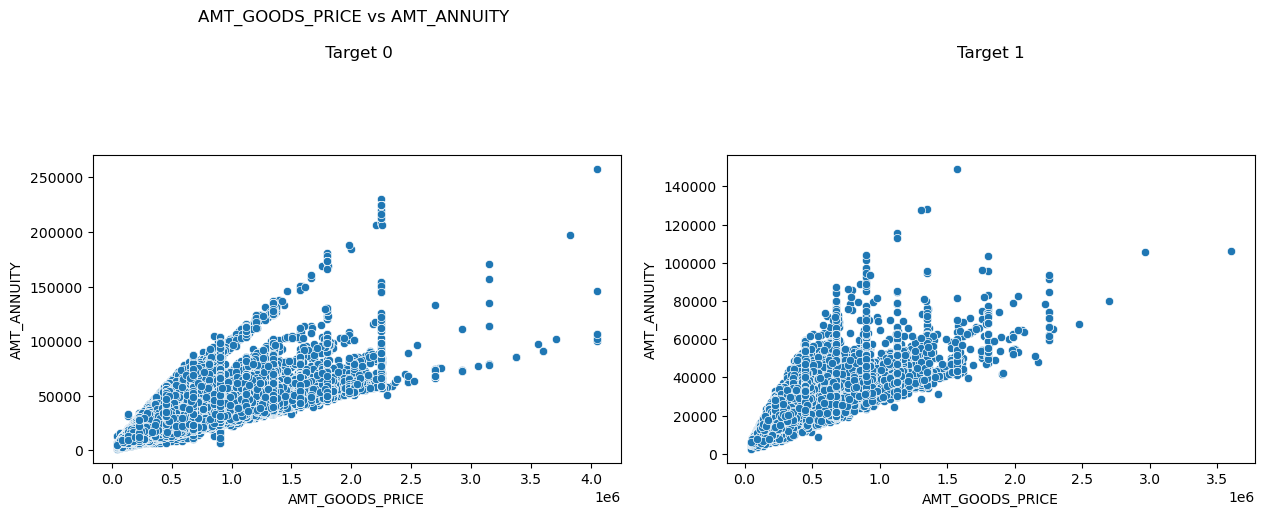

In [483]:
i=0
for i in range(15):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,4))
    sns.scatterplot(x=V1[i], y=V2[i],data=app_target_0,ax=ax1)
    ax1.set_xlabel(V1[i])    
    ax1.set_ylabel(V2[i])
    ax1.set_title(f'{V1[i]} vs {V2[i]} \n\n Target 0',fontsize=12)
    
    sns.scatterplot(x=V1[i], y=V2[i],data=app_target_1,ax=ax2)
    ax2.set_xlabel(V1[i])    
    ax2.set_ylabel(V2[i])
    ax2.set_title(f'Target 1',fontsize=12)
            
    plt.show()    
    i=i+1

**Insights :**

Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.

Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.

Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

less children client have in densely populated area.

Credit amount is higher to densely populated area.

The income is also higher in densely populated area.

OBS_30_CNT_SOCIAL_CIRCLE',OBS_60_CNT_SOCIAL_CIRCLE' - denote the client's social surroundings with observable 30/60    DPD.
These are definetly correlated. We can also see that its higher and steeper for Target 1, signyfying that in approval process this parameter must be strongly looked into.



# Previous Application Data

In [484]:
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Data Quality Checks

### Missing Value

In [485]:
prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [486]:
prev_data.info

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

In [487]:
prev_data.shape

(1670214, 37)

In [488]:
for col in prev_data.columns:
    print(col)
    print('------------------')
    print(prev_data[col].unique())

SK_ID_PREV
------------------


[2030495 2802425 2523466 ... 2659632 2785582 2418762]
SK_ID_CURR
------------------
[271877 108129 122040 ... 253940 353284 191629]
NAME_CONTRACT_TYPE
------------------
['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
AMT_ANNUITY
------------------
[ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT
------------------
[ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_DOWN_PAYMENT
------------------
[    0.        nan 12649.5  ...  4099.95 55325.25 50476.5 ]
AMT_GOODS_PRICE
------------------
[ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
WEEKDAY_APPR_PROCESS_START
------------------
['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
HOUR_APPR_PROCESS_START
------------------
[15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]
FLAG_LAST_APPL_PER_CONTRACT
------------------


#### There are lot of columns have 'XNA' and 'XAP' values. We are replacing these values with NaN value so that we can treat further.

In [489]:
prev_data.replace('XNA',np.nan,inplace=True)
prev_data.replace('XAP',np.nan,inplace=True)

In [490]:
#checking for missing value perventage columns wise
round(100*(prev_data.isnull().sum() / len(prev_data.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.02
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE         95.83
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              37.56
CODE_REJECT_REASON             81.33
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.12
NAME_GOODS_CATEGORY            56.93
NAME_PORTFOLIO                 22.29
NAME_PRODUCT_TYPE              63.68
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

#### Treating missing values by dropping columns more than 30% missing values

In [491]:
#dropping all the columns which has missing value more than 50%
previous_df = prev_data.drop(prev_data.columns[prev_data.isnull().mean() >= 0.5], axis = 1)

In [492]:
#checking number of rows have where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values
print(len(previous_df[np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT'])].index))

333855


In [493]:
#removing the rows where AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all have missing values as the number of rows are not very 
#large compare to the original data frame
previous_df = previous_df[~(np.isnan(previous_df['AMT_ANNUITY']) & np.isnan(previous_df['AMT_GOODS_PRICE']) & np.isnan(previous_df['CNT_PAYMENT']))]

In [494]:
#checking for missing value perventage columns wise after removing the rows
round(100*(previous_df.isnull().sum() / len(previous_df.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                     2.87
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                 3.87
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE              21.96
NAME_TYPE_SUITE                36.41
NAME_CLIENT_TYPE                0.07
NAME_PORTFOLIO                  2.87
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
CNT_PAYMENT                     2.87
NAME_YIELD_GROUP               13.72
PRODUCT_COMBINATION             0.00
DAYS_FIRST_DRAWING             25.38
DAYS_FIRST_DUE                 25.38
DAYS_LAST_DUE_1ST_VERSION      25.38
DAYS_LAST_DUE                  25.38
DAYS_TERMINATION               25.38
N

In [495]:
round(previous_df[['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']].describe(percentiles = [0.05, 0.25, 0.5, 0.75, 0.9, 0.95, .99]),3)

AMT_ANNUITY  AMT_GOODS_PRICE  CNT_PAYMENT
count  1297979.000      1284699.000  1297984.000
mean     15955.121       227847.279       16.054
std      14782.137       315396.558       14.567
min          0.000            0.000        0.000
5%        2726.595        22882.500        0.000
25%       6321.780        50841.000        6.000
50%      11250.000       112320.000       12.000
75%      20658.420       234000.000       24.000
90%      34703.820       585000.000       36.000
95%      45336.780       900000.000       48.000
99%      69685.789      1395000.000       60.000
max     418058.145      6905160.000       84.000

### Outliers

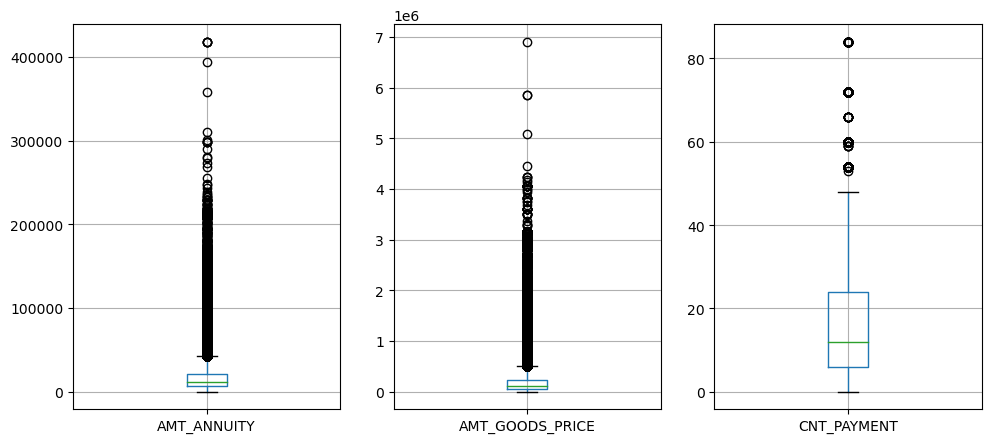

In [496]:
cols = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
plt.figure(figsize=(20,5))
for i, col in enumerate(cols):
    plt.subplot(1,5, i+1)
    previous_df.boxplot(column = col)
plt.show()

### Suggestion - Remove outliers using 1.5 IQR method

```python
for col in cols: 
    q1 = previous_df[col].quantile(0.25)
    q3 = previous_df[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    previous_df = previous_df.loc[(previous_df[col] > range_low) & (previous_df[col] < range_high)]
```

In [497]:
previous_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_PORTFOLIO                  object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION             object
DAYS_FIRST_DRAWING             float64
DAYS_FIRST_DUE                 float64
DAYS_LAST_DUE_1ST_VERSION      float64
DAYS_LAST_DUE            

In [498]:
app_data1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [499]:
# selecting columns from the application data frame to merge
cols = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AMT_INCOME_TYPE','AGE_GROUP', 'DAYS_BIRTH','NAME_INCOME_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',]
application_sub = app_data1[cols]
application_sub.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS AMT_INCOME_TYPE   AGE_GROUP  DAYS_BIRTH  \
0  Single / not married          MEDIUM  Very_Young          25   
1               Married            HIGH  Middle_Age          45   
2  Single / not married        VERY_LOW  Middle_Age          52   
3        Civil marriage             LOW  Middle_Age          52   
4  Single / not married             LOW  Middle_Age          54   

  NAME_INCOME_TYPE OCCUPATION_TYPE       ORGANIZATION_TYPE  FLAG_OWN_CAR  \
0          Working        Laborers  Business Entity Type 3             0   
1    State servant      Core staff                  School             0   
2          Working        Laborers              Government             1   
3          Working        Laborers  Business Entity Type 3             0   
4          Working      Core staff                Religion             0   

   FLAG_OWN_REALTY  
0                1  
1                0  
2                1  
3                1  
4                1

#### Merging previous application data with application data for further analysis

In [500]:
# merging previous application data with the subset of the application data frame
merged = pd.merge(previous_df,application_sub, on='SK_ID_CURR', how='left')
merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                       1             Approved            -73   
1                       1             Approved           -164   
2                       1             Approved           -301   
3                       1             Approved           -512   
4                       1              Refused           -781   

       NAME_PAYMENT_TYPE  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0  Cash through the bank              NaN         Repeater            POS   
1                    NaN    Unaccompanied         Repeater           Cash   
2  Cash through the bank  Spouse, partner         Repeater           Cash   
3  Cash through the bank              NaN         Repeater           Cash   
4  Cash through the bank              NaN         Repeater           Cash   

              CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT NAME_YIELD_GROUP  \
0             Country-wide                35         12.0           middle   
1           Contact center                -1         36.0       low_action   
2  Credit and cash offices                -1         12.0             high   
3  Credit and cash offices                -1         12.0           middle   
4  Credit and cash offices                -1         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2         Cash X-Sell: high            365243.0          -271.0   
3       Cash X-Sell: middle            365243.0          -482.0   
4         Cash Street: high                 NaN             NaN   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                      300.0          -42.0             -37.0   
1                      916.0       365243.0          365243.0   
2                       59.0       365243.0          365243.0   
3                     -152.0         -182.0            -177.0   
4                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER  \
0                        0.0     0.0           F   
1                        1.0     0.0           F   
2                        1.0     0.0           F   
3                        1.0     0.0           M   
4                        NaN     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AMT_INCOME_TYPE  \
0              Incomplete higher            Married          MEDIUM   
1  Secondary / secondary special     Civil marriage        VERY_LOW   
2  Secondary / secondary special            Married        VERY_LOW   
3  Secondary / secondary special            Married            HIGH   
4  Secondary / secondary special 

In [501]:
# checking for the null value column wise
merged.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     38380
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                 51660
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE              293529
NAME_TYPE_SUITE                486573
NAME_CLIENT_TYPE                  936
NAME_PORTFOLIO                  38375
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
CNT_PAYMENT                     38375
NAME_YIELD_GROUP               183360
PRODUCT_COMBINATION                 0
DAYS_FIRST_DRAWING             339210
DAYS_FIRST_DUE                 339210
DAYS_LAST_DUE_1ST_VERSION      339210
DAYS_LAST_DUE                  339210
DAYS_TERMINA

In [502]:
#removing the rows where TARGET column has null value due to left join
merged = merged[~np.isnan(merged['TARGET'])]

#### Univariate Analysis on categorical columns

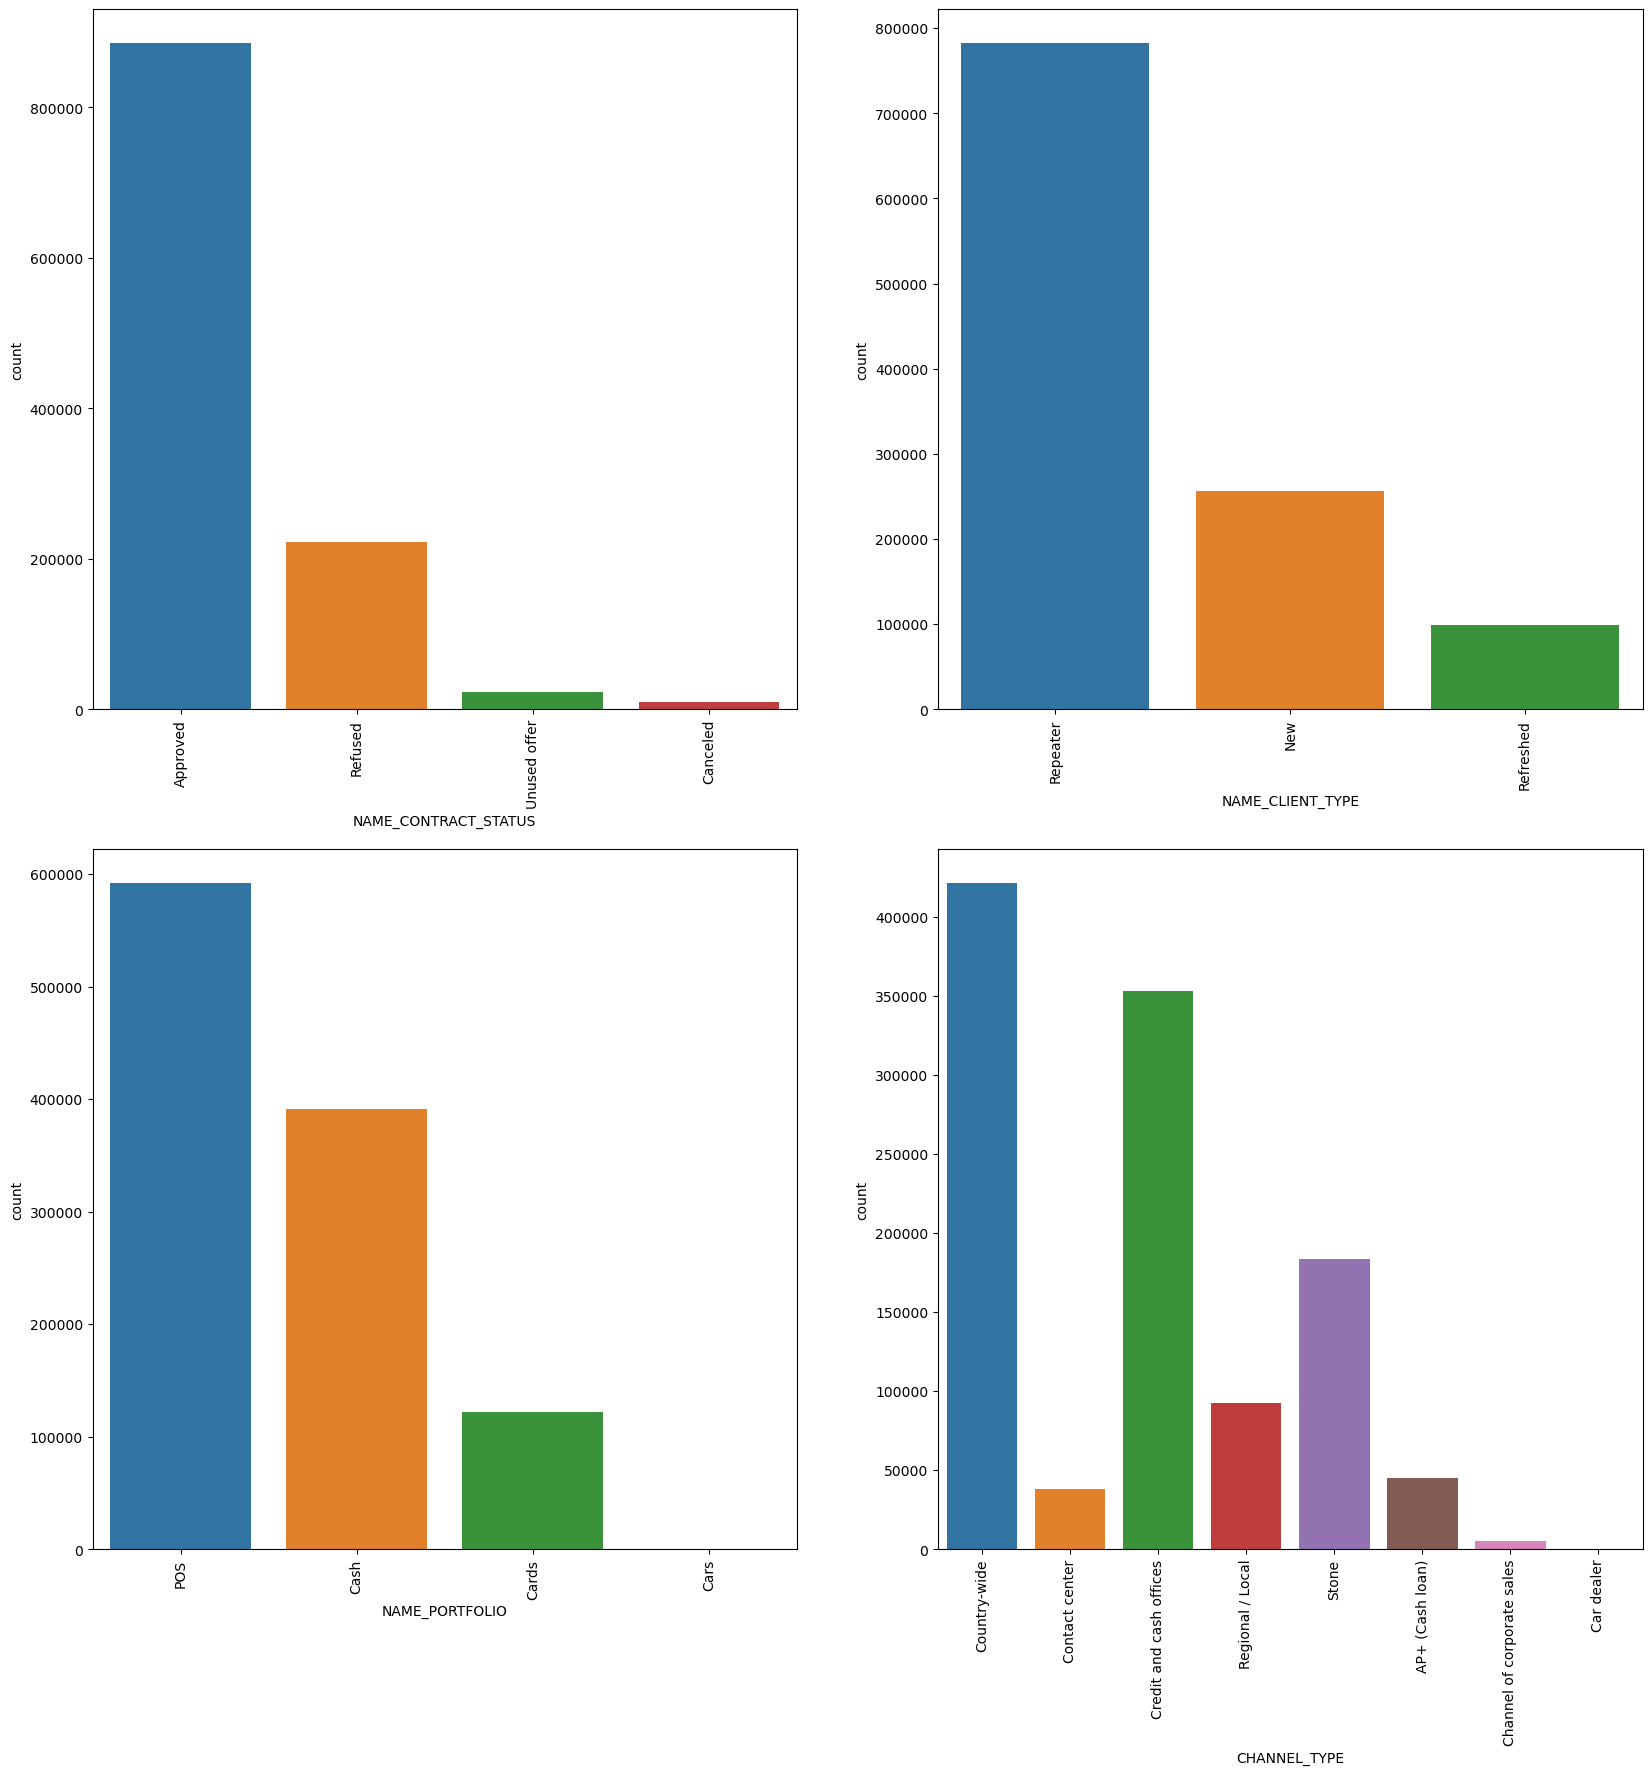

In [503]:
categorical = ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE']
plt.figure(figsize = (20,20))
i = 1
for col in categorical:
    plt.subplot(2,2,i)
    sns.countplot(x = col , data = merged)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

Analysis
1. Frequency of repeated clients higher than new clients.
2. Approved loan status is very high than other categories.
3. Country-wide channel type is the most used channel followed by Credit and cash offers.
4. POS loans are higher than cash loans.

#### Univariate analysis on continuous columns

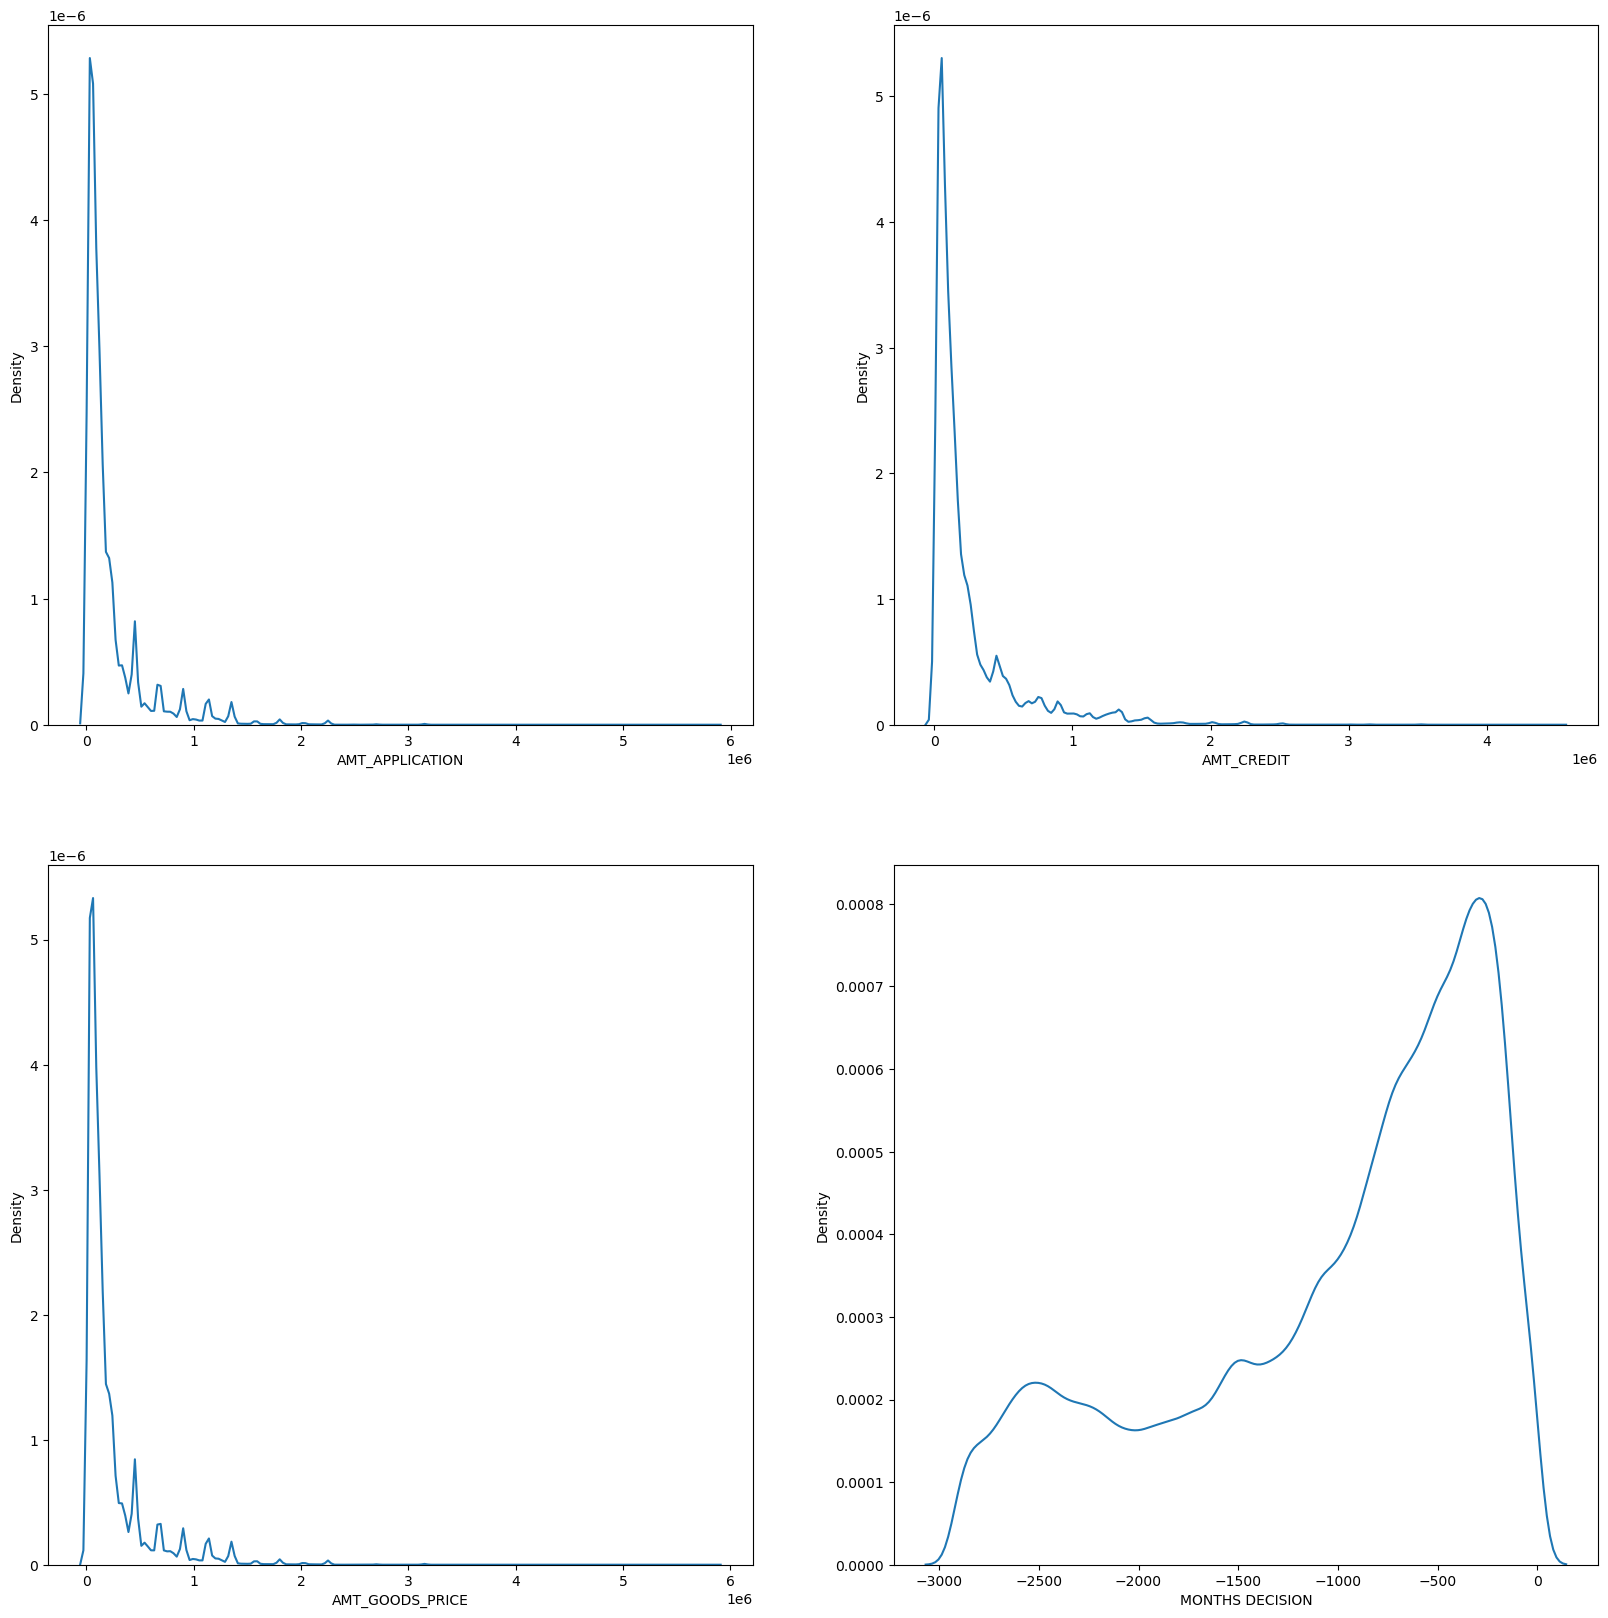

In [504]:
#plotting kde plot for categorical columns
continous = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION']

plt.figure(figsize = (20,20))
i = 1
for col in continous:
    plt.subplot(2,2,i)
    if col == 'DAYS_DECISION':
        ax = sns.kdeplot(merged[col], label = 'MONTHS DECISION')
        ax.set(xlabel = 'MONTHS DECISION')
    else:
        ax = sns.kdeplot(merged[col])
        ax.set(xlabel = col)
    i += 1
plt.show()

#### Analysis
1. Most of the loan application amount were below 500000, we can see a huge spike around 100000 amount.
2. Amount credited, is also following the pattern of loan application. We already saw that most of the application was approved in previous plots. 
3. Amount of the goods price is also following the same distribution like application amount and amount credited. Because, based on the price of the goods, the loan was approved and amount was credited.
4. Time taken to process the application was around 10 to 30 months.

### Bivariate Analysis

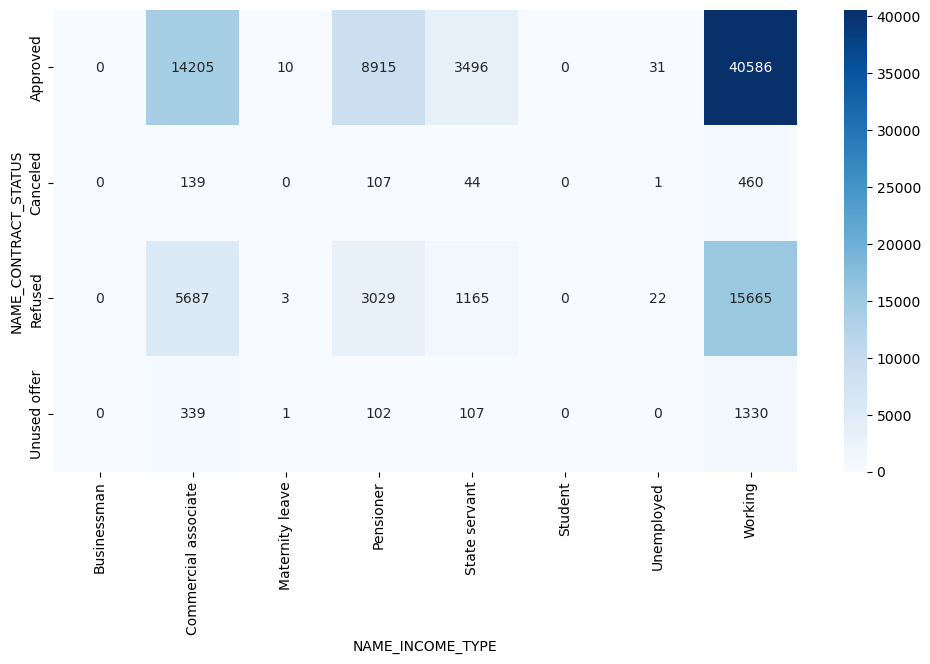

In [505]:
#Checking "NAME_CONTRACT_STATUS", "AMT_INCOME_TYPE",aggregating on Target

res=pd.pivot_table(data=merged,index="NAME_CONTRACT_STATUS",columns="NAME_INCOME_TYPE",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

1. Since Target 1 is default, higher on the above matrix shows correlation to default.
2. Working applicant has been approved highest among others and therefore high default.
3. There are 15,665 applicants who defaulted after they were refused previously.
4. Company is facing the default by approving applications which were previously refused.

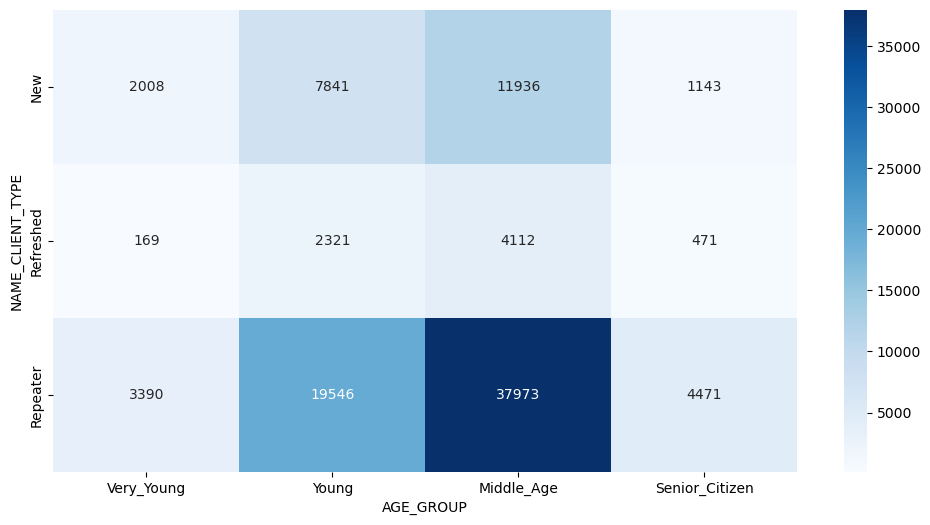

In [506]:
res=pd.pivot_table(data=merged,index="NAME_CLIENT_TYPE",columns="AGE_GROUP",values='TARGET', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Blues', fmt="g")
plt.show()

Since Target 1 is default, higher on the above matrix shows correlation to default.

Approved loans of age group 25-35 and 35-45 have higher defaults

Refused, cancelled, loans in previous application have defaulted in current.

In [507]:
subset = merged[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_BIRTH']]

subset.head()

AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  \
0     1730.430          17145.0     17145.0          17145.0            -73   
1    25188.615         607500.0    679671.0         607500.0           -164   
2    15060.735         112500.0    136444.5         112500.0           -301   
3    47041.335         450000.0    470790.0         450000.0           -512   
4    31924.395         337500.0    404055.0         337500.0           -781   

   CNT_PAYMENT  DAYS_BIRTH  
0         12.0        39.0  
1         36.0        58.0  
2         12.0        28.0  
3         12.0        60.0  
4         24.0        27.0

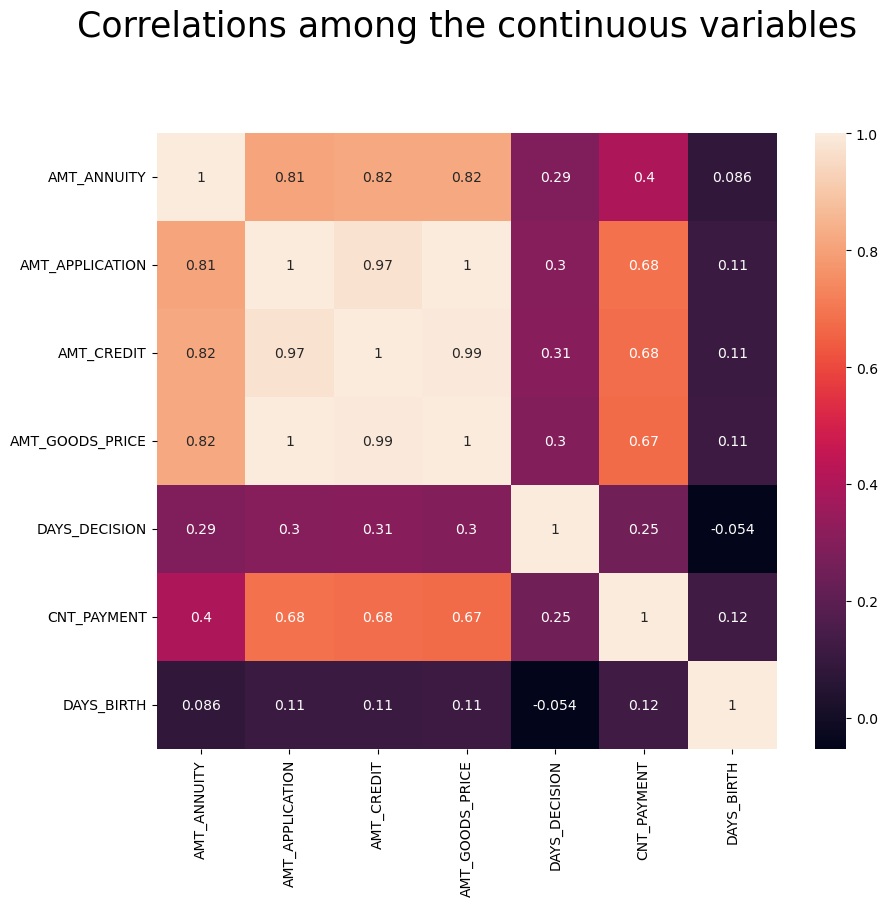

In [508]:
plt.figure(figsize = (10,8))
cor = subset.corr()
sns.heatmap(cor, annot = True)
plt.title('Correlations among the continuous variables')
plt.show()

#### Analysis

Count of Payment has positive correlation with Amt_Credit, Amt_application and Amt_goods_price.

DAYS_BIRTH(AGE) is correlated with all the variables

AMT_APPLICATION is correlated with AMT_ANNUTY, AMT_AMT_CREDIT, AMT_GOODS_PRICE

#### Bivariate analysis on continuous columns

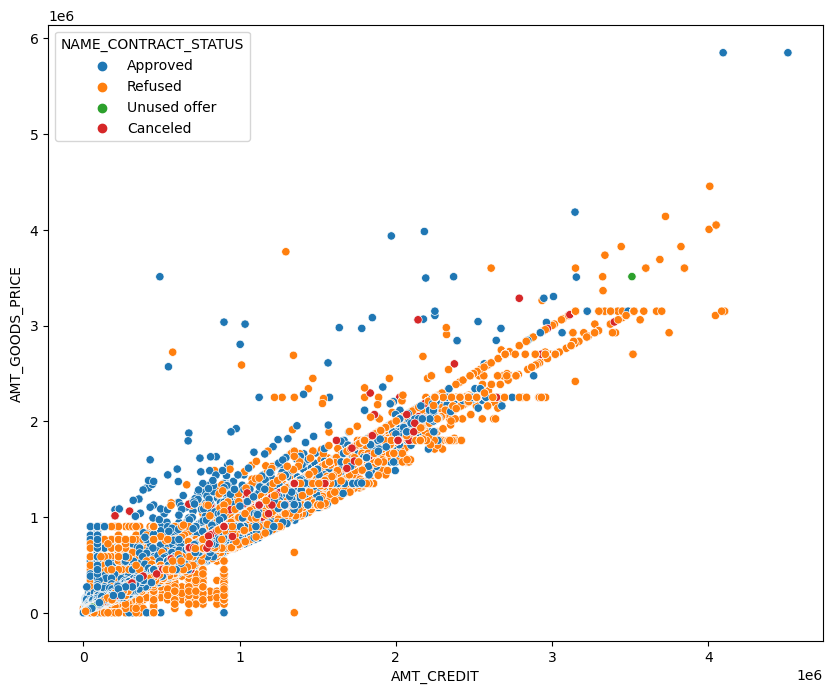

In [509]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'AMT_CREDIT', y = 'AMT_GOODS_PRICE', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

AMT_GOODS_PRICE and AMT_CREDIT are posotively correlated and mostly concentrated near the lower region. High AMT_CREDIT loans are most likely to be refused.

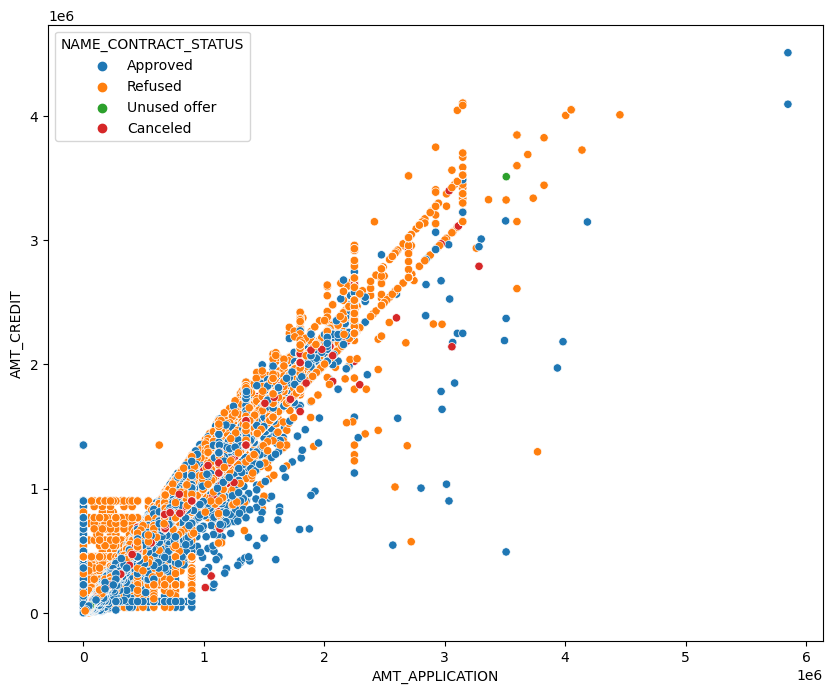

In [510]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'AMT_APPLICATION', y = 'AMT_CREDIT', hue='NAME_CONTRACT_STATUS', data = merged)
plt.show()

AMT_CREDIT and AMT_APPLICATION is highly correlated.

#### Bivariate analysis on categorical columns

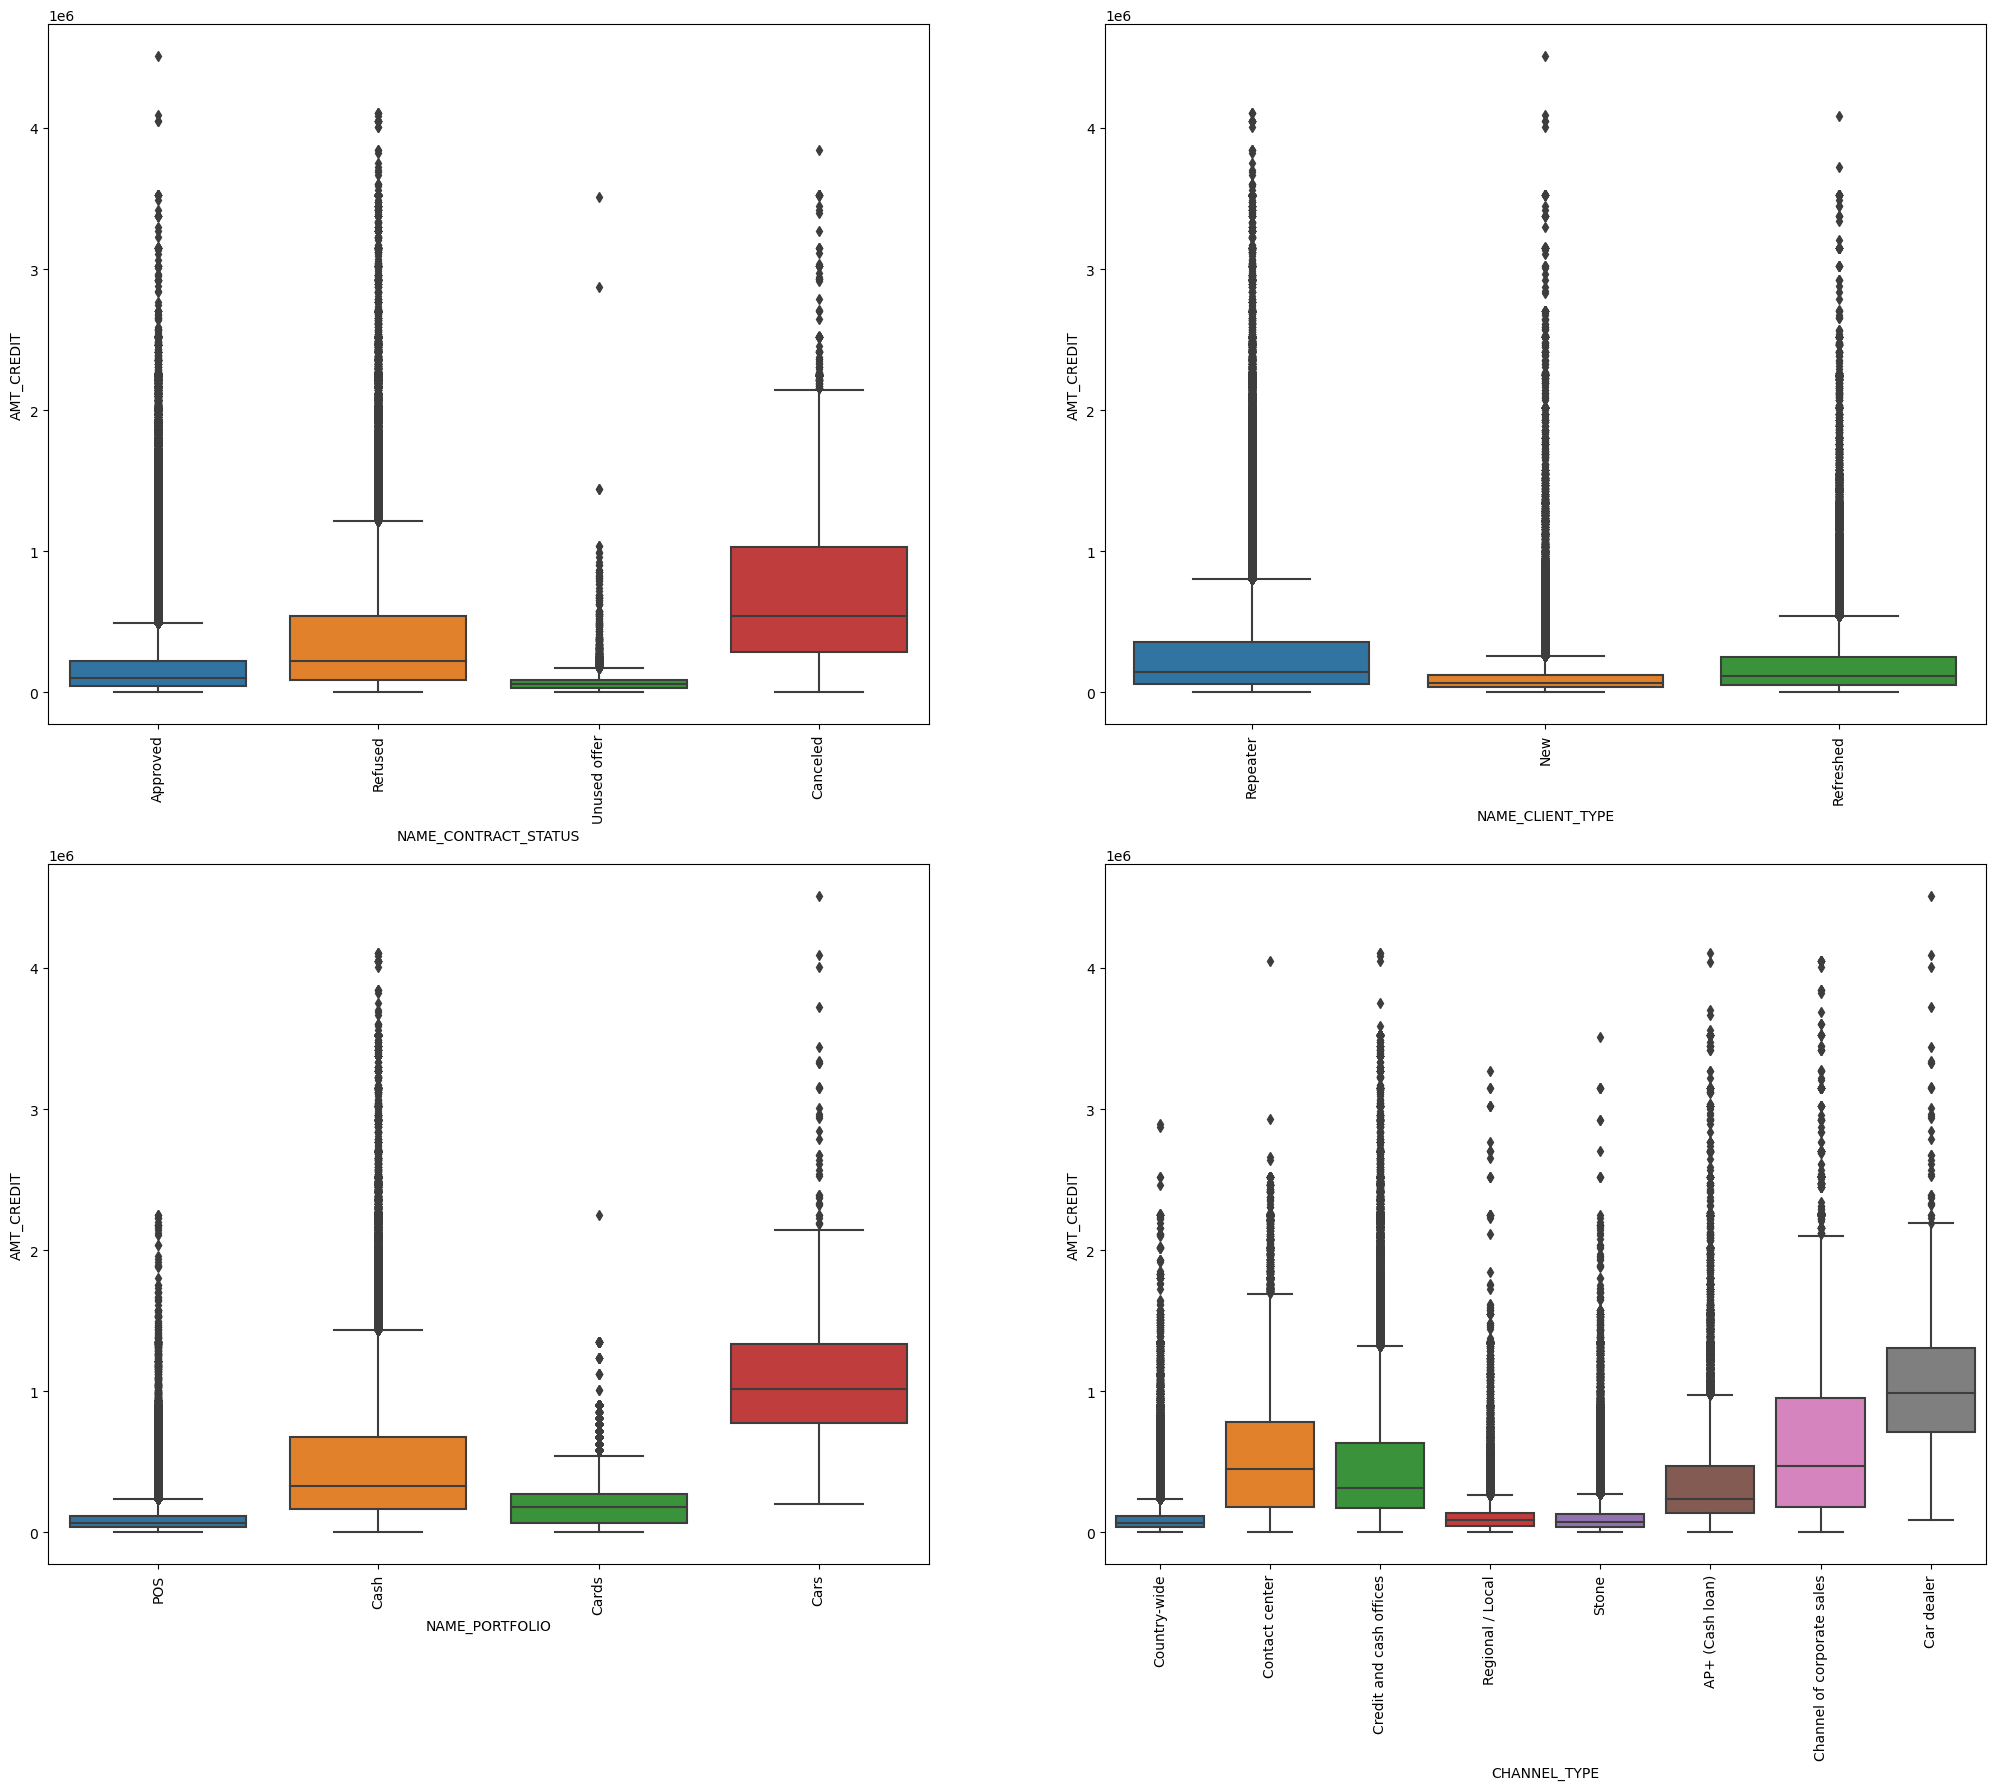

In [511]:
plt.figure(figsize=(25,20))
i=1
for category in categorical:
    ax = plt.subplot(2,2,i)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=merged)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    i += 1
plt.show()

### IN APPLICATION DATA

**High correlation with default (Target 1)**

1. 'AMT_INCOME_TYPE' - Medium income

2. 'AGE_GROUP - Young, Middle age

3. 'NAME_INCOME_TYPE' - Working

4. 'OCCUPATION_TYPE' - Labourers 

5. 'ORGANIZATION_TYPE' - Business type 3

6. 'OWN_CAR_flag' - 0 (No car)

7. 'OWN_REALTY_flag' - 0(No house)

In [512]:
Approved_default= merged[(merged['NAME_CONTRACT_STATUS']=="Approved") & (merged['TARGET']==1)]
Approved_default.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
21      1676258      433469         Cash loans    22242.825         247500.0   
46      1760006      283527         Cash loans    14730.660          72000.0   
67      2408628      320444         Cash loans    55973.295        1035000.0   
125     1382147      336630         Cash loans    10061.910         112500.0   
145     1676862      294352     Consumer loans    22173.795         129060.0   

     AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
21     268083.0         247500.0                   THURSDAY   
46      72000.0          72000.0                  WEDNESDAY   
67    1110141.0        1035000.0                     FRIDAY   
125    127350.0         112500.0                     MONDAY   
145    116154.0         129060.0                     FRIDAY   

     HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
21                        14                           Y   
46                        15                           Y   
67                        16                           Y   
125                       13                           Y   
145                       14                           Y   

     NFLAG_LAST_APPL_IN_DAY NAME_CONTRACT_STATUS  DAYS_DECISION  \
21                        1             Approved          -1883   
46                        1             Approved           -183   
67                        1             Approved           -953   
125                       1             Approved           -631   
145                       1             Approved          -1728   

         NAME_PAYMENT_TYPE NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_PORTFOLIO  \
21                     NaN             NaN         Repeater           Cash   
46                     NaN   Unaccompanied         Repeater           Cash   
67   Cash through the bank   Unaccompanied         Repeater           Cash   
125  Cash through the bank             NaN         Repeater           Cash   
145  Cash through the bank   Unaccompanied         Repeater            POS   

                CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT NAME_YIELD_GROUP  \
21              Country-wide                -1         18.0             high   
46            Contact center                -1          6.0             high   
67   Credit and cash offices                -1         30.0           middle   
125          AP+ (Cash loan)                 4         24.0             high   
145                    Stone               350          6.0           middle   

            PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
21            Cash X-Sell: high            365243.0         -1853.0   
46            Cash X-Sell: high            365243.0          -153.0   
67          Cash X-Sell: middle            365243.0          -923.0   
125           Cash Street: high                 NaN             NaN   
145  POS industry with interest            365243.0         -1690.0   

     DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
21                     -1343.0        -1343.0           -1334.0   
46                        -3.0           -3.0          365243.0   
67                       -53.0          -53.0             -48.0   
125                        NaN            NaN               NaN   
145                    -1540.0        -1540.0           -1537.0   

     NFLAG_INSURED_ON_APPROVAL  TARGET CODE_GENDER  \
21                         1.0     1.0           F   
46                         0.0     1.0           M   
67                         1.0     1.0           F   
125                        NaN     1.0           M   
145                        0.0     1.0           F   

               NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS AMT_INCOME_TYPE  \
21                Higher education               Married             LOW   
46   Secondary / secondary special  Single / not married       VERY_HIGH   
67   Secondary / secondary special              

#### Verification of the similar correlation in previous_data

In [513]:
cols=['AMT_INCOME_TYPE','AGE_GROUP','CODE_GENDER','NAME_INCOME_TYPE','OCCUPATION_TYPE',"ORGANIZATION_TYPE", ]

for i in cols:
    print(Approved_default[i].value_counts(normalize=True))
    print('\n')

MEDIUM       0.375117
LOW          0.301072
VERY_LOW     0.184064
HIGH         0.104130
VERY_HIGH    0.035617
Name: AMT_INCOME_TYPE, dtype: float64


Middle_Age        0.563969
Young             0.309579
Senior_Citizen    0.068364
Very_Young        0.058088
Name: AGE_GROUP, dtype: float64


F      0.592478
M      0.407522
XNA    0.000000
Name: CODE_GENDER, dtype: float64


Working                 0.603572
Commercial associate    0.211249
Pensioner               0.132579
State servant           0.051991
Unemployed              0.000461
Maternity leave         0.000149
Businessman             0.000000
Student                 0.000000
Name: NAME_INCOME_TYPE, dtype: float64


Laborers                 0.313450
Sales staff              0.168184
Drivers                  0.112513
Core staff               0.090382
Managers                 0.071179
Security staff           0.038911
High skill tech staff    0.038204
Cooking staff            0.034105
Medicine staff           0.032712
Accountants  

### Summary

We made analysis of application data and previous data seperately to derive insights on what factors are driving the loan defaulters.

1. Demographical - 

        Age group : Young and Middle Age

        Gender : Male 

        Occupation type: Labourers

        Organization type - Busines type 3



2. Ownership factors -

        Flag_own_car - No

        Flag_own_realty - No

3. Previous applications factors - 

        Refused, Cancelled, Unused loans (Refused/ Cancelled previously were approved currently and is  facing default on these.)

**Other Suggestions to avoid default**:

1. Prioritising new applications to repeated ones.

2. Prioritising and encouraging female applicants.

3. Careful processing of application when Amt credit is high.

4. Segmenting refused/cancelled applicants for thorough processing. 

**Suggestions to avoid refusing credible applications**:

1. All the recommended default category also has cases where the payments are on time. Therefore more analysis to identify the credible application within the default groups like Workers, Middle age and ownership status has to be done. 
